In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as transforms
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7, 5)
import warnings
warnings.filterwarnings("ignore")


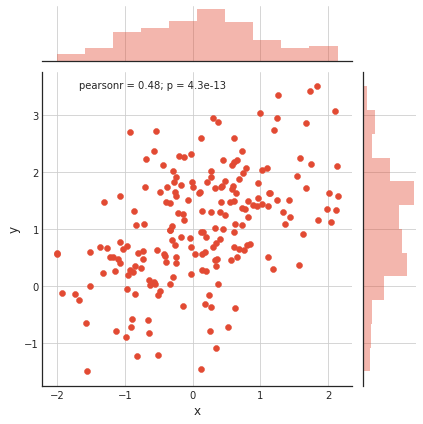

In [74]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    sns.jointplot(x="x", y="y", data=df);

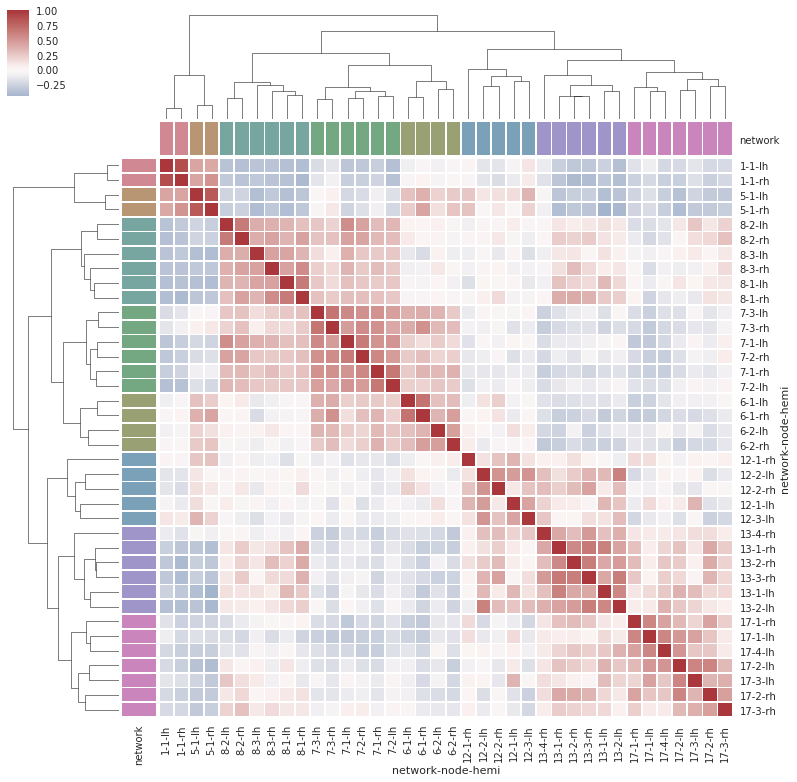

In [76]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

work with seanborn color map

[(0.89411764705882346, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.49411764705882361, 0.72156862745098038),
 (0.30196078431372558, 0.68627450980392157, 0.29019607843137263),
 (0.59607843137254923, 0.30588235294117649, 0.63921568627450975),
 (1.0, 0.49803921568627452, 0.0),
 (0.99999999999999978, 1.0, 0.19999999999999996),
 (0.65098039215686287, 0.33725490196078434, 0.1568627450980391),
 (0.96862745098039216, 0.50588235294117656, 0.74901960784313737),
 (0.59999999999999998, 0.59999999999999998, 0.59999999999999998)]

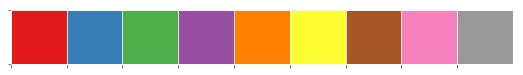

In [64]:
# data_type can be sequential, qualitative, and diverging, first letter can be used
sns.choose_colorbrewer_palette('q', as_cmap=False)

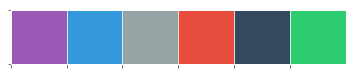

In [66]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

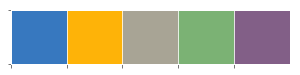

In [67]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

# example 2D hierachical clustering and visualization code

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [27]:
df1 = pd.DataFrame(np.random.randint(1,10,size=(10,5)), columns=list('abcde'))
df2 = pd.DataFrame(100+np.random.randint(1,10,size=(10,5)), columns=list('abcde'))
df = pd.concat([df1,df2])
df = df.reset_index(drop=True)
df3 = df+100
df4 = pd.merge(df, df3, left_index=True, right_index=True)
df4.head()

,a_x,b_x,c_x,d_x,e_x,a_y,b_y,c_y,d_y,e_y
0,5,9,1,6,1,105,109,101,106,101
1,1,9,9,4,4,101,109,109,104,104
2,7,7,4,7,3,107,107,104,107,103
3,9,8,9,8,6,109,108,109,108,106
4,3,4,6,7,4,103,104,106,107,104


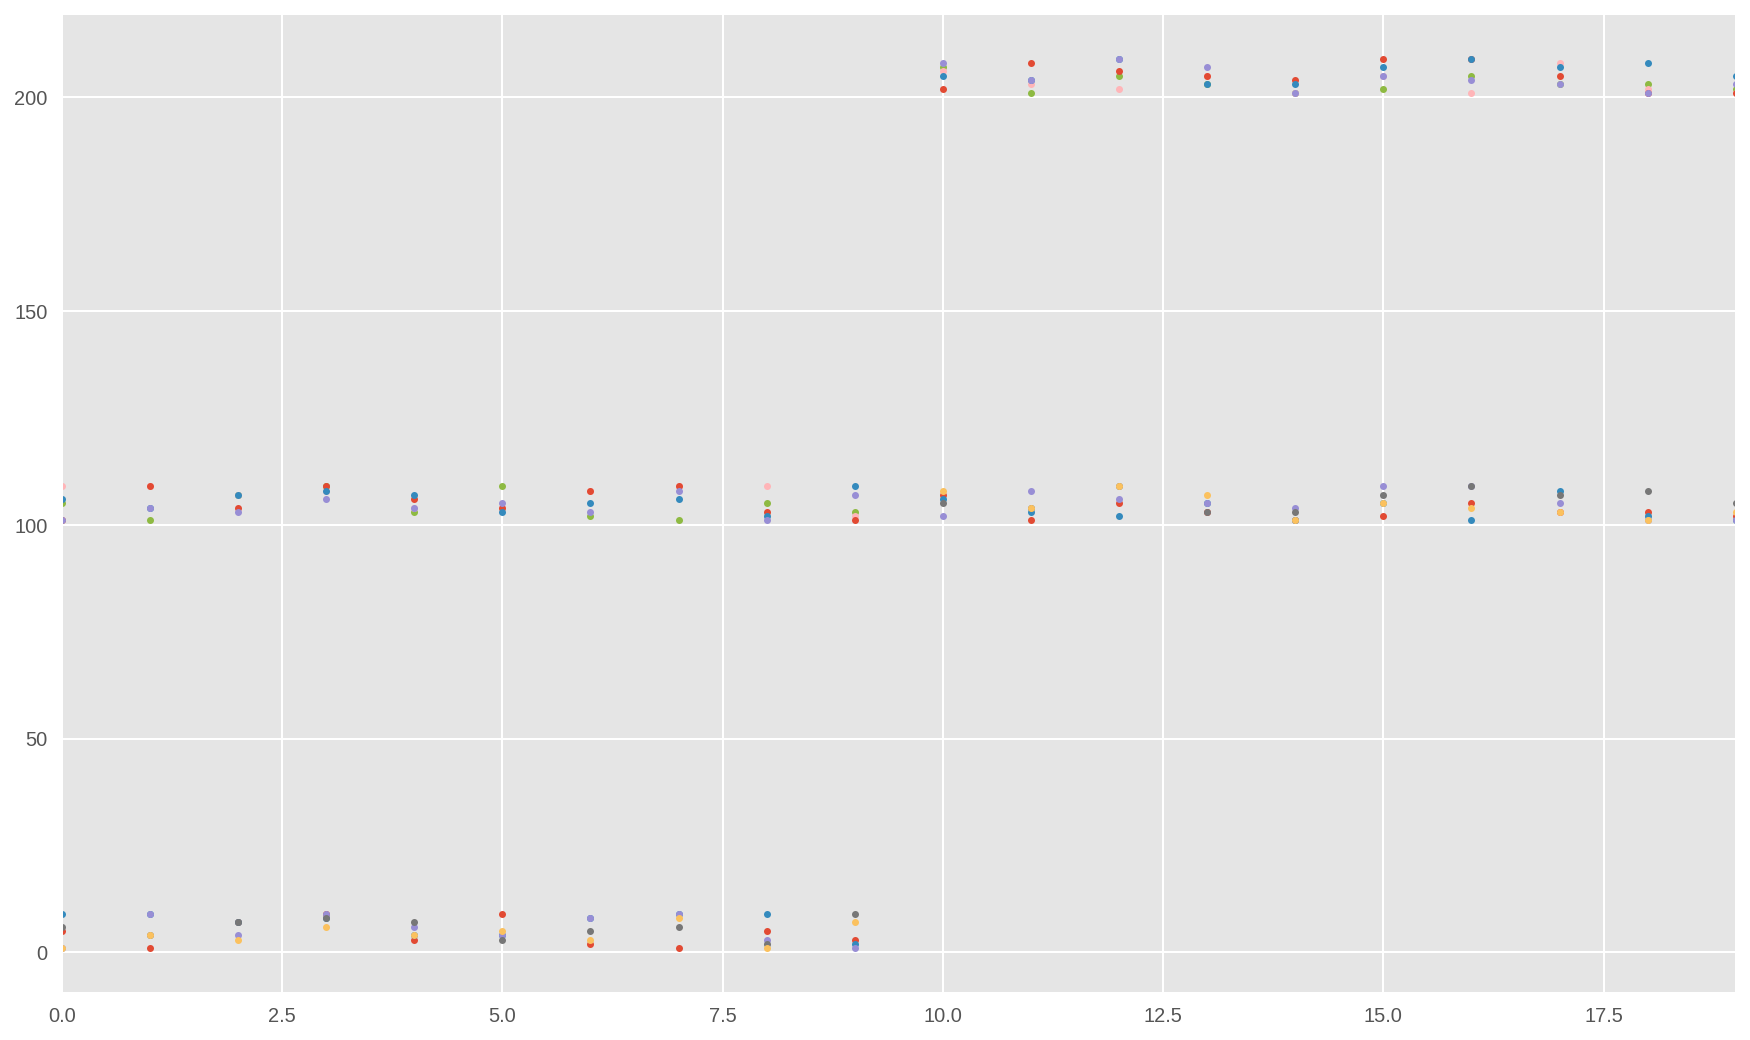

In [29]:
for c in df4.columns:
    _ = df4[c].plot(style='.')

In [30]:
df4

,a_x,b_x,c_x,d_x,e_x,a_y,b_y,c_y,d_y,e_y
0,5,9,1,6,1,105,109,101,106,101
1,1,9,9,4,4,101,109,109,104,104
2,7,7,4,7,3,107,107,104,107,103
3,9,8,9,8,6,109,108,109,108,106
4,3,4,6,7,4,103,104,106,107,104
5,9,4,4,3,5,109,104,104,103,105
6,2,8,8,5,3,102,108,108,105,103
7,1,9,9,6,8,101,109,109,106,108
8,5,9,3,2,1,105,109,103,102,101
9,3,2,1,9,7,103,102,101,109,107


In [249]:
# cluster by rows
Z_rows = linkage(df4.values, metric='hamming')
Z_rows

# https://stackoverflow.com/questions/9838861/scipy-linkage-format
# point 16 and 19 close to form cluster 20,Within-Cluster Distance (WCD) of 0.4.last column is the number of datapoint clustered 
# point 0 and 1 closed to form cluster 21,
# point 3 and 8 close to form cluster 22,
# point 5 merged into newly formed cluster 22 to form cluster 23

array([[ 10. ,  14. ,   0.4,   2. ],
       [  0. ,   5. ,   0.6,   2. ],
       [  1. ,   8. ,   0.6,   2. ],
       [  6. ,  22. ,   0.6,   3. ],
       [  2. ,   7. ,   0.6,   2. ],
       [ 16. ,  20. ,   0.6,   3. ],
       [ 15. ,  25. ,   0.6,   4. ],
       [ 12. ,  26. ,   0.6,   5. ],
       [ 17. ,  27. ,   0.6,   6. ],
       [ 21. ,  23. ,   0.8,   5. ],
       [ 24. ,  29. ,   0.8,   7. ],
       [  3. ,  30. ,   0.8,   8. ],
       [  4. ,  31. ,   0.8,   9. ],
       [  9. ,  32. ,   0.8,  10. ],
       [ 11. ,  28. ,   0.8,   7. ],
       [ 13. ,  34. ,   0.8,   8. ],
       [ 18. ,  35. ,   0.8,   9. ],
       [ 19. ,  36. ,   0.8,  10. ],
       [ 33. ,  37. ,   1. ,  20. ]])

Another thing you can and should definitely do is check the Cophenetic Correlation Coefficient of your clustering with help of the cophenet() function. This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances

In [252]:
c, coph_dists = cophenet(Z_rows, pdist(df4.values))
c

0.89506923903650537

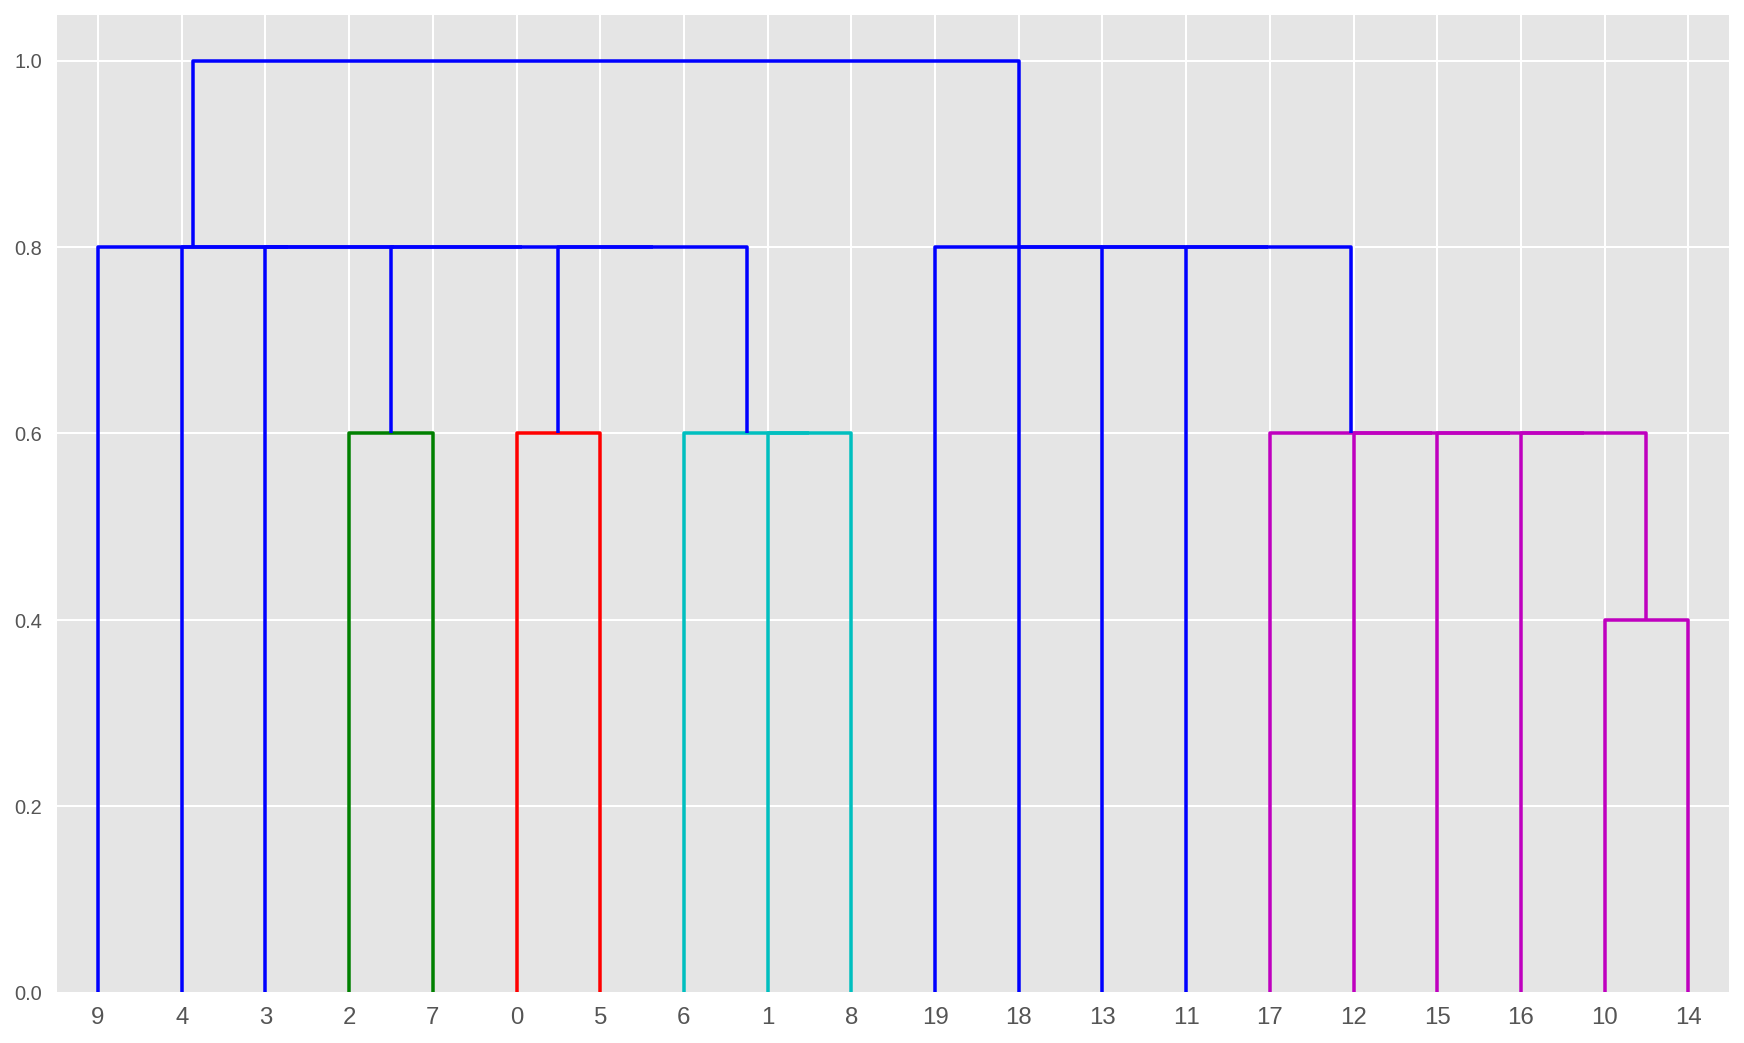

In [244]:
_ = dendrogram(Z_rows, labels=df4.index.values)

In [245]:
# cluster by columns
Z_columns = linkage(df4.T.values, metric='hamming')
Z_columns

array([[  0.  ,   4.  ,   0.8 ,   2.  ],
       [  5.  ,   9.  ,   0.8 ,   2.  ],
       [  2.  ,  10.  ,   0.85,   3.  ],
       [  1.  ,  12.  ,   0.85,   4.  ],
       [  7.  ,  11.  ,   0.85,   3.  ],
       [  6.  ,  14.  ,   0.85,   4.  ],
       [  3.  ,  13.  ,   0.9 ,   5.  ],
       [  8.  ,  15.  ,   0.9 ,   5.  ],
       [ 16.  ,  17.  ,   1.  ,  10.  ]])

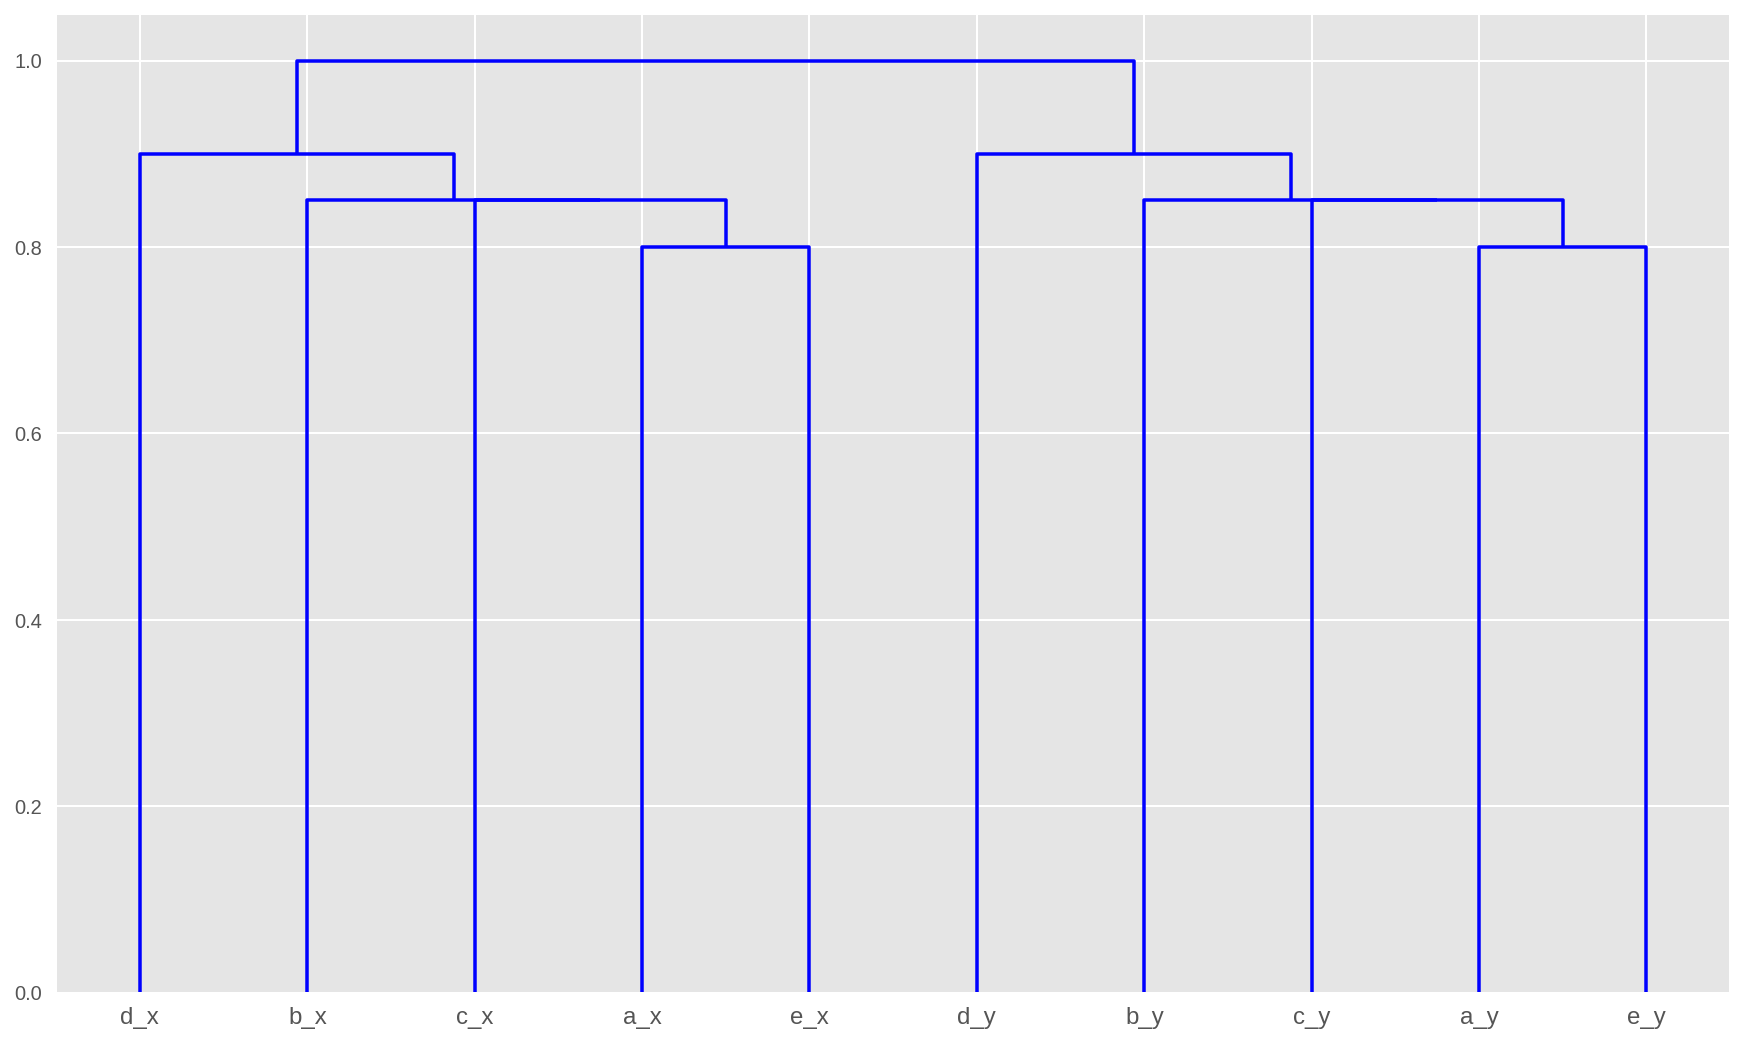

In [246]:
_= dendrogram(Z_columns, labels=df4.columns)

In [247]:
# reorder rows and columns based on the cluster linkage order
x_idxes = leaves_list(Z_rows)
x_idxes = list(reversed(x_idxes)) # reverse a list
y_idxes = leaves_list(Z_columns)
df = df4.ix[x_idxes][y_idxes]
df.head(2)

,d_x,b_x,c_x,a_x,e_x,d_y,b_y,c_y,a_y,e_y
9,8,2,3,6,6,108,102,103,106,106
5,7,3,2,4,8,107,103,102,104,108


[]

[]

[]

[]

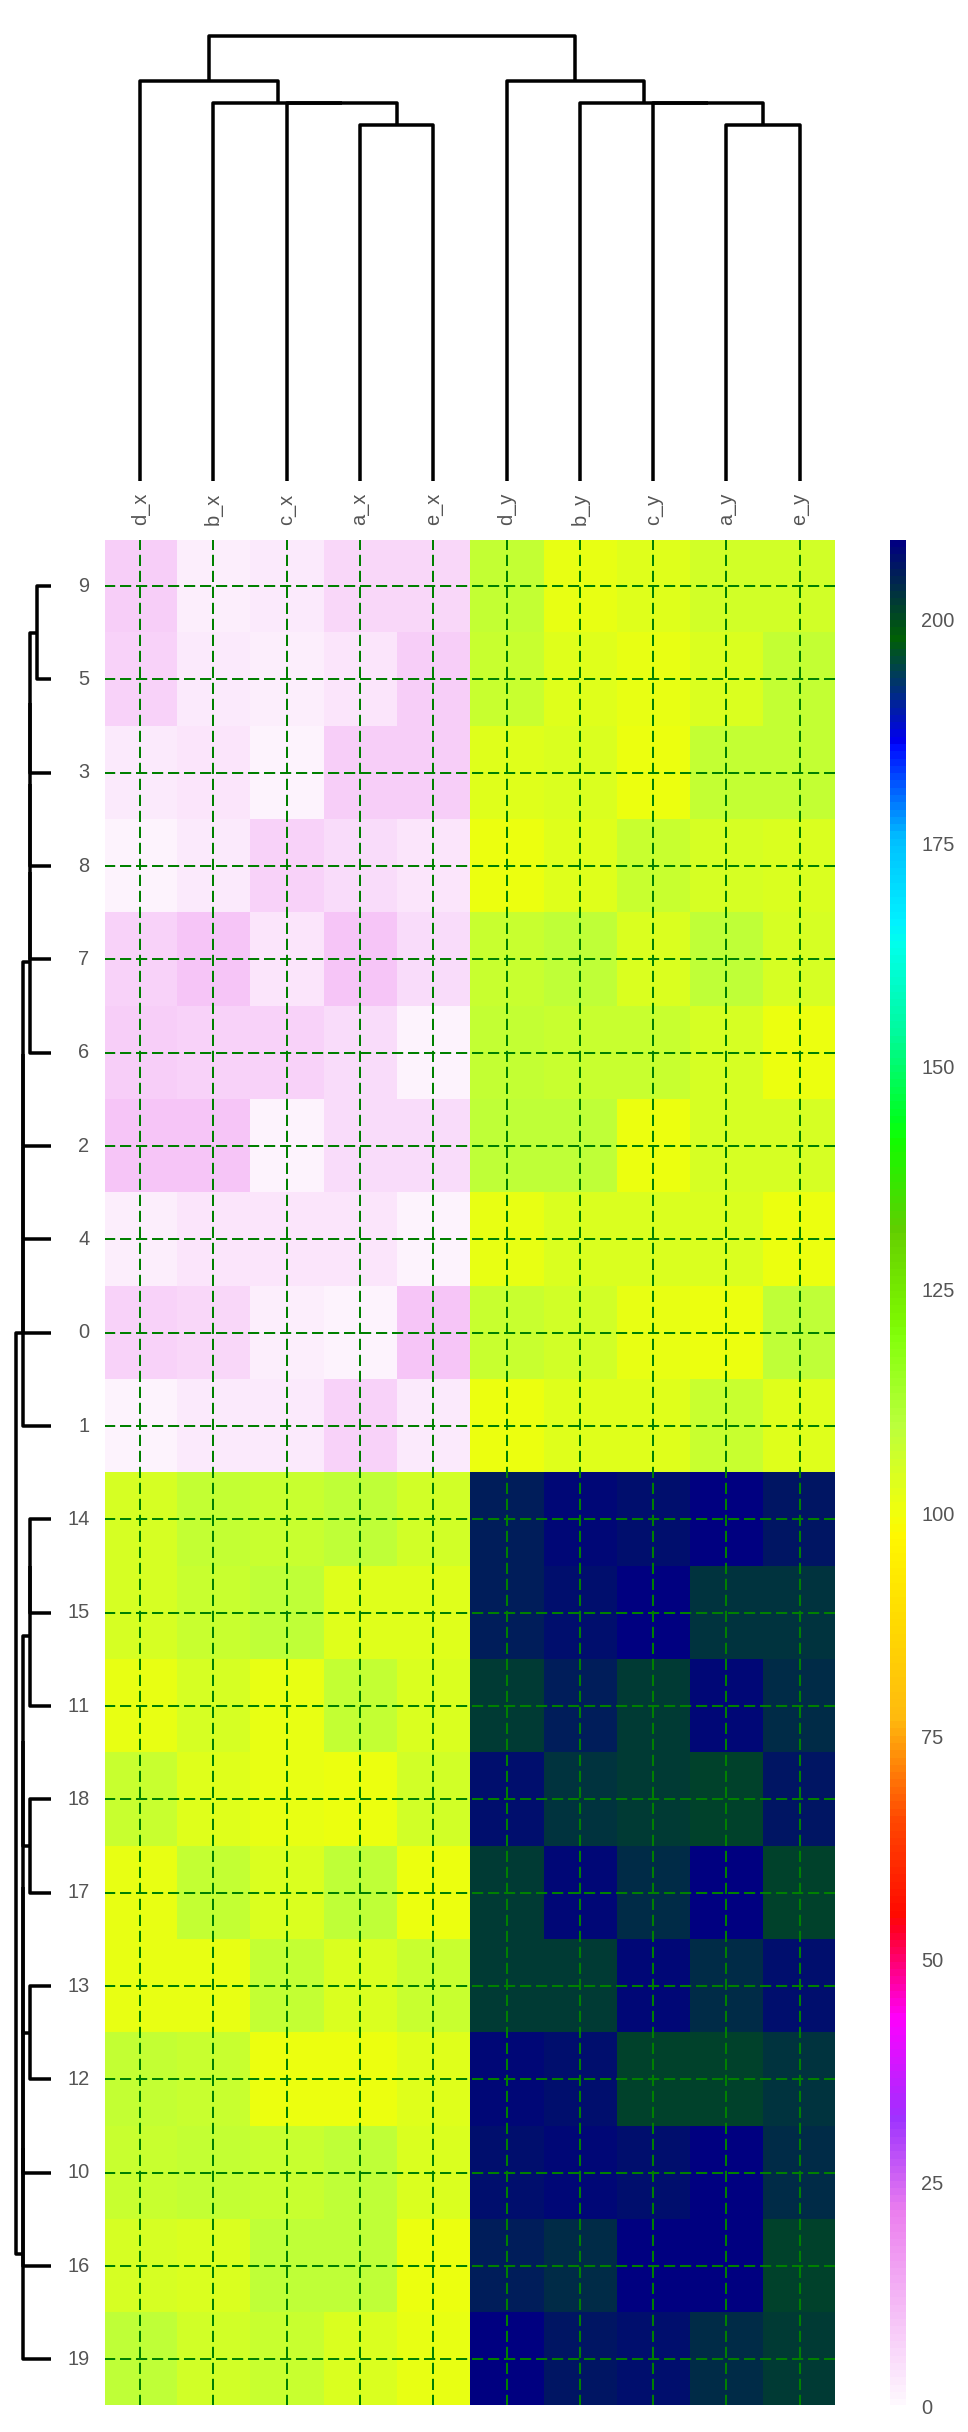

In [248]:
fig = plt.figure(figsize=(8, 22), facecolor='white')

gs = gridspec.GridSpec(2, 3, height_ratios=[1,4], width_ratios=[1, 20, 0.5], 
                       wspace=0.2, # horizontal space
                       hspace=0.05  # vertical space
                      )

X_ax = fig.add_subplot(gs[1])
col_func = lambda x: 'black'
_ = dendrogram(Z_columns, ax=X_ax,  leaf_font_size=10, link_color_func=col_func, labels=df4.columns.values)
X_ax.set_frame_on(False)
X_ax.axes.get_yaxis().set_visible(False)

Y_ax = fig.add_subplot(gs[3])
_ = dendrogram(Z_rows, ax=Y_ax, orientation='left', labels=df4.index.values,  link_color_func=col_func)
Y_ax.set_frame_on(False)
Y_ax.axes.get_xaxis().set_visible(False)

ax_mut = fig.add_subplot(gs[4])
ax_mut.xaxis.tick_top()
im = ax_mut.imshow(df.values,
#                    origin='lower',
                   interpolation='none',
#                    extent=list(Y_ax.get_xlim()) + list(X_ax.get_ylim()),
                   aspect='auto',
                   cmap='gist_ncar_r', 
                   vmin=0, vmax=df.values.max())

xtick_labels = df.columns.values.tolist()
ytick_labels = df.index.values.tolist()

# ticklabels follow major ticks
_ = ax_mut.set_xticks(np.arange(len(xtick_labels)), minor=False)
_ = ax_mut.set_yticks(np.arange(len(ytick_labels)), minor=False)
ax_mut.minorticks_off()

_ = ax_mut.set_xticklabels(xtick_labels, rotation=90, ha='center')
_ = ax_mut.set_yticklabels(ytick_labels, va='center')

Y_ax.set_xticklabels([])
Y_ax.set_yticklabels([])
X_ax.set_xticklabels([])
X_ax.set_yticklabels([])

ax_mut.grid(color='green', which='major', linestyle='--')
# ax_mut.grid(False)

ax_leg = fig.add_subplot(gs[5])
ax_leg.set_frame_on(False)
# ax_leg.set_axis_off()
cb = fig.colorbar(im, cax=ax_leg)

for ax in [Y_ax, X_ax, ax_mut, ax_leg]:
    ax.patch.set_facecolor('white')
    ax.patch.set_alpha(1)

# # plt.savefig('./candidate_genes_mutational_profile_{0}.jpg'.format(char_code), 
# #             dpi=200, bbox_inches='tight')

# scikit learn data preprocessing

In [273]:
pwd

'/projects/trans_scratch/validations/workspace/szong/python_study/2D_hierarchical_clustering'

In [32]:
X_train=pd.read_csv('X_train.csv')
Y_train=pd.read_csv('Y_train.csv')
X_test=pd.read_csv('X_test.csv')
Y_test=pd.read_csv('Y_test.csv')

In [21]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [287]:
# X_train[X_train.dtypes[X_train.dtypes=="float64"].index.values].hist(figsize=[5,5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effc4a13940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7effc14f7a20>]], dtype=object)

/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


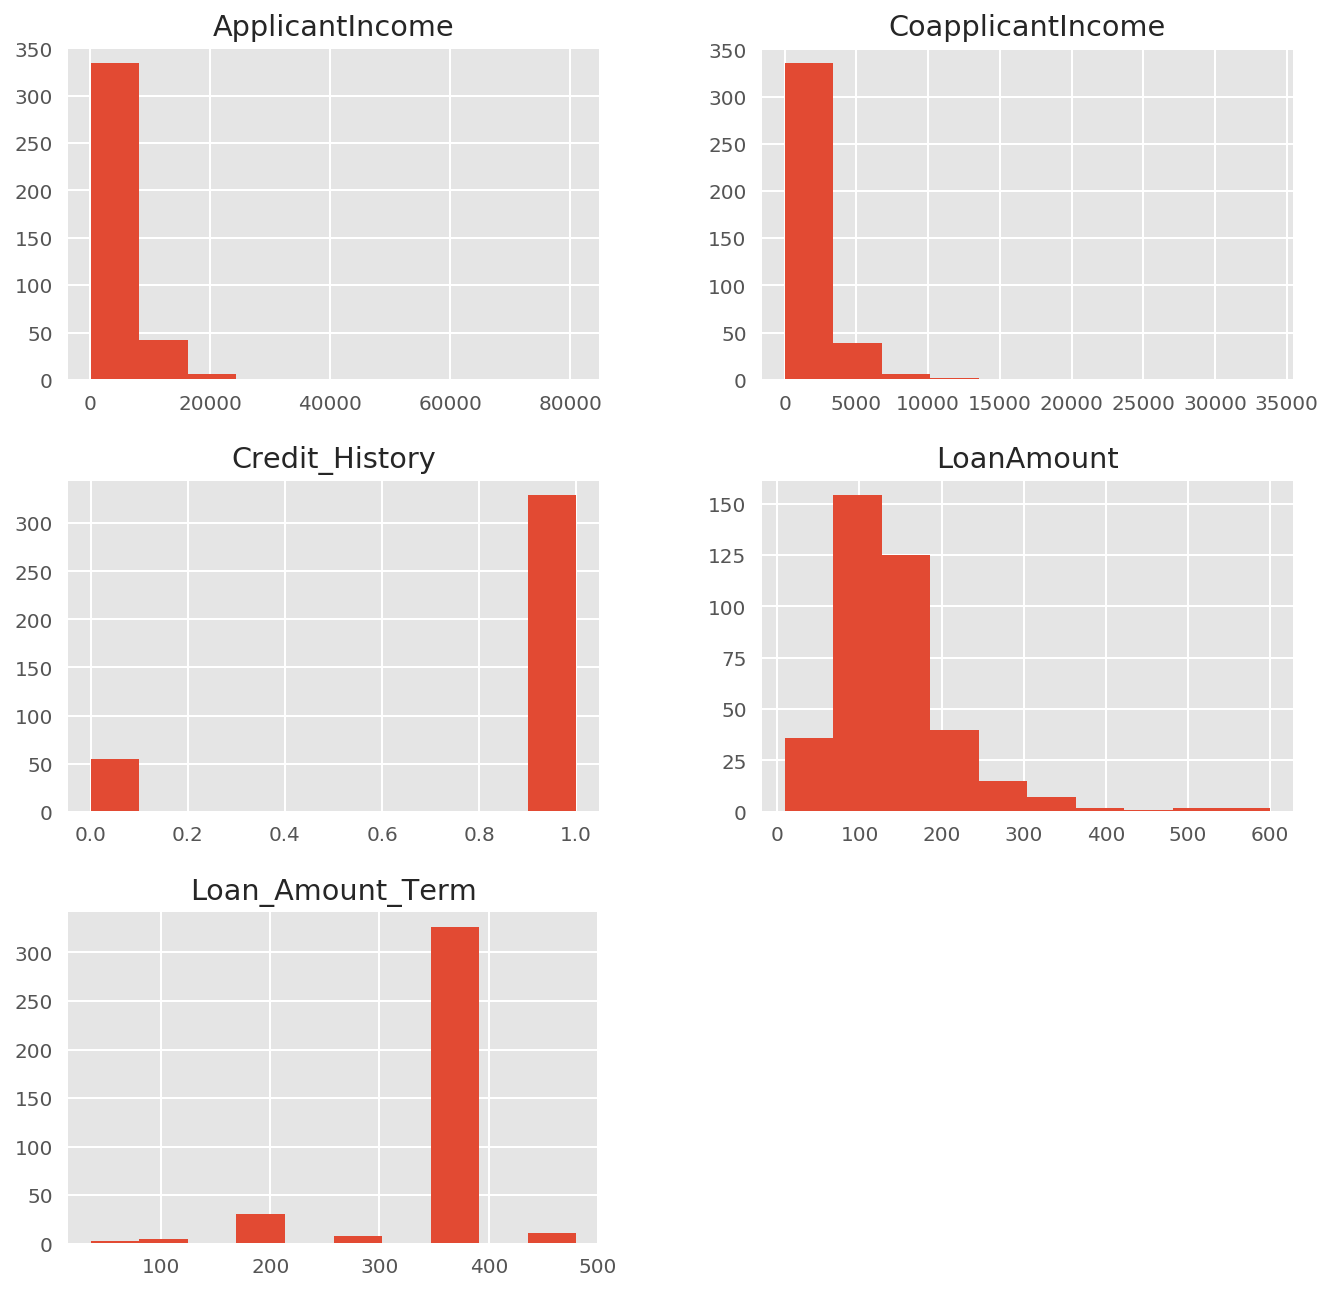

In [22]:
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

If we try to apply distance based methods such as kNN on these features, feature with the largest range will dominate the outcome results and we’ll obtain less accurate predictions.We can overcome this trouble using feature scaling.

In [23]:
# Initializing and Fitting a k-NN model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']],Y_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,knn.predict(X_test[['ApplicantIncome', 'CoapplicantIncome',
                             'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))

/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.61458333333333337

In [24]:
Y_train.Target.value_counts()/Y_train.Target.count()

Y    0.705729
N    0.294271
Name: Target, dtype: float64

In [25]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [26]:
# Fitting k-NN on our scaled data set
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,knn.predict(X_test_minmax))

/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.75

It should be kept in mind while performing distance based methods we must attempt to scale the data, so that the feature with lesser significance might not end up dominating the objective function due to its larger range. In addition, features having different unit should also be scaled thus providing each feature equal initial weightage and at the end we will have a better prediction model.

In [33]:
X_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002684,Female,No,0,Not Graduate,No,3400,0,95,360,1,Rural
1,LP001907,Male,Yes,0,Graduate,No,14583,0,436,360,1,Semiurban
2,LP001205,Male,Yes,0,Graduate,No,2500,3796,120,360,1,Urban
3,LP001275,Male,Yes,1,Graduate,No,3988,0,50,240,1,Urban
4,LP002455,Male,Yes,2,Graduate,No,3859,0,96,360,1,Semiurban
5,LP001029,Male,No,0,Graduate,No,1853,2840,114,360,1,Rural
6,LP001345,Male,Yes,2,Not Graduate,No,4288,3263,133,180,1,Urban
7,LP001047,Male,Yes,0,Not Graduate,No,2600,1911,116,360,0,Semiurban
8,LP002917,Female,No,0,Not Graduate,No,2165,0,70,360,1,Semiurban
9,LP002515,Male,Yes,1,Graduate,Yes,3450,2079,162,360,1,Semiurban


In [39]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_test.columns.values:
   # Encoding only categorical variables
   if X_test[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
       data=X_train[col].append(X_test[col])
       le.fit(data.values)
       X_train[col]=le.transform(X_train[col])
       X_test[col]=le.transform(X_test[col])

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [46]:
# Standardizing the features
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
# Fitting the logistic regression model
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)
# Checking the models accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.75

In [4]:
a = np.random.randint(1,20, size=(10,5))
df = pd.DataFrame(a,columns=list('abcde'))

In [7]:
df

,a,b,c,d,e
0,13,3,10,17,15
1,10,6,11,3,4
2,16,4,9,6,14
3,3,1,15,17,8
4,16,15,1,19,8
5,15,7,19,12,2
6,8,3,9,12,18
7,10,11,9,12,7
8,2,5,13,8,5
9,18,5,16,17,17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28048d23c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2804726b70>]], dtype=object)

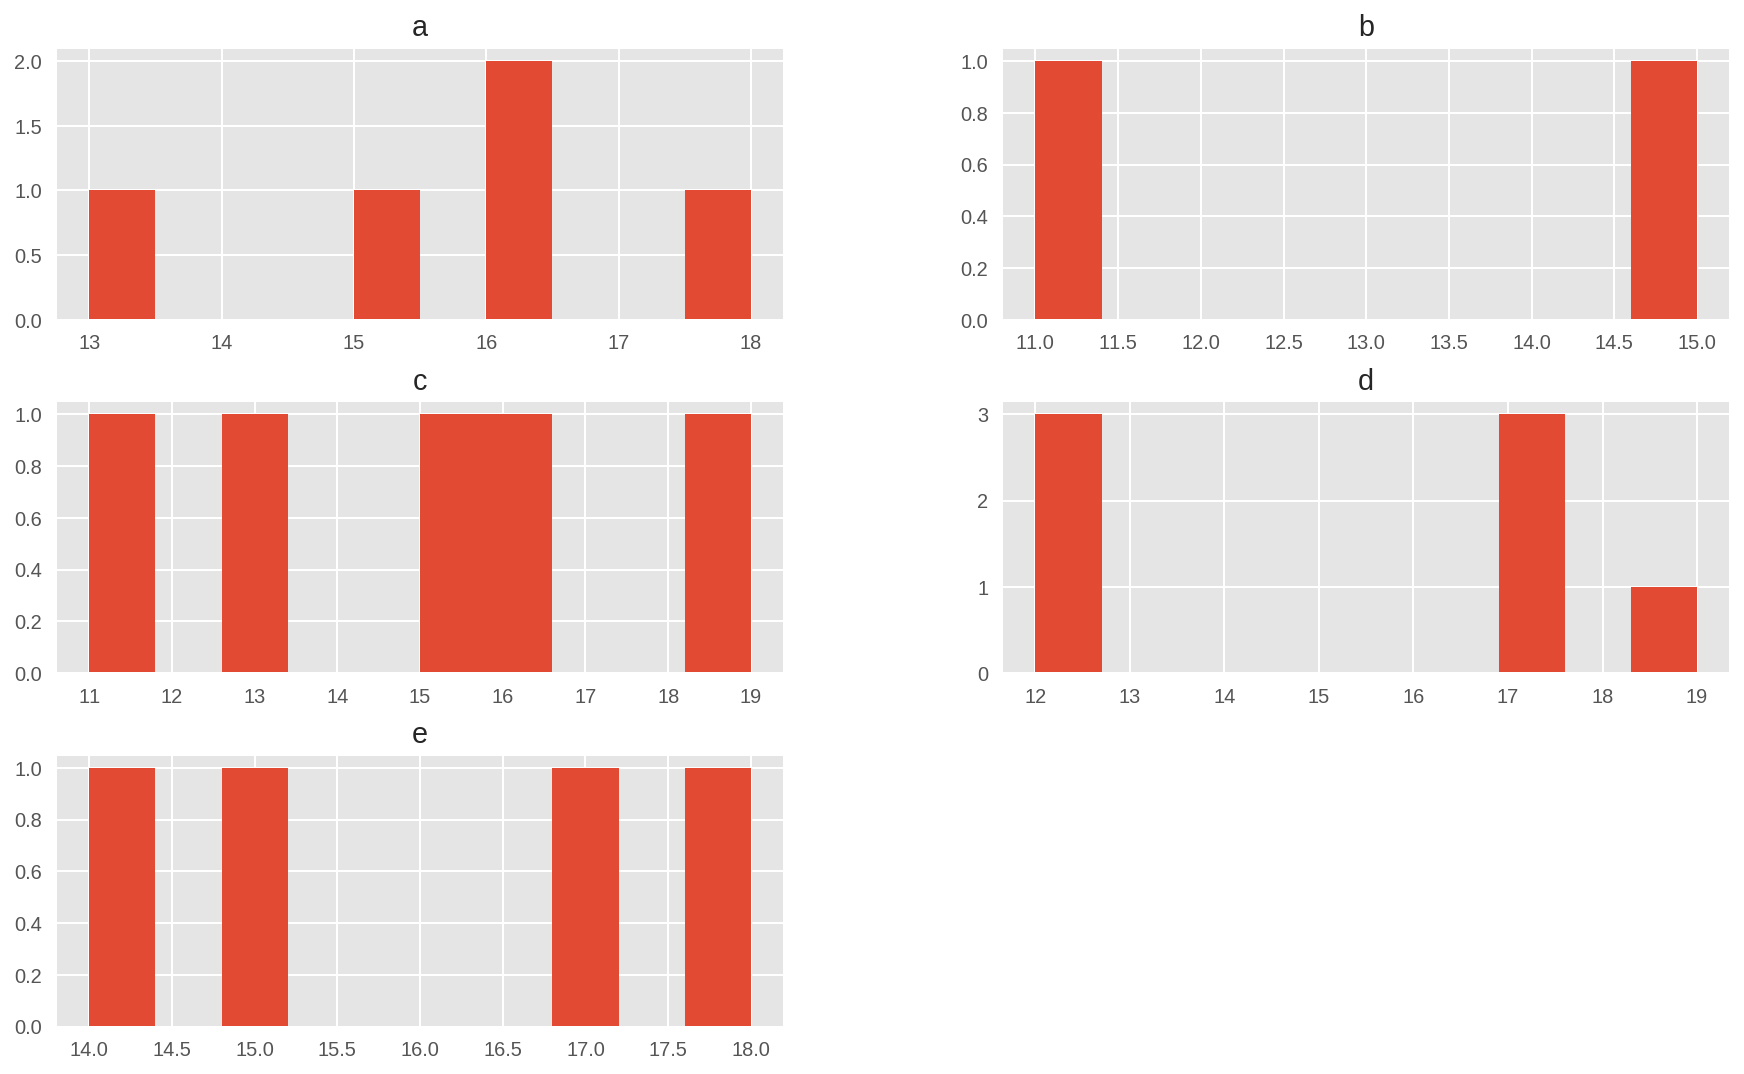

In [9]:
df[df>10].hist(figsize=[12,12])

# matplotlib examples: example plots

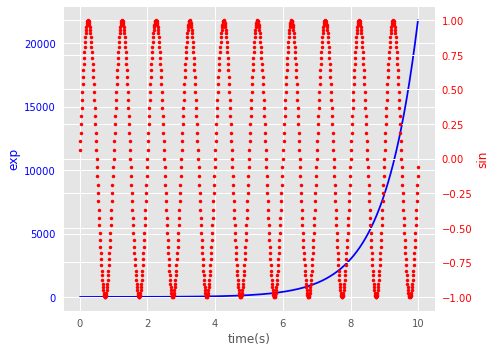

In [39]:
# twinx, twiny, share x or y axis

fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time(s)')
# color y axis label, ticks, and tick labels match the line color
ax1.set_ylabel('exp', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = np.sin(2 * np.pi *t)
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()
plt.show()
plt.close()

In [33]:
# colors

# markers
# ``'-'``             solid line style
# ``'--'``            dashed line style
# ``'-.'``            dash-dot line style
# ``':'``             dotted line style
# ``'.'``             point marker
# ``','``             pixel marker
# ``'o'``             circle marker
# ``'v'``             triangle_down marker
# ``'^'``             triangle_up marker
# ``'<'``             triangle_left marker
# ``'>'``             triangle_right marker
# ``'1'``             tri_down marker
# ``'2'``             tri_up marker
# ``'3'``             tri_left marker
# ``'4'``             tri_right marker
# ``'s'``             square marker
# ``'p'``             pentagon marker
# ``'*'``             star marker
# ``'h'``             hexagon1 marker
# ``'H'``             hexagon2 marker
# ``'+'``             plus marker
# ``'x'``             x marker
# ``'D'``             diamond marker
# ``'d'``             thin_diamond marker
# ``'|'``             vline marker
# ``'_'``             hline marker

# colors
# 'b'         blue
# 'g'         green
# 'r'         red
# 'c'         cyan
# 'm'         magenta
# 'y'         yellow
# 'k'         black
# 'w'         white

# most distinctive 20 colors
# Hex	RGB	CMYK
# Red	#e6194b	(230, 25, 75)	(0, 100, 66, 0)
# Green	#3cb44b	(60, 180, 75)	(75, 0, 100, 0)
# Yellow	#ffe119	(255, 225, 25)	(0, 25, 95, 0)
# Blue	#0082c8	(0, 130, 200)	(100, 35, 0, 0)
# Orange	#f58231	(245, 130, 48)	(0, 60, 92, 0)
# Purple	#911eb4	(145, 30, 180)	(35, 70, 0, 0)
# Cyan	#46f0f0	(70, 240, 240)	(70, 0, 0, 0)
# Magenta	#f032e6	(240, 50, 230)	(0, 100, 0, 0)
# Lime	#d2f53c	(210, 245, 60)	(35, 0, 100, 0)
# Pink	#fabebe	(250, 190, 190)	(0, 30, 15, 0)
# Teal	#008080	(0, 128, 128)	(100, 0, 0, 50)
# Lavender	#e6beff	(230, 190, 255)	(10, 25, 0, 0)
# Brown	#aa6e28	(170, 110, 40)	(0, 35, 75, 33)
# Beige	#fffac8	(255, 250, 200)	(5, 10, 30, 0)
# Maroon	#800000	(128, 0, 0)	(0, 100, 100, 50)
# Mint	#aaffc3	(170, 255, 195)	(33, 0, 23, 0)
# Olive	#808000	(128, 128, 0)	(0, 0, 100, 50)
# Coral	#ffd8b1	(255, 215, 180)	(0, 15, 30, 0)
# Navy	#000080	(0, 0, 128)	(100, 100, 0, 50)
# Grey	#808080	(128, 128, 128)	(0, 0, 0, 50)
# White	#FFFFFF	(255, 255, 255)	(0, 0, 0, 0)
# Black	#000000	(0, 0, 0)	(0, 0, 0, 100)

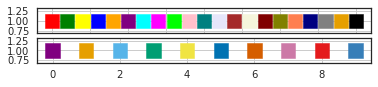

In [67]:
# one set of chosen colors
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = '0.15'
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,1))

    clrs1 = ['red', 'green', 'yellow', 'blue', 'orange', 'purple',
     'cyan', 'magenta', 'lime', 'pink', 'teal', 'lavender', 'brown',
     'beige', 'maroon', 'olive', 'coral', 'navy', 'grey','#E69F00', 'black']

    ax1.scatter(np.arange(len(clrs1)),[1]*len(clrs1), marker='s',s=200,c=clrs1)

    clrs2 = ["purple", "#E69F00", "#56B4E9", "#009E73", "#F0E442", 
            "#0072B2", "#D55E00", "#CC79A7", "#E41A1C", "#377EB8"]
    ax2.scatter(np.arange(len(clrs2)),[1]*len(clrs2), marker='s',s=200,c=clrs2)

    plt.show()
    plt.close()

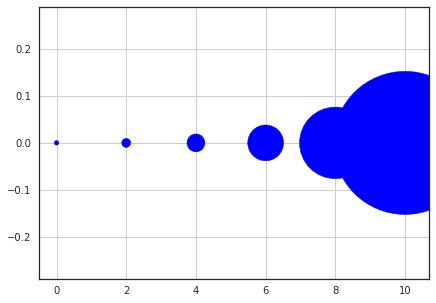

In [68]:
# doubling the width of markers
x = [0,2,4,6,8,10]
y = [0]*len(x)
s = [20*4**n for n in range(len(x))]
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111)
    ax.scatter(x,y,s=s,c='blue')
    plt.show()
    plt.close()

In [70]:
# http://people.duke.edu/~ccc14/cfar-data-2016/Getting_Started_With_Graphics.html
url = 'http://bit.ly/2b72LNj'
df = pd.read_csv(url)
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


good examples here for sns plotting
http://seaborn.pydata.org/tutorial/categorical.html?highlight=panel%20data

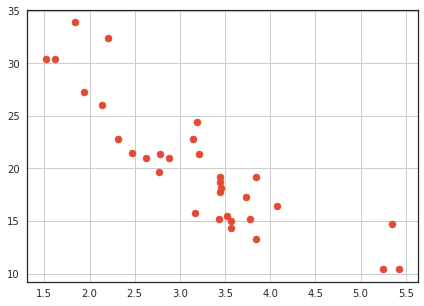

In [71]:
f = '/home/szong/projects/development/notebooks/test.csv'
df.to_csv(f, index=False)
df = pd.read_csv(f)

# scatter plot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    plt.scatter(x = 'wt', y = 'mpg', data = df)
    pass

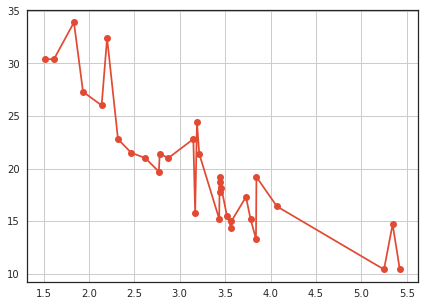

In [51]:
# line plot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'))
    pass

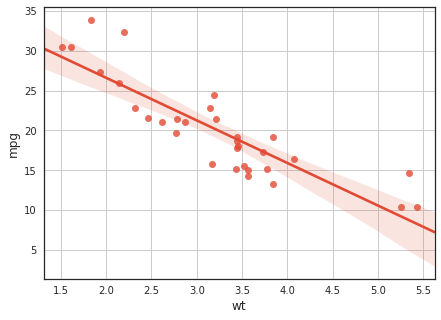

In [53]:
# Linear regression
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.regplot('wt', 'mpg', data = df)
    pass

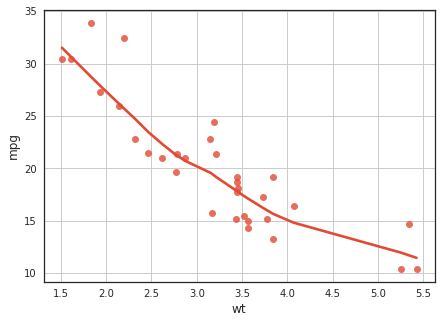

In [55]:
# Non-parametric regression
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.regplot('wt', 'mpg', data = df, lowess = True,)
    pass

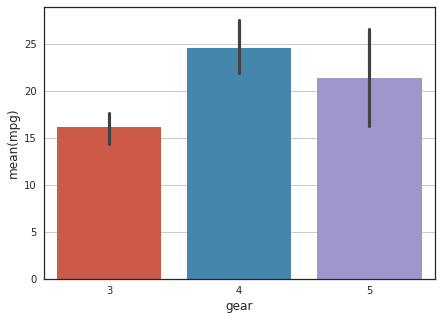

In [56]:
# Swarm plot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.barplot('gear', 'mpg', data = df)
    pass

In [1]:
# boxplot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns_plot = sns.boxplot('gear', 'mpg', data = df)
   
    pass

NameError: name 'plt' is not defined

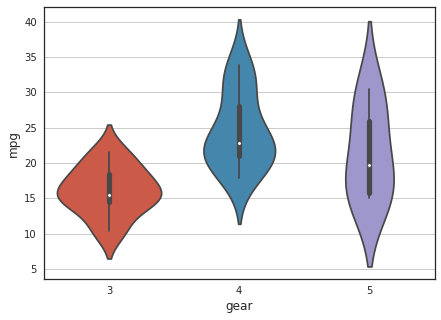

In [59]:
# violin plot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.violinplot('gear', 'mpg', data = df)
    pass

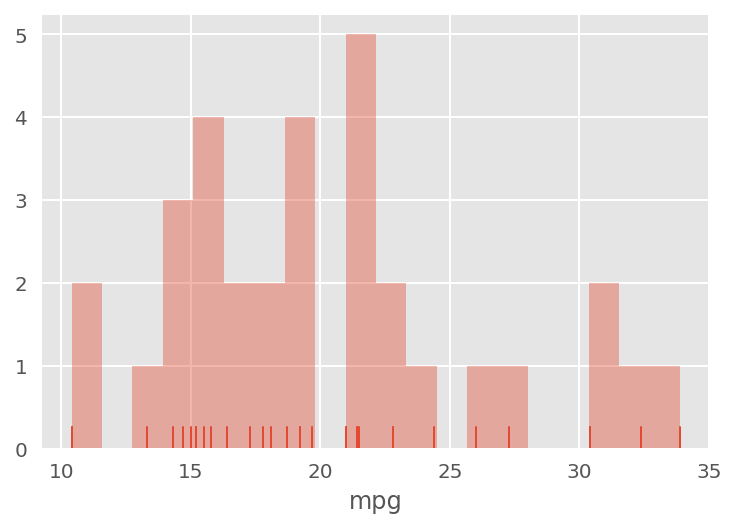

In [39]:
# histogram
sns.distplot(df.mpg, kde=False, rug=True, bins=20)
pass

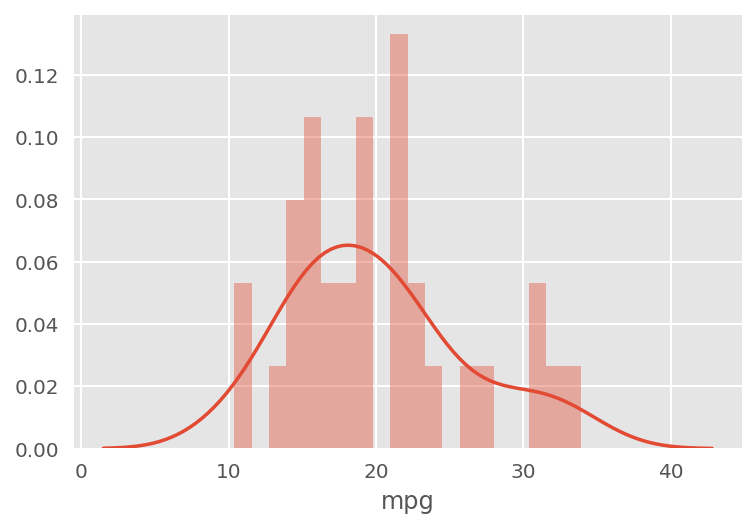

In [40]:
# density plot
sns.distplot(df.mpg, bins=20)
pass

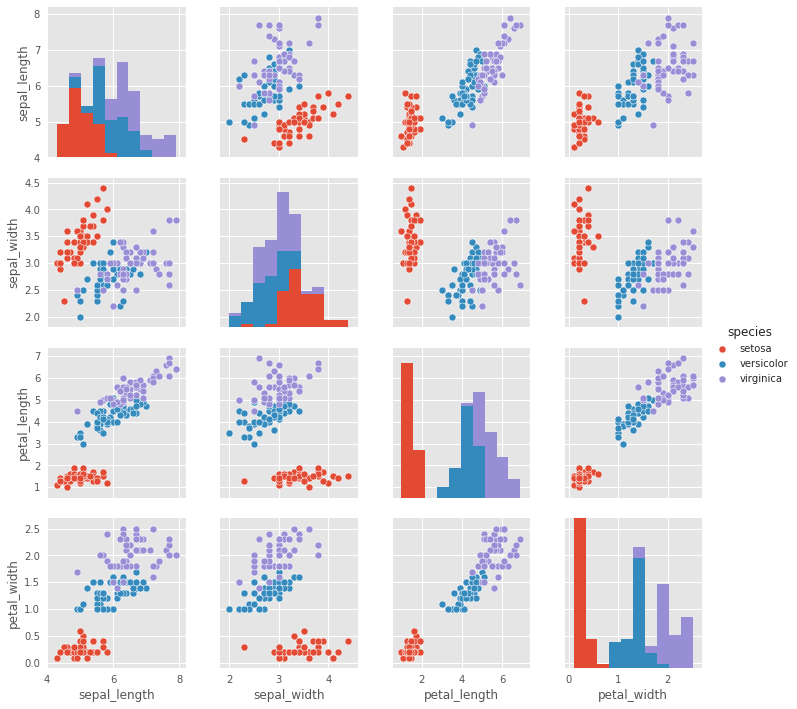

In [64]:
df = sns.load_dataset('iris')
sns_plot = sns.pairplot(df, hue='species', size=2.5)
sns_plot.savefig("output.png")

# Heatmap

In [41]:
import string

In [90]:
nrows = 20
ncols = 20
row_names = range(1970, 1970 + nrows)
col_names = [string.ascii_lowercase[i:i+5] for i in range(ncols)]
values = np.random.random((nrows, ncols))

In [91]:

df = pd.DataFrame(values, index = row_names, columns = col_names)

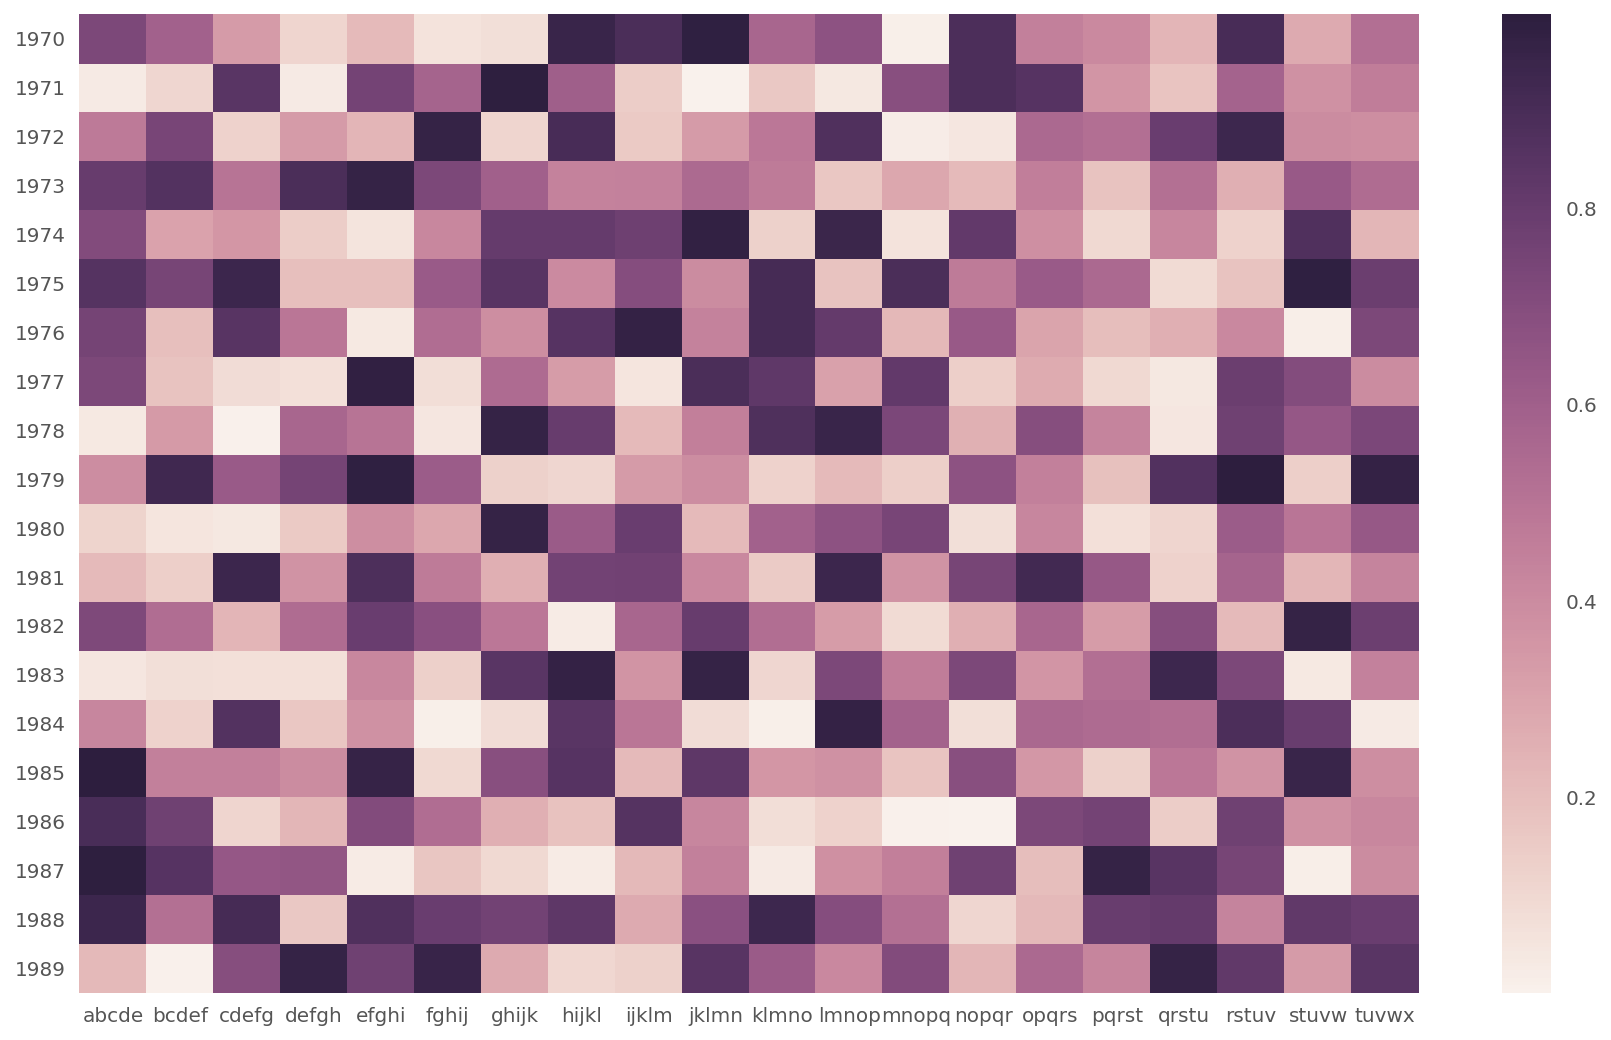

In [92]:
sns.heatmap(df)
pass

In [46]:
df

,abcde,bcdef,cdefg,defgh,efghi,fghij,ghijk,hijkl,ijklm,jklmn,klmno,lmnop,mnopq,nopqr,opqrs,pqrst,qrstu,rstuv,stuvw,tuvwx
1970,0.157999,0.400952,0.221401,0.169409,0.156212,0.151197,0.576514,0.345677,0.165816,0.563096,0.191769,0.677002,0.743354,0.337736,0.735721,0.478951,0.145861,0.019833,0.179940,0.009186
1971,0.318237,0.645690,0.413919,0.573197,0.708997,0.146826,0.538534,0.515701,0.438412,0.961338,0.876926,0.224189,0.745037,0.241745,0.446660,0.193014,0.286732,0.938552,0.720058,0.551138
1972,0.546906,0.145895,0.132717,0.692144,0.130529,0.168829,0.752038,0.041198,0.136662,0.080663,0.964559,0.658083,0.378105,0.022313,0.594199,0.536116,0.589211,0.089660,0.827306,0.305277
1973,0.256396,0.759101,0.012908,0.474248,0.036020,0.926043,0.868723,0.029875,0.224811,0.950571,0.925594,0.150872,0.617580,0.267338,0.308626,0.179000,0.354523,0.703042,0.450523,0.844568
1974,0.144197,0.533277,0.399198,0.684662,0.246077,0.744825,0.339754,0.171376,0.039469,0.604127,0.336967,0.425848,0.005047,0.176459,0.732639,0.585848,0.189532,0.849067,0.104523,0.038351
1975,0.372480,0.758425,0.174849,0.999919,0.428853,0.391162,0.394314,0.562920,0.962580,0.813735,0.417049,0.661802,0.388284,0.099635,0.796834,0.996978,0.210317,0.140394,0.768341,0.899396
1976,0.575461,0.400001,0.074420,0.015719,0.775525,0.247426,0.772356,0.585774,0.686376,0.715486,0.745177,0.452014,0.917773,0.787688,0.511914,0.294273,0.661096,0.104800,0.568979,0.319925
1977,0.489303,0.840898,0.146191,0.354142,0.319334,0.393044,0.816365,0.586589,0.185821,0.555915,0.290590,0.447366,0.610966,0.227386,0.775725,0.747624,0.495899,0.169180,0.586419,0.248790
1978,0.445139,0.641895,0.638612,0.402544,0.996695,0.243373,0.892027,0.004987,0.993759,0.337772,0.371947,0.939165,0.565821,0.913841,0.746220,0.347510,0.350788,0.120045,0.800396,0.191294
1979,0.679035,0.353413,0.239255,0.974611,0.254274,0.102920,0.185397,0.807392,0.625258,0.547404,0.154619,0.441066,0.758928,0.147190,0.484881,0.294814,0.212150,0.076489,0.345300,0.959385


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

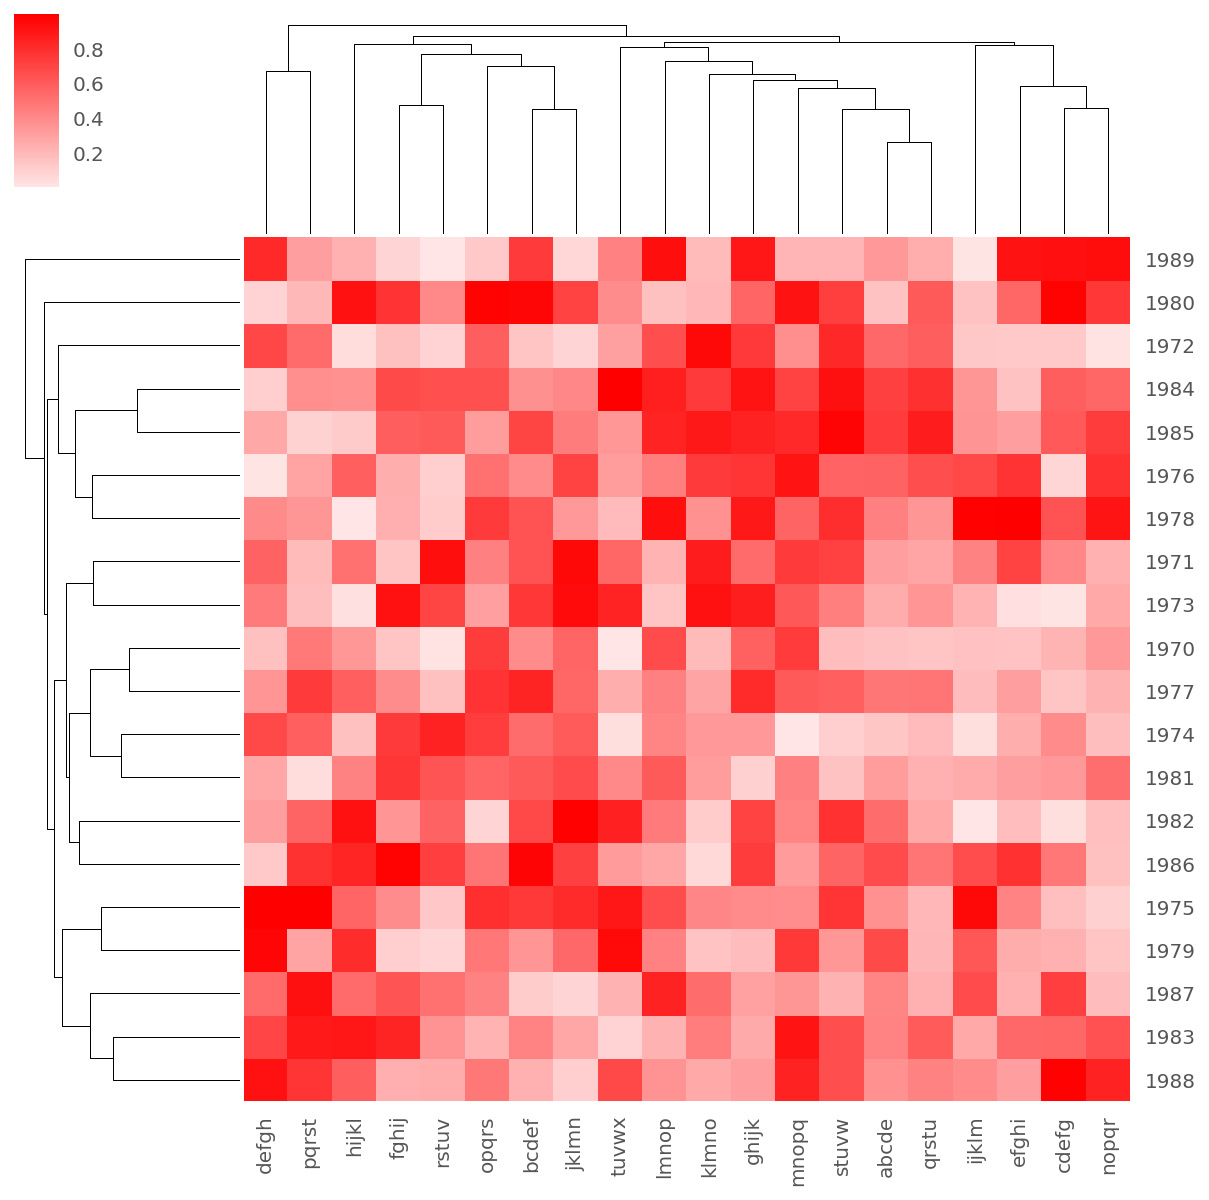

In [45]:
cmap = sns.light_palette('red', as_cmap=True)
g = sns.clustermap(df, cmap = cmap)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
pass

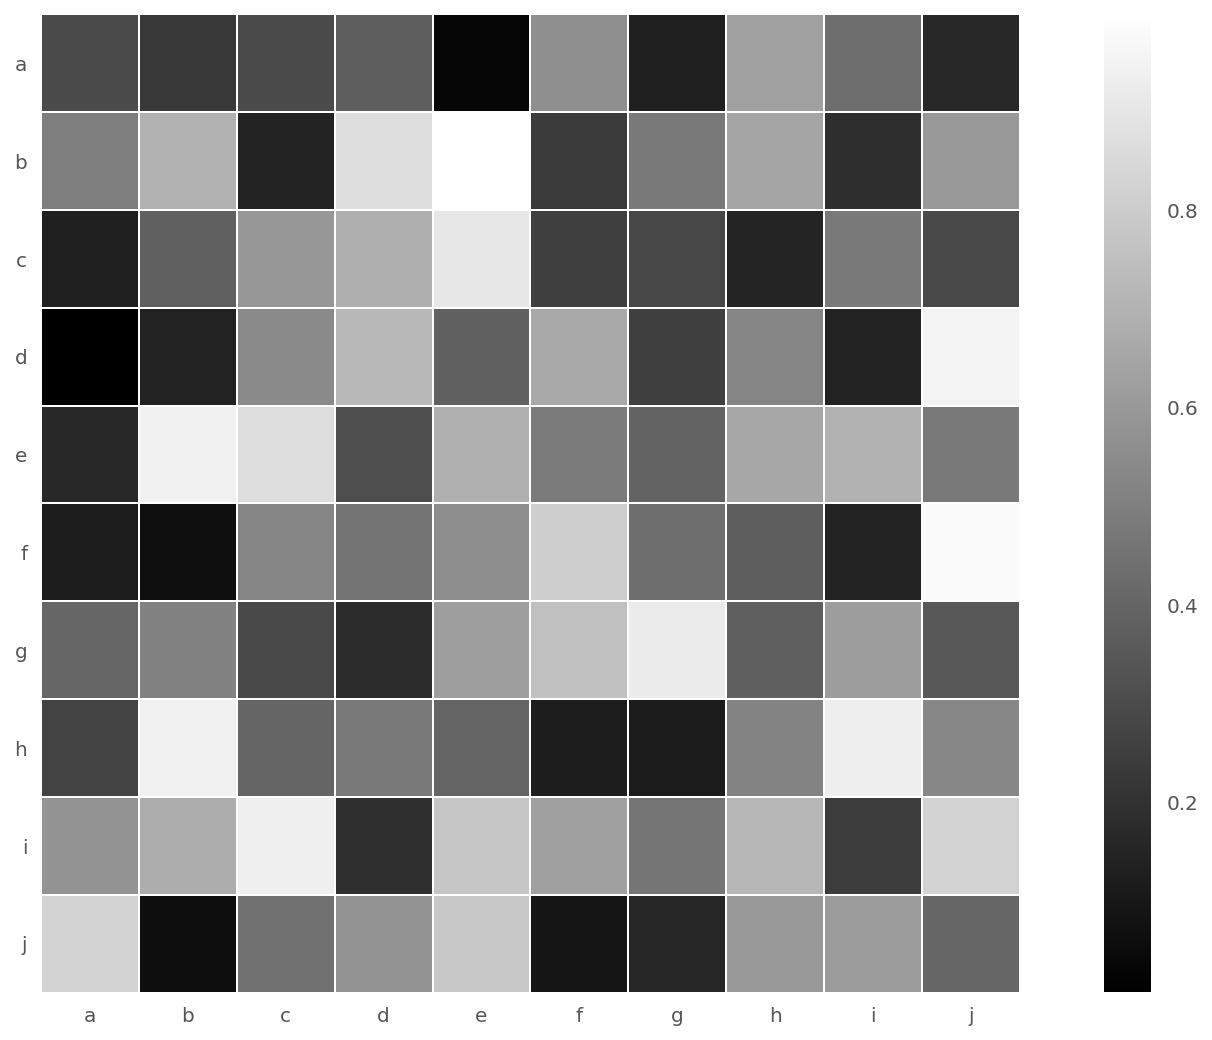

In [95]:
# import matplotlib.pyplot as plt
# import numpy as np

data = np.random.random((10,10))
labels = 'abcdefghij'

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='gray', interpolation='none')
fig.colorbar(im)

# Set the major ticks at the centers and minor tick at the edges
locs = np.arange(len(labels))
for axis in [ax.xaxis, ax.yaxis]:
    _ = axis.set_ticks(locs + 0.5, minor=True)
    _ = axis.set(ticks=locs, ticklabels=labels)

# Turn on the grid for the minor ticks
ax.grid(False)
ax.grid(True, which='minor')


plt.show()

In [52]:
exercise = sns.load_dataset("exercise", index_col = 0)

In [26]:
exercise.head()
df = exercise[exercise.kind == 'running']
df.head()

,id,diet,pulse,time,kind
60,21,low fat,93,1 min,running
61,21,low fat,98,15 min,running
62,21,low fat,110,30 min,running
63,22,low fat,98,1 min,running
64,22,low fat,104,15 min,running


In [ ]:
sns.barplot(x = 'time', y = 'pulse', hue = 'diet', data = df, alpha = 0.5);
plt.gca().set(yscale = "log") #change y to log scale
pass


[None]

/projects/trans_scratch/validations/workspace/szong/deep_learning/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


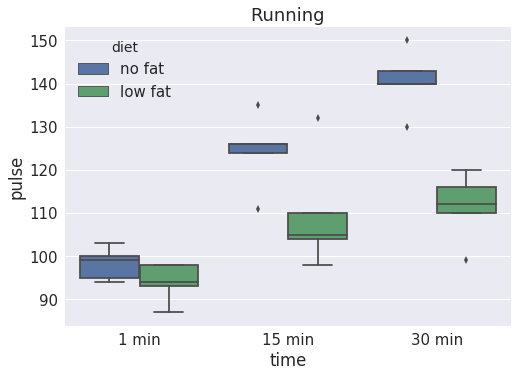

In [31]:

sns.boxplot(x = 'time', y = 'pulse', hue = 'diet', data = df)
plt.title('Running')
pass
plt.show()

In [28]:
# exercise

/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


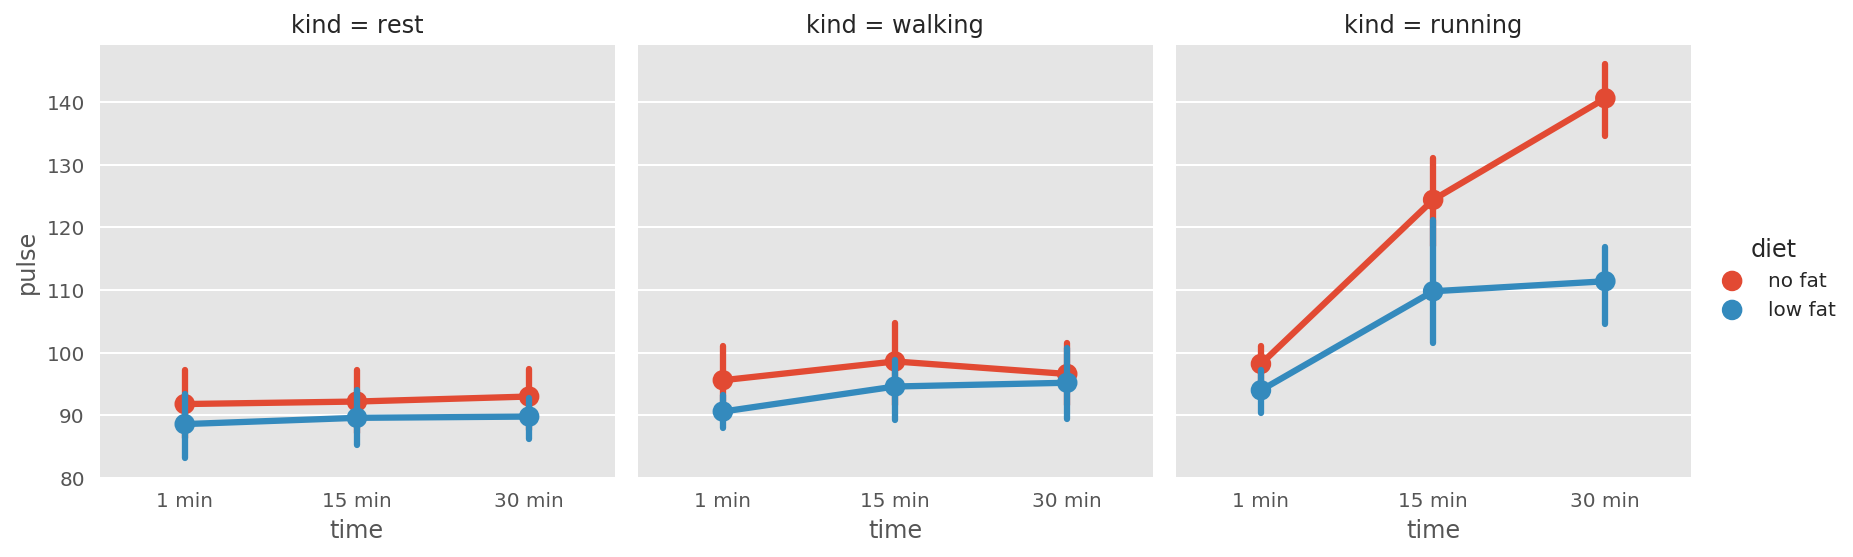

In [53]:
# sns.set_context("paper", font_scale=2.0)
# sns.set_style('white')
g = sns.factorplot(x = 'time', y = 'pulse', hue = 'diet', col = 'kind',
               kind = 'point', data = exercise)
sns.set()
sns.set_context("notebook", font_scale = 1.5)
g.savefig('exercise1.png')
pass

In [27]:
# practice labelencoder
lbe = LabelEncoder()
df.diet.value_counts()
lbe.fit(df.diet)
df['new'] = lbe.transform(df['diet'])
lbe.inverse_transform(1)

In [76]:
df.head(2)

,id,diet,pulse,time,kind,new
60,21,low fat,93,1 min,running,0
61,21,low fat,98,15 min,running,0


In [80]:
df['aaa'] = df.diet.apply(lambda x: 'bbbb' if x == 'no fat' else 'cccc')

In [81]:
df.head()
df.tail()

,id,diet,pulse,time,kind,new,aaa
60,21,low fat,93,1 min,running,0,cccc
61,21,low fat,98,15 min,running,0,cccc
62,21,low fat,110,30 min,running,0,cccc
63,22,low fat,98,1 min,running,0,cccc
64,22,low fat,104,15 min,running,0,cccc


,id,diet,pulse,time,kind,new,aaa
85,29,no fat,135,15 min,running,1,bbbb
86,29,no fat,130,30 min,running,1,bbbb
87,30,no fat,99,1 min,running,1,bbbb
88,30,no fat,111,15 min,running,1,bbbb
89,30,no fat,150,30 min,running,1,bbbb


/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/cbook.py:2044: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/cbook.py:2045: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/cbook.py:2058: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/cbook.py:2065: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


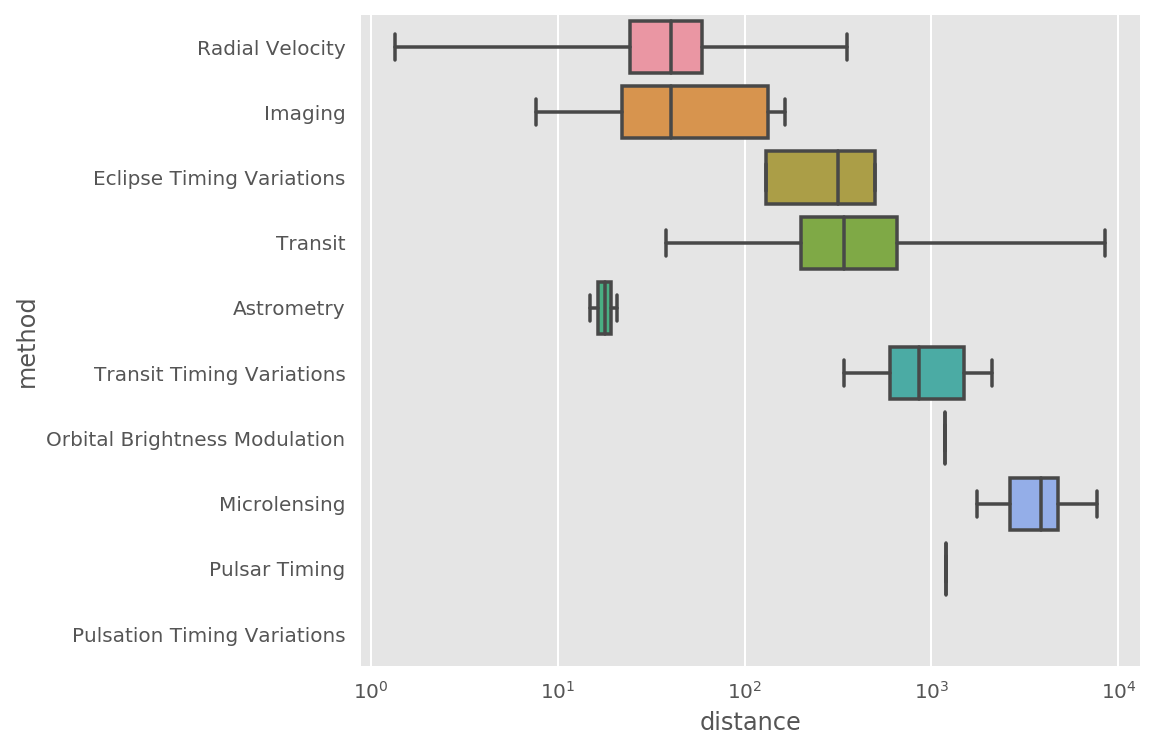

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=np.inf)#, palette="Set2")

/projects/trans_scratch/validations/workspace/szong/deep_learning/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2044: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/projects/trans_scratch/validations/workspace/szong/deep_learning/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2045: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/projects/trans_scratch/validations/workspace/szong/deep_learning/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2058: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/projects/trans_scratch/validations/workspace/szong/deep_learning/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2065: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/projects/trans_scratch/validations/workspace/szong/deep_learning/anaconda3/lib/python3.6/site-pack

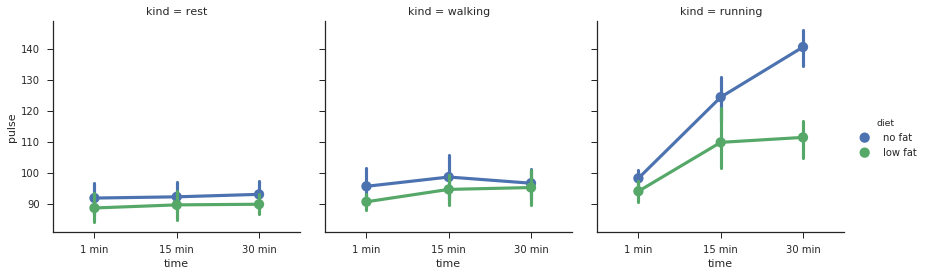

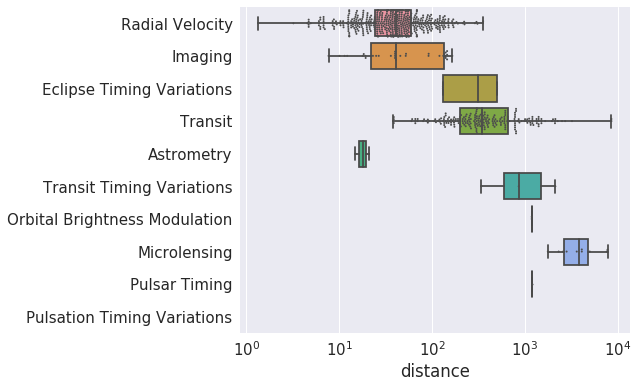

In [30]:
# # Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.show()

In [50]:
planets.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

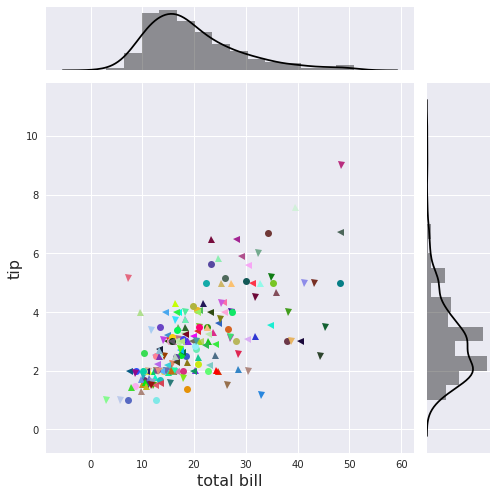

In [5]:

import seaborn as sns
from itertools import product
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
color = sns.color_palette()[5]
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg", stat_func=None,
                  xlim=(0, 60), ylim=(0, 12), color='k', size=7)

#Clear the axes containing the scatter plot
g.ax_joint.cla()

#Generate some colors and markers
colors = np.random.random((len(tips),3))
markers = ['x','o','v','^','<']*100

#Plot each individual point separately
for i,row in enumerate(tips.values):
    g.ax_joint.plot(row[0], row[1], color=colors[i], marker=markers[i])

g.set_axis_labels('total bill', 'tip', fontsize=16)

In [6]:
np.random.seed(sum(map(ord, "categorical")))

In [7]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

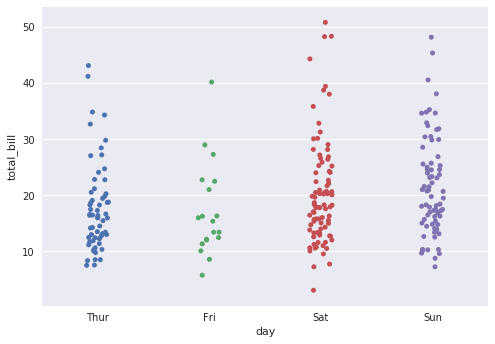

In [8]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

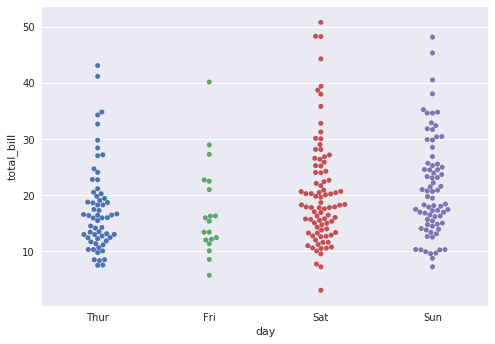

In [9]:
sns.swarmplot(x="day", y="total_bill", data=tips);

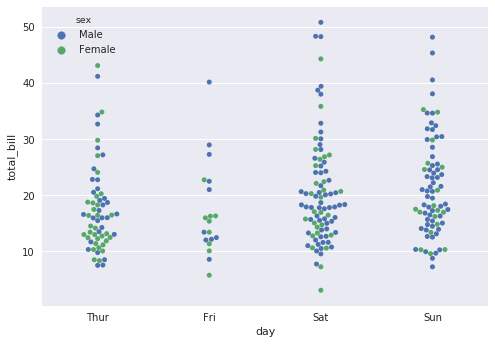

In [10]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

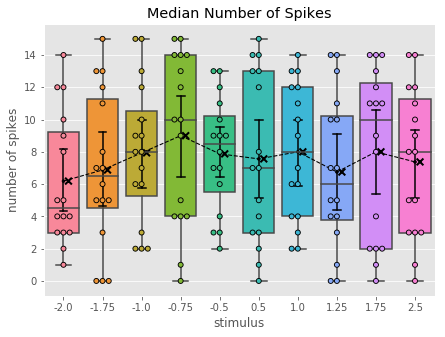

In [2]:



trial_vec    = np.tile(np.arange(16)+1, 10)     
stimulus_vec = np.repeat([-2., -1.75, -1., -0.75, -0.5,  0.5,  1.,  1.25,  1.75,  2.5 ], 16)
data_vec     = np.random.randint(0, 16, size=160)
spi_num      = pd.DataFrame({'trial': trial_vec, 
                             'stimulus': stimulus_vec, 'data': data_vec})

fig, ax = plt.subplots()

sns.pointplot(x="stimulus", y="data", data=spi_num, linestyles='', scale=1, 
              color='k', errwidth=1.5, capsize=0.2, markers='x', ax=ax)
#produce transform with 5 points offset in x direction
offset = transforms.ScaledTranslation(5/72., 0, ax.figure.dpi_scale_trans)
trans = ax.collections[0].get_transform()
ax.collections[0].set_transform(trans + offset)

sns.swarmplot(x="stimulus", y="data", data=spi_num, edgecolor="black", linewidth=.9, ax=ax)
sns.boxplot(x="stimulus", y="data", data=spi_num, saturation=1, ax=ax)
sns.pointplot(x="stimulus", y="data", data=spi_num, linestyles='--', scale=0.4, 
              color='k', errwidth=0, capsize=0, ax=ax)
plt.ylabel("number of spikes")
plt.title("Median Number of Spikes");

plt.show()

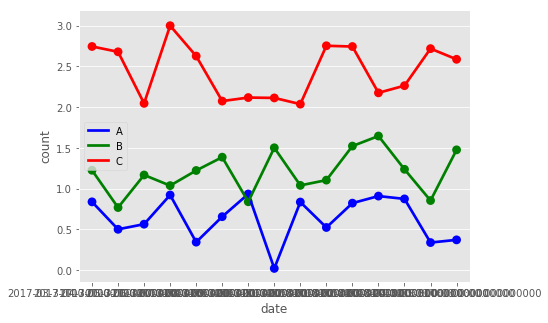

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

date = pd.date_range("2017-03", freq="M", periods=15)
count = np.random.rand(15,4)
df1 = pd.DataFrame({"date":date, "count" : count[:,0]})
df2 = pd.DataFrame({"date":date, "count" : count[:,1]+0.7})
df3 = pd.DataFrame({"date":date, "count" : count[:,2]+2})

f, ax = plt.subplots(1, 1)
x_col='date'
y_col = 'count'

sns.pointplot(ax=ax,x=x_col,y=y_col,data=df1,color='blue')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df2,color='green')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df3,color='red')

ax.legend(handles=ax.lines[::len(df1)+1], labels=["A","B","C"])
# print(ax.pointplot)

# ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
# plt.gcf().autofmt_xdate()

plt.show()

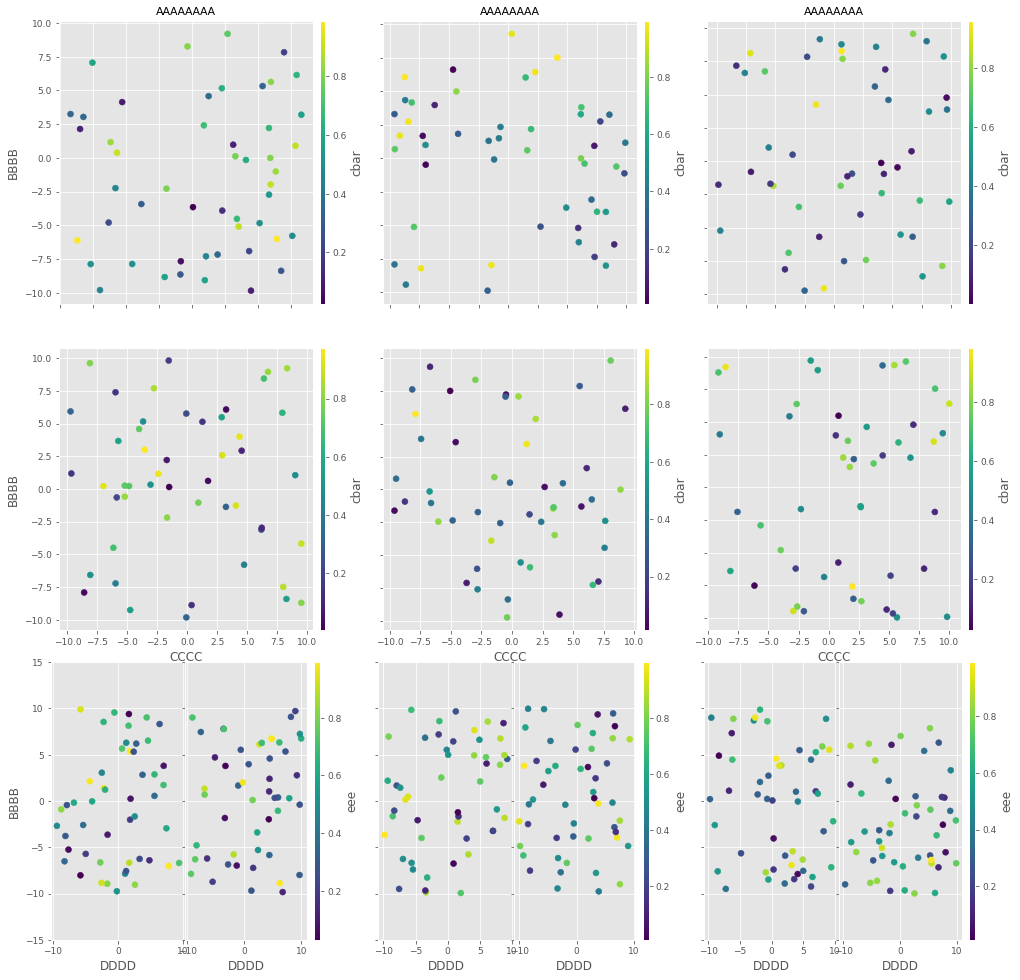

In [35]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np


def data():
    x = np.random.uniform(-10, 10., 50)
    y = np.random.uniform(-10, 10., 50)
    z = np.random.uniform(0, 1., 50)
    return x, y, z


def square_plot(gs, i):

    # Define gridspec ranges.
    x_gdsp = [[0, 2], [2, 4], [4, 6]]
    if i in [0, 1, 2]:
        y1, y2 = 0, 1
        x1, x2 = x_gdsp[i]
    elif i in [3, 4, 5]:
        y1, y2 = 1, 2
        x1, x2 = x_gdsp[i-3]

    ax = plt.subplot(gs[y1:y2, x1:x2])
    if i in [0, 1, 2]:
        plt.title('AAAAAAAA', fontsize=11)
        ax.set_xticklabels([])
    if i in [0, 3]:
        plt.ylabel('BBBB', fontsize=12)
    else:
        ax.set_yticklabels([])
    if i in [3, 4, 5]:
        plt.xlabel('CCCC', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=9)
    x, y, z = data()
    SC = plt.scatter(x, y, c=z)
    # Position colorbar.
    the_divider = make_axes_locatable(ax)
    color_axis = the_divider.append_axes("right", size="2%", pad=0.1)
    # Colorbar.
    cbar = plt.colorbar(SC, cax=color_axis)
    cbar.set_label('cbar', fontsize=12, labelpad=4, y=0.5)
    cbar.ax.tick_params(labelsize=9)
    ax.set_aspect(aspect='auto')


def rectangular_plots(gs, i):

    x_gdsp = [[[0, 1], [2, 3], [4, 5]], [[1, 2], [3, 4],  [5, 6]]]
    y1, y2 = 2, 3
    x11, x12 = x_gdsp[0][i]
    x21, x22 = x_gdsp[1][i]

    # Left plot.
    right_gs = gridspec.GridSpecFromSubplotSpec(
        1, 2, width_ratios=[1, 6], subplot_spec=gs[y1:y2, x11:x12],
        wspace=0.)
    ax3 = plt.subplot(right_gs[1])
    plt.ylim(-15., 15.)
    plt.xlabel('DDDD', fontsize=12)
    if i == 0:
        ax3.set_ylabel('BBBB', fontsize=12)
    else:
        ax3.set_yticklabels([])
    ax3.tick_params(axis='both', which='major', labelsize=9)
    x, y, z = data()
    plt.scatter(x, y, c=z)

    # Right pot.
    right_gs = gridspec.GridSpecFromSubplotSpec(
        1, 2, width_ratios=[6, 1], subplot_spec=gs[y1:y2, x21:x22],
        wspace=0.)
    ax4 = plt.subplot(right_gs[0])
    plt.ylim(-15., 15.)
    plt.xlabel('DDDD', fontsize=12)
    ax4.tick_params(axis='both', which='major', labelsize=9)
    ax4.set_yticklabels([])
    x, y, z = data()
    SC = plt.scatter(x, y, c=z)
    the_divider = make_axes_locatable(ax4)
    color_axis = the_divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(SC, cax=color_axis)
    cbar.set_label('eee', fontsize=12, labelpad=4, y=0.5)
    cbar.ax.tick_params(labelsize=9)


fig = plt.figure(figsize=(14.25, 13.5))

# Make square plots.
gs = gridspec.GridSpec(3, 6)
for i in range(6):
    square_plot(gs, i)

# New gridspecs for bottom rectangular plots.
# ***Values selected by hand***
gs2 = gridspec.GridSpec(3, 6)
gs2.update(wspace=0.0, bottom=0.029, left=0.031, right=0.95)
gs3 = gridspec.GridSpec(3, 6)
gs3.update(wspace=0.0, bottom=0.029, left=0.043, right=0.965)
gs4 = gridspec.GridSpec(3, 6)
gs4.update(wspace=0.0, bottom=0.029, left=0.05, right=0.976)

# Make plots.
rectangular_plots(gs2, 0)
rectangular_plots(gs3, 1)
rectangular_plots(gs4, 2)

fig.tight_layout()
plt.savefig('del.png', dpi=150)

# subset dataframe

In [ ]:
df = pd.DataFrame(np.random.rand(4,7), columns = ['foo', 'bar', 'quz', 'ant', 'cat', 'sat', 'dat'], index=['v', 'w', 'y', 'z'])
df

df.loc['w','bar']

# Let's assume we have a DataFrame with the following columns:
# foo, bar, quz, ant, cat, sat, dat.
# selects all rows and all columns beginning at 'foo' up to and including 'ant'
df.loc[:, 'foo':'sat']
# foo bar quz ant cat sat

# .loc accepts the same slice notation that Python lists do for both row and columns. Slice notation being start:stop:step
# slice from 'foo' to 'cat' by every 2nd column
df.loc[:, 'foo':'cat':2]
# foo quz cat

# slice from the beginning to 'bar'
df.loc[:, :'bar']
# foo bar

# slice from 'quz' to the end by 3
df.loc[:, 'quz'::3]
# quz sat

# attempt from 'sat' to 'bar'
df.loc[:, 'sat':'bar']
# no columns returned

# slice from 'sat' to 'bar'
df.loc[:, 'sat':'bar':-1]
# sat cat ant quz bar

# slice notation is syntatic sugar for the slice function
# slice from 'quz' to the end by 2 with slice function
df.loc[:, slice('quz',None, 2)]
# quz cat dat

# select specific columns with a list
# select columns foo, bar and dat
df.loc[:, ['foo','bar','dat']]
# foo bar dat

# You can slice by rows and columns. For instance if you have 5 rows with labels v, w, x, y, z
# slice from 'w' to 'y' and 'foo' to 'ant' by 3
df.loc['w':'y', 'foo':'ant':3]
#    foo ant
# w
# x
# y

In [115]:
np.random.random(size=(3,2,3))
np.random.randn(3,2)
np.arange(start=3,stop=8,step=2, dtype=int)
np.random.randint(1,10, size=(3,2))
np.random.rand(12,2)

array([[[  4.27047901e-02,   9.39415748e-01,   9.57449414e-01],
        [  6.08112007e-01,   3.13563571e-01,   8.25007019e-01]],

       [[  2.50624307e-01,   6.07377288e-01,   6.63370964e-02],
        [  7.01682803e-04,   4.33394854e-02,   4.13399256e-02]],

       [[  4.02848599e-01,   8.97581596e-01,   6.99533481e-02],
        [  3.36702592e-01,   9.33449589e-01,   9.79210609e-02]]])

array([[-0.96826172,  0.87839681],
       [-1.36227128,  0.16054187],
       [-1.27376699, -0.56183754]])

array([3, 5, 7])

array([[7, 9],
       [8, 7],
       [9, 7]])

array([[ 0.92799601,  0.01611326],
       [ 0.79979442,  0.90247153],
       [ 0.65254042,  0.7347523 ],
       [ 0.40654487,  0.3640495 ],
       [ 0.75577408,  0.98696747],
       [ 0.79115596,  0.6729269 ],
       [ 0.91687097,  0.69663522],
       [ 0.09763458,  0.68556998],
       [ 0.96808331,  0.64806968],
       [ 0.17800992,  0.38202392],
       [ 0.79767434,  0.65976532],
       [ 0.27234237,  0.26030632]])

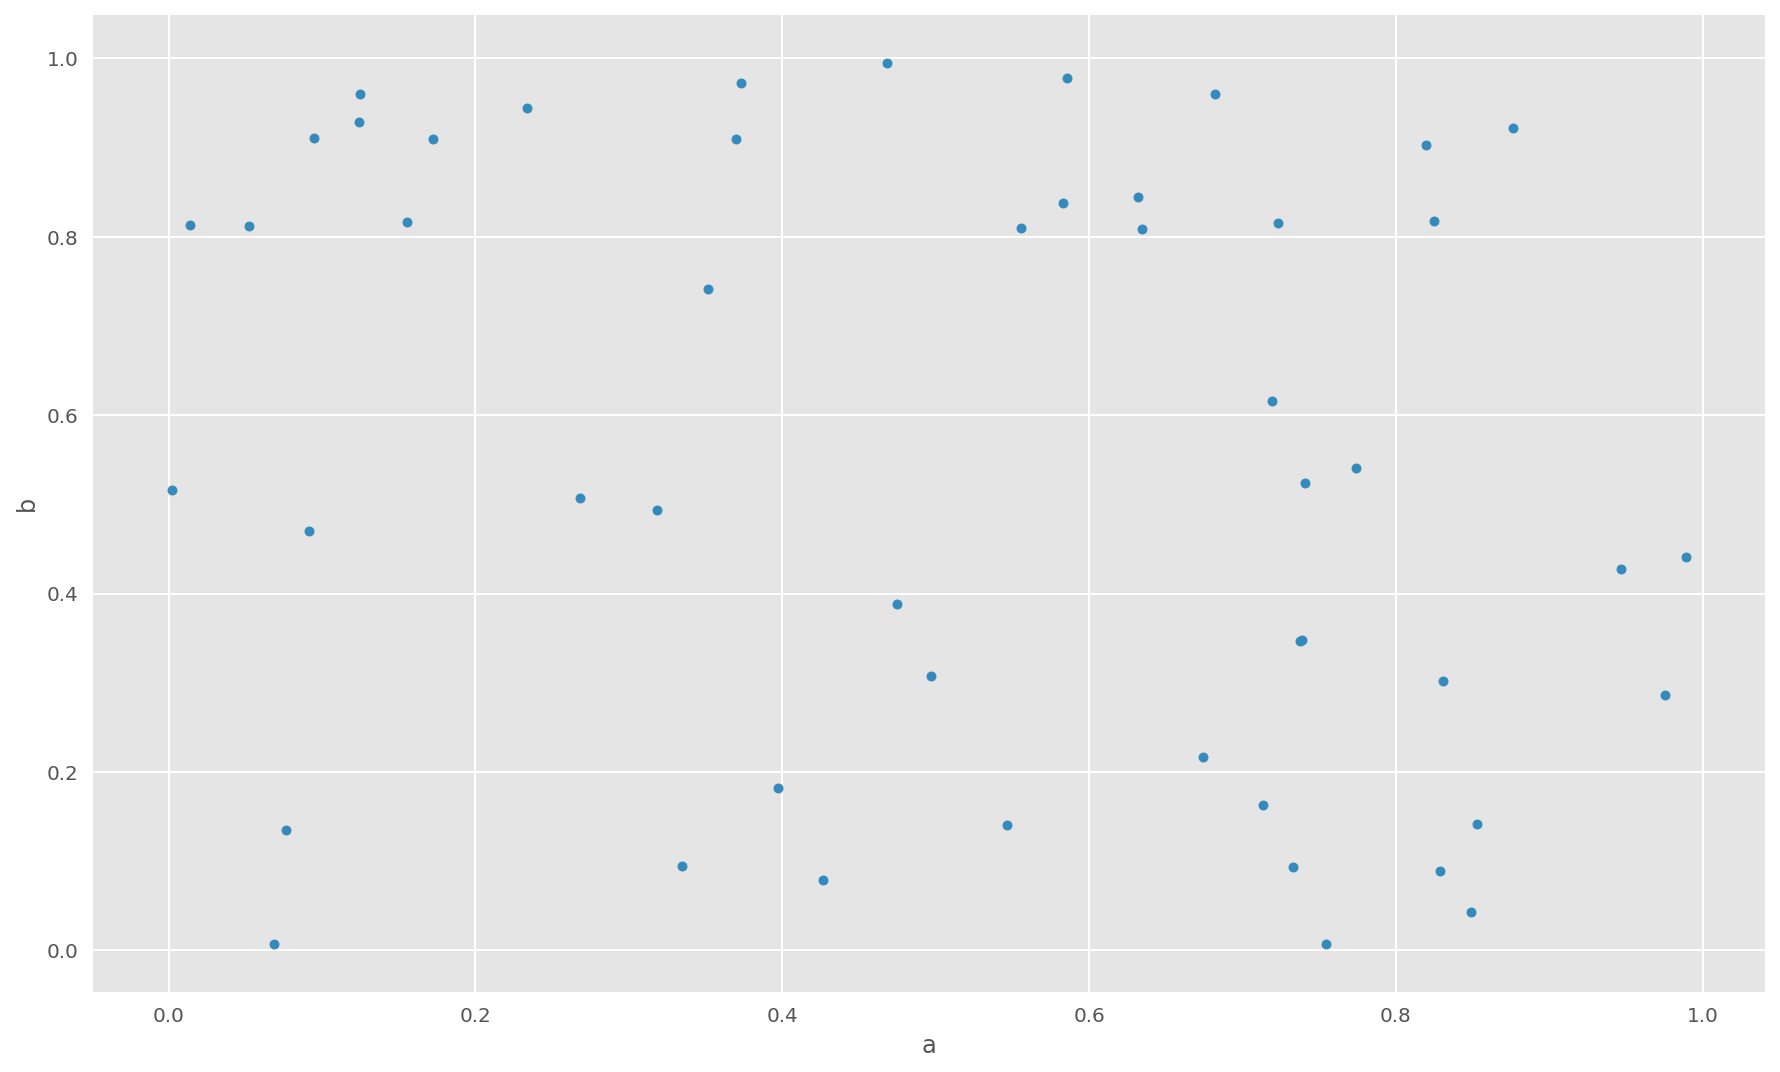

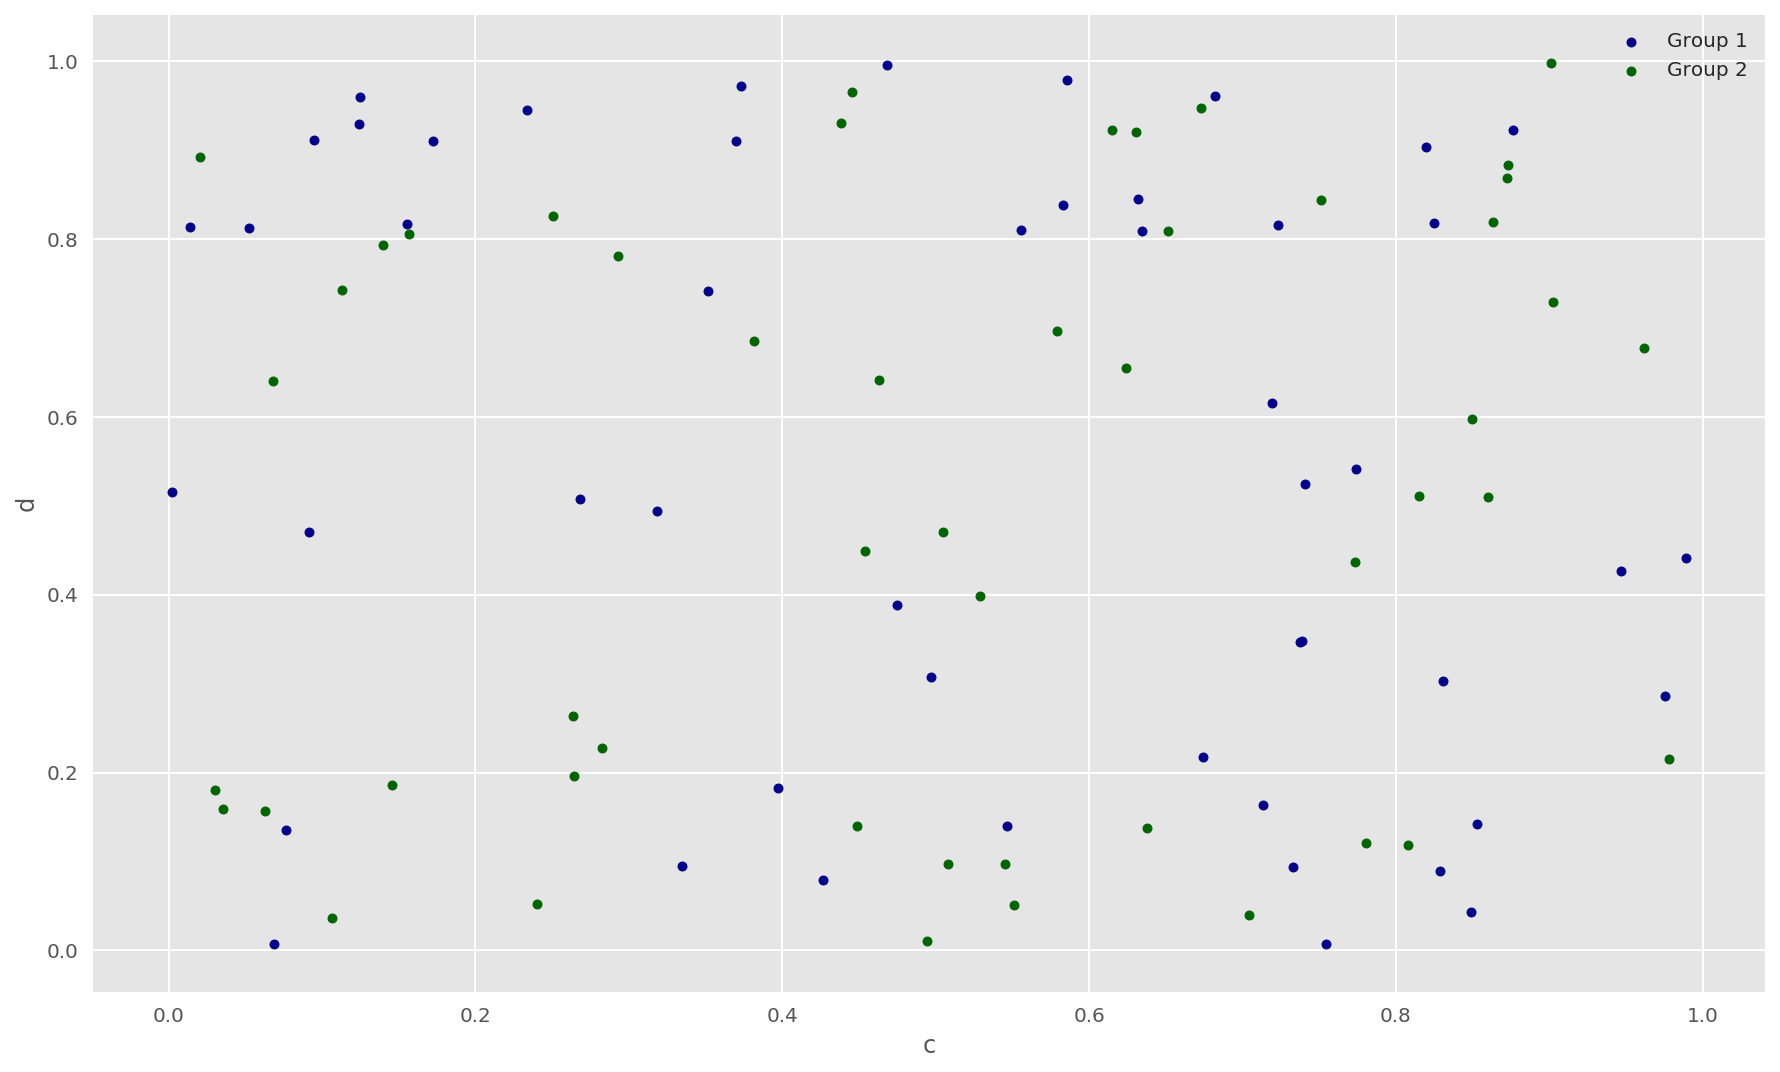

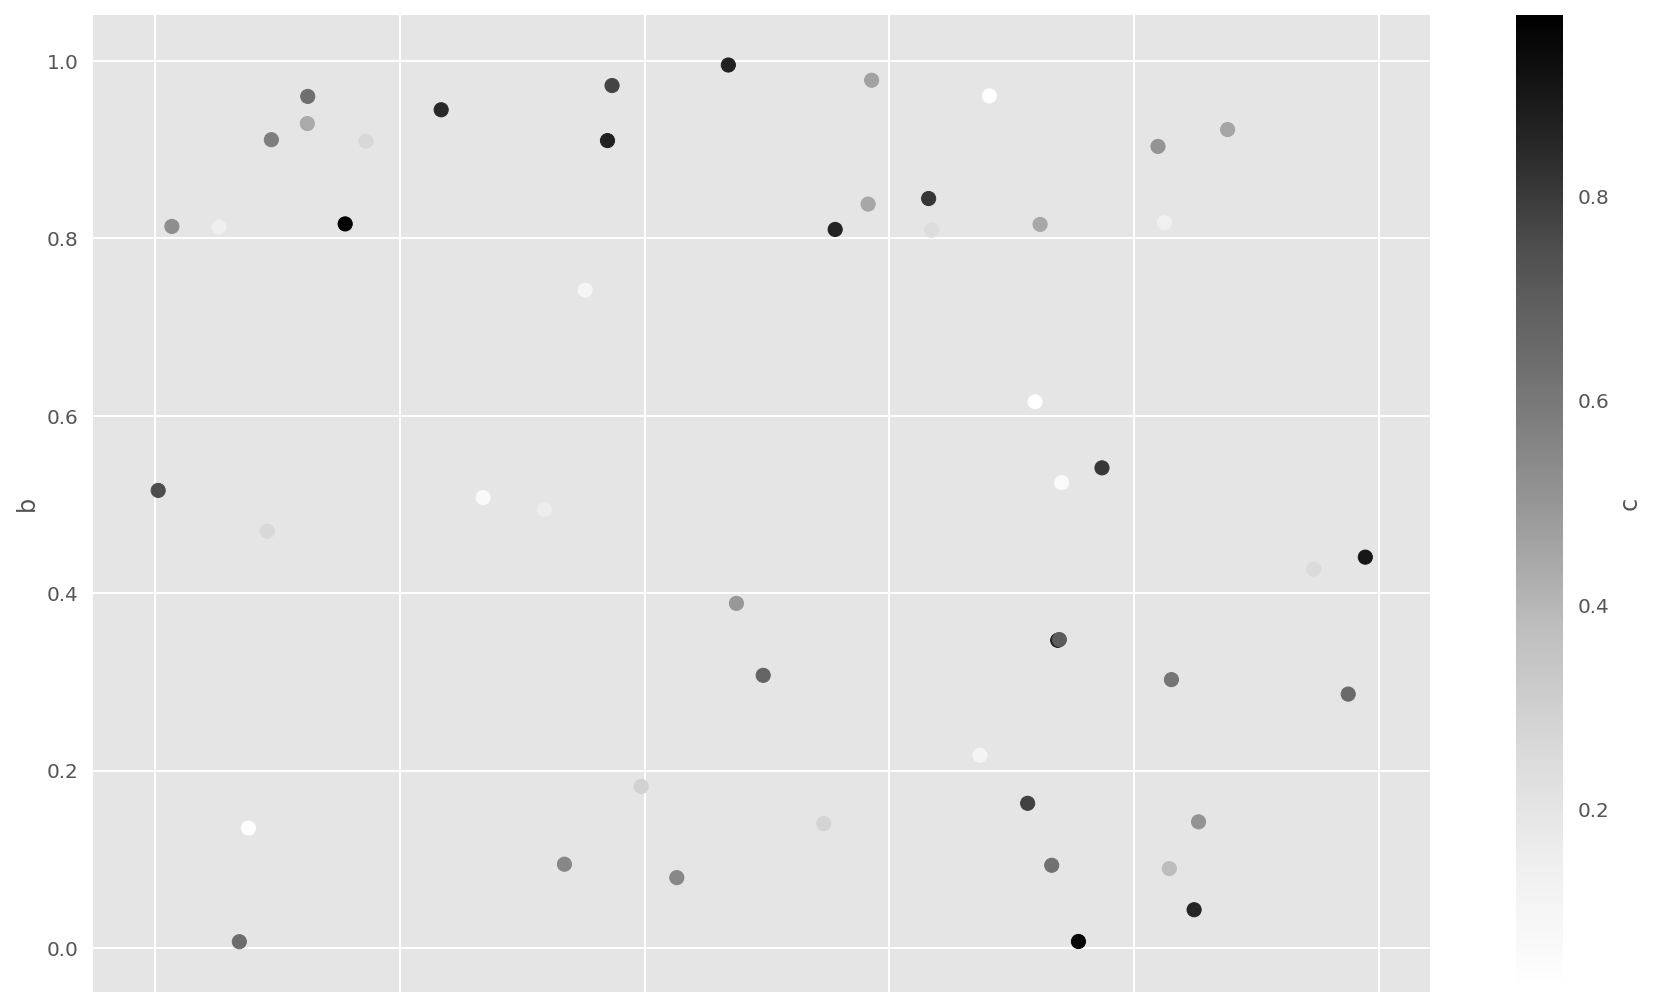

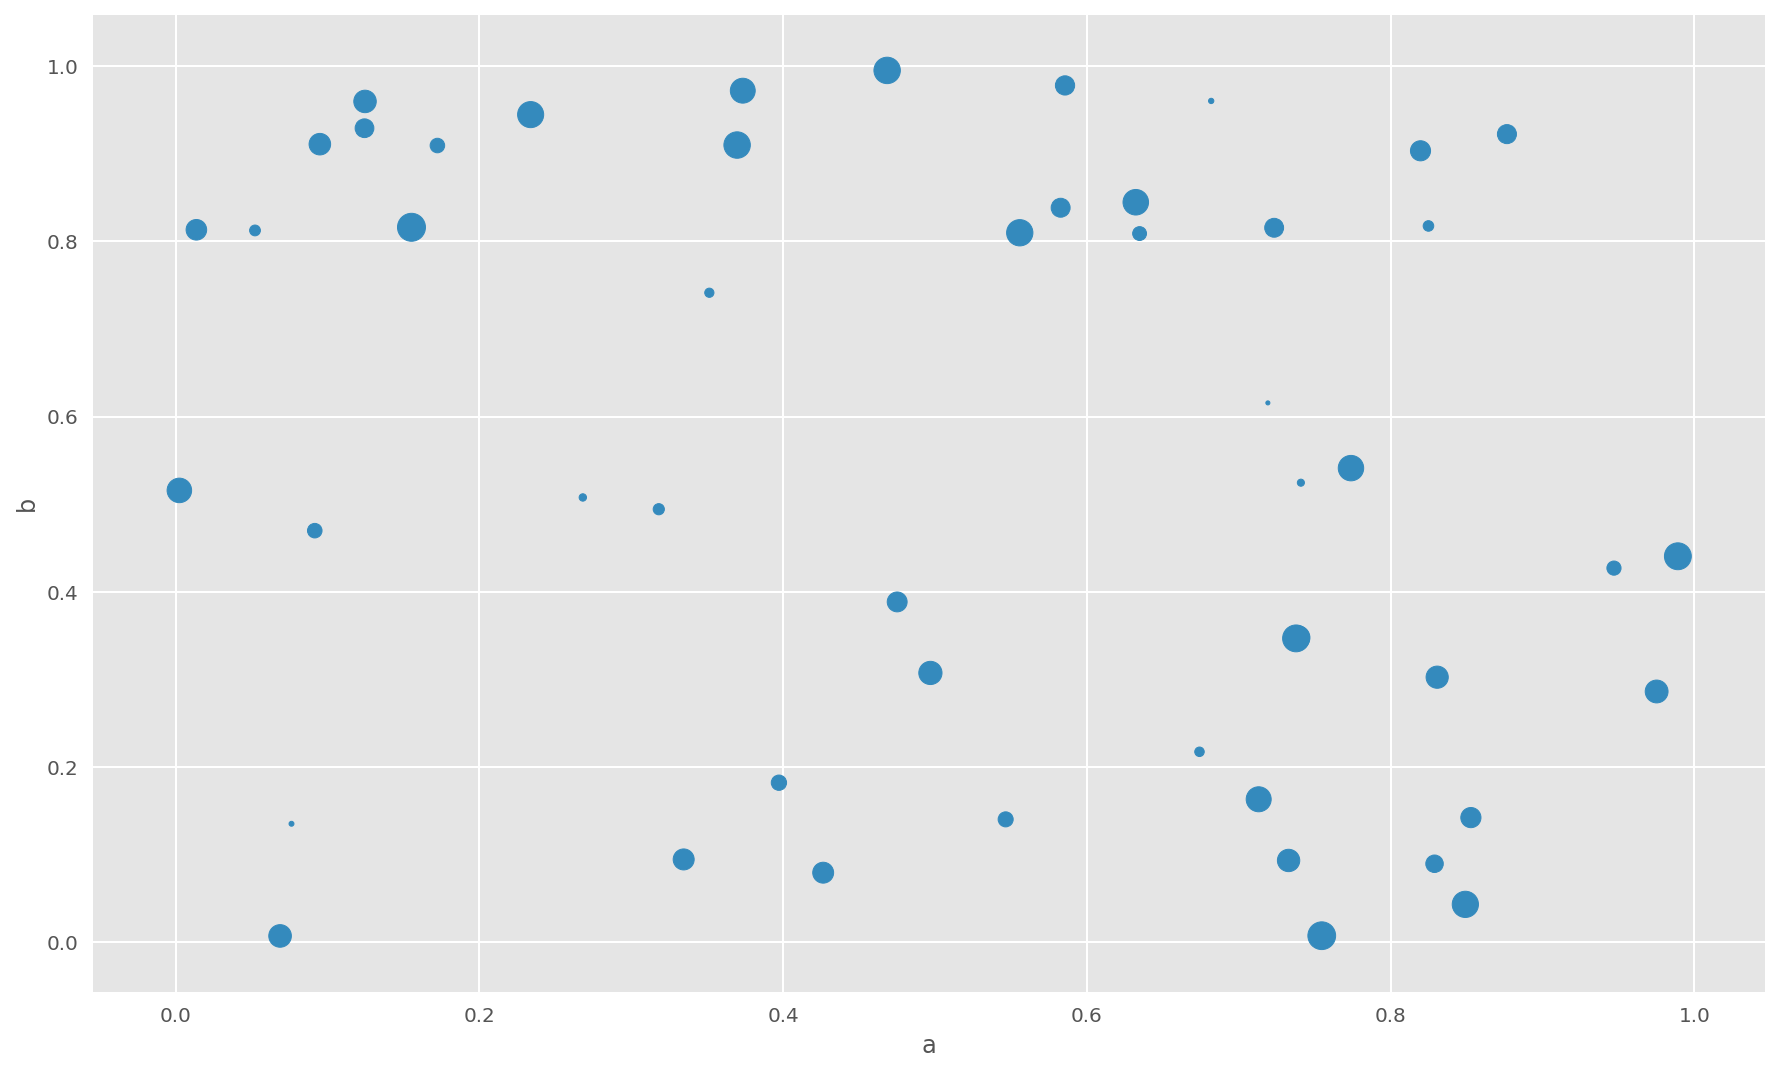

In [117]:
# make scatter plot
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

# scatter plot, color dots by groups
ax = df.plot(kind='scatter', x='a', y='b',
             color='DarkBlue', label='Group 1');
df.plot(kind='scatter', x='c', y='d',
      color='DarkGreen', label='Group 2', ax=ax);

# scatter plot, color and dot size
df.plot(kind='scatter', x='a', y='b', c='c', s=50);

df.plot(kind='scatter', x='a', y='b', s=df['c']*200);

In [121]:
# baseball.hr

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


(100,)

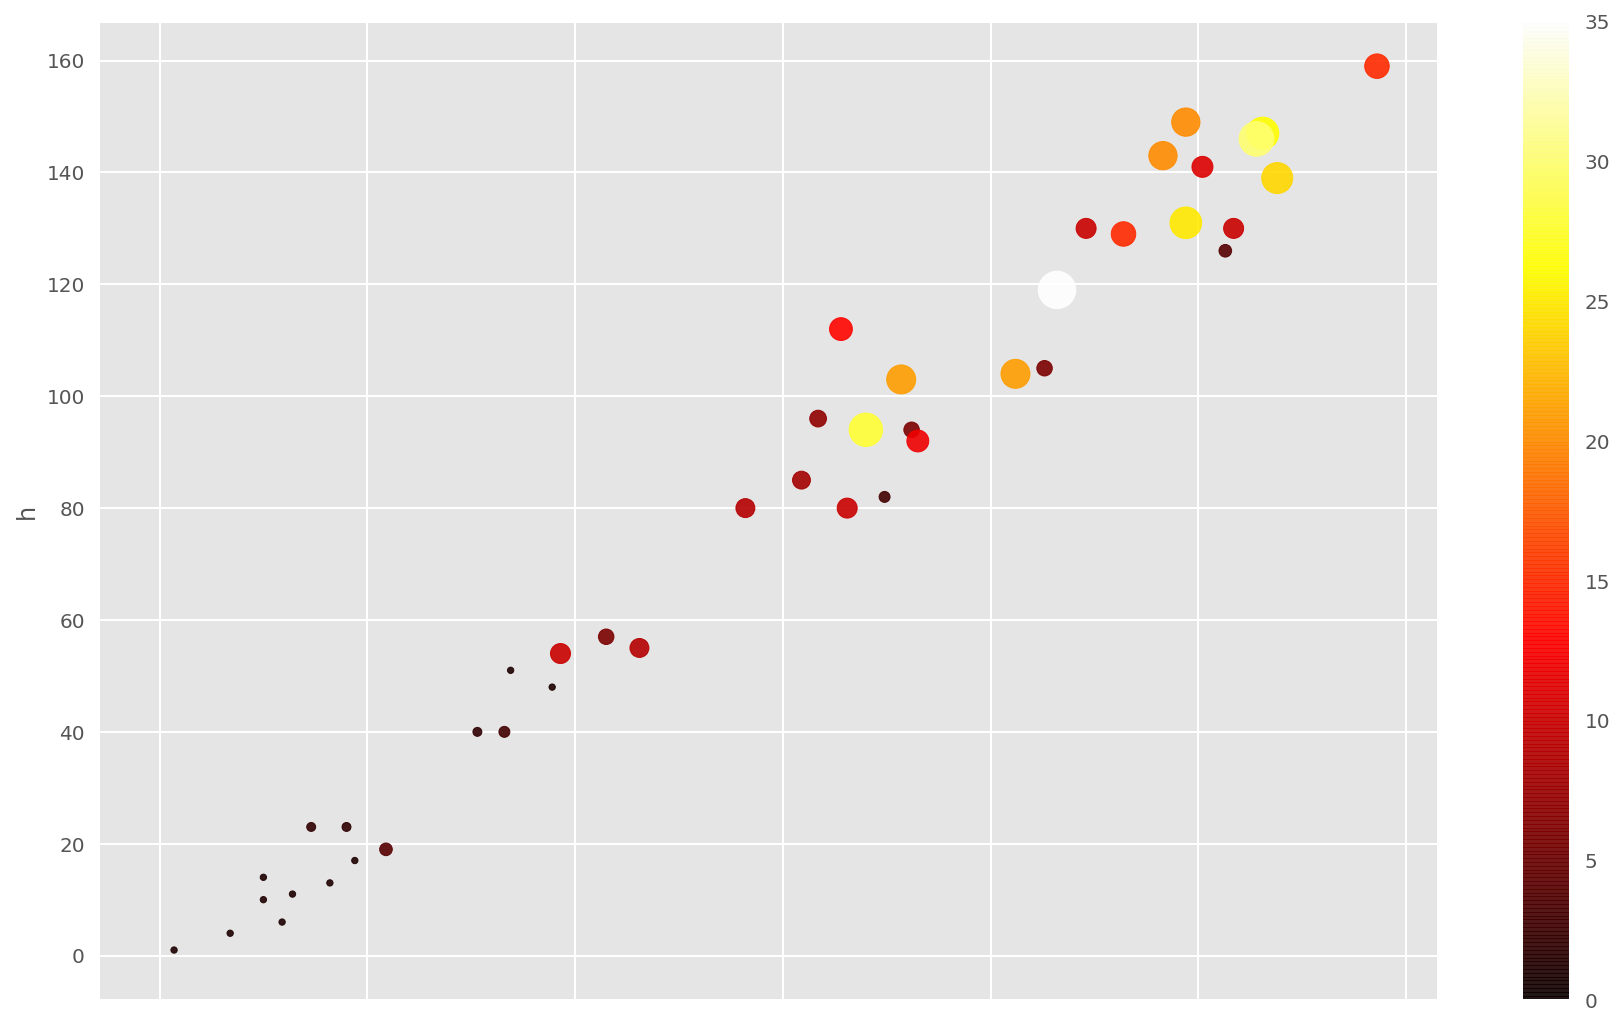

(0, 700)

(0, 200)

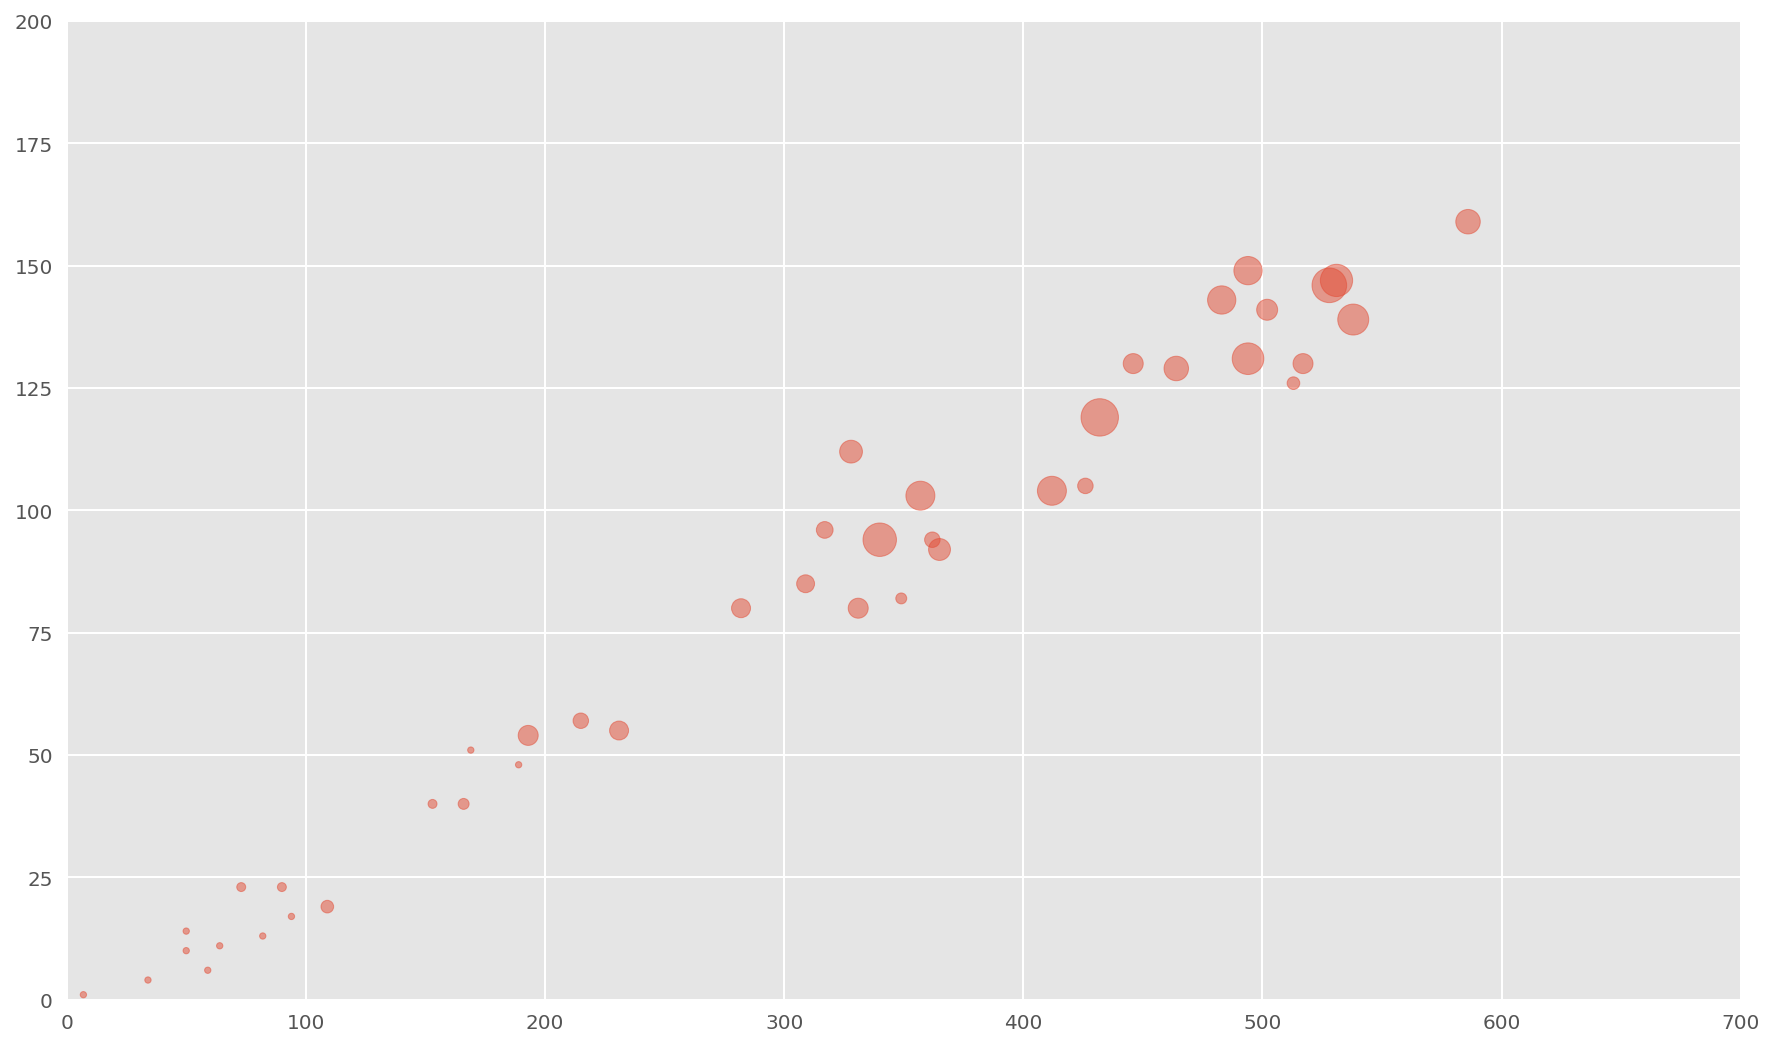

(0, 700)

(0, 200)

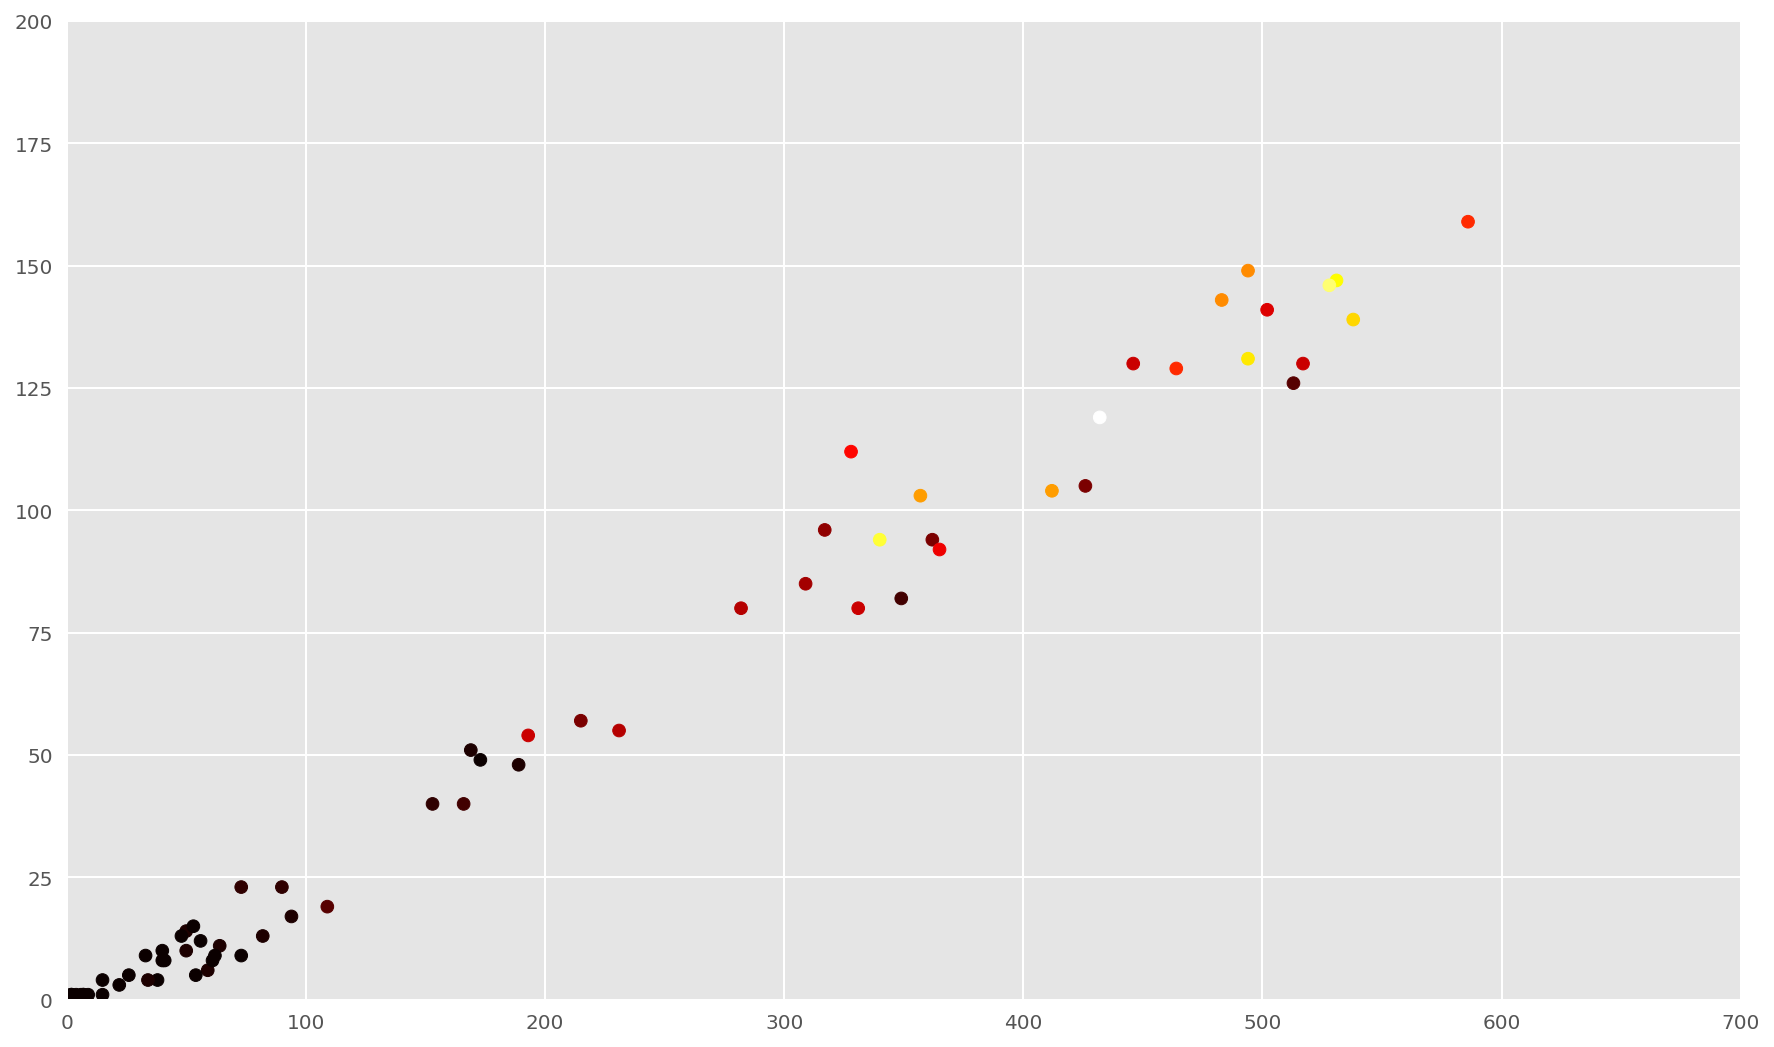

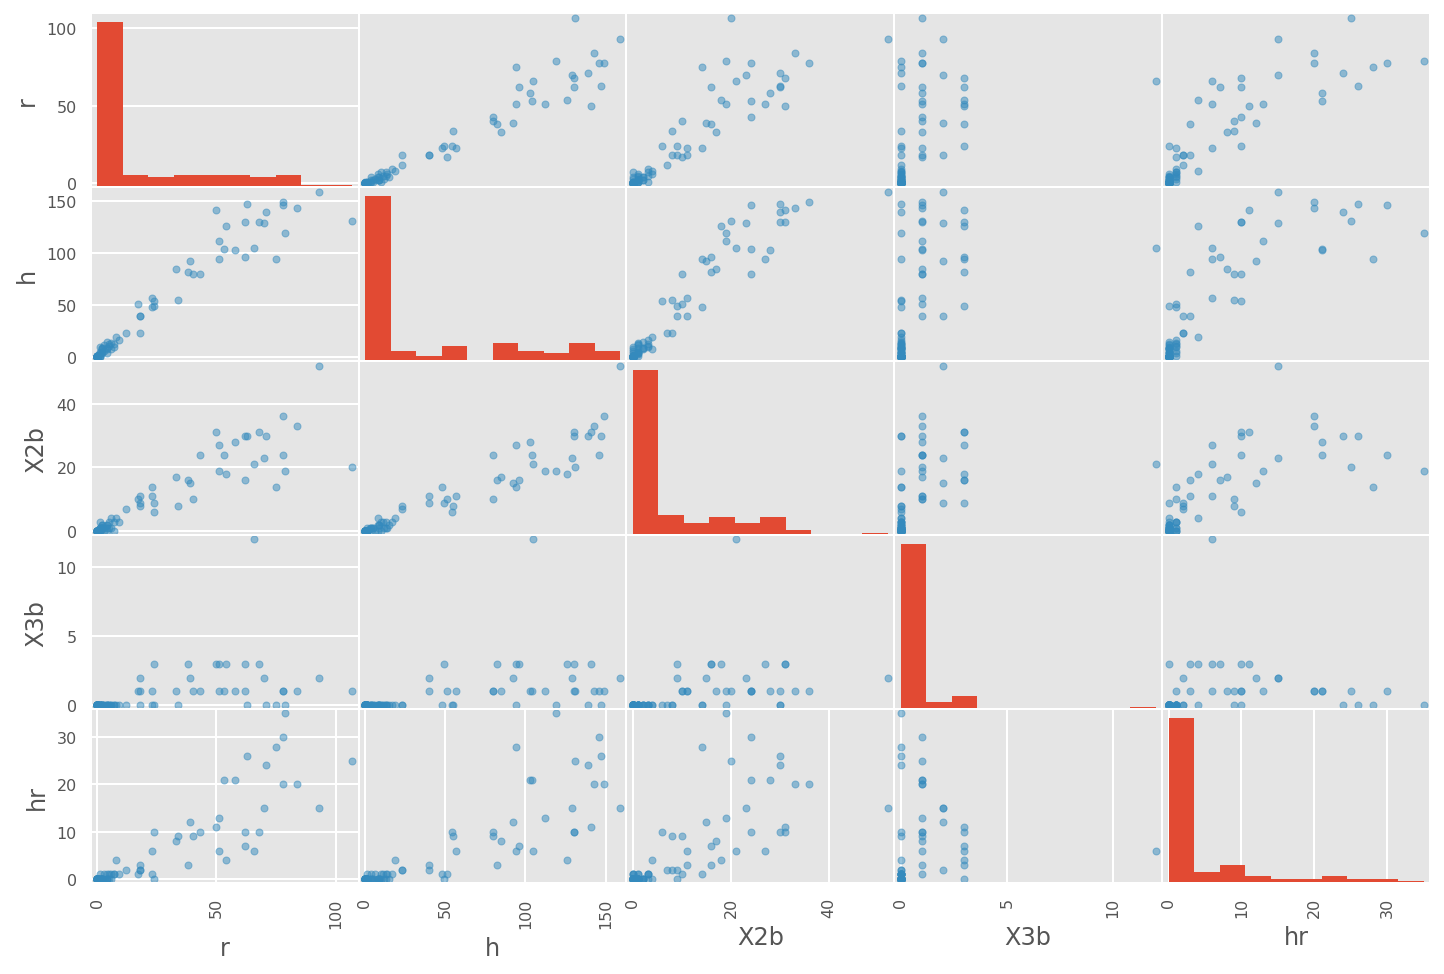

In [119]:
# more scatter plots
baseball = pd.read_csv("/home/szong/projects/development/study/statistical-analysis-python-tutorial-master/data/baseball.csv")
baseball.head()

# baseball.ab.shape
baseball.h.shape

# plt.scatter(baseball.ab, baseball.h)
# plt.xlim(0, 700); plt.ylim(0, 200)
# scatter_matrix(baseball)


# specify x, y with column names, not df.column_name
# s point size, c point color
baseball.plot(kind='scatter', x='ab', y='h',s=baseball.hr*10, c=baseball.hr, cmap='hot', alpha=0.9) 
# baseball.plot(kind='scatter', x=baseball.ab, y=baseball.h) # this does not work
plt.show()

plt.scatter(baseball.ab, baseball.h, s=baseball.hr*10, alpha=0.5)
plt.xlim(0, 700); plt.ylim(0, 200)
plt.show()

plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')
plt.xlim(0, 700); plt.ylim(0, 200);
plt.show()


_ = pd.scatter_matrix(baseball.loc[:,'r':'hr'], figsize=(12,8))
# _ = pd.scatter_matrix(baseball.loc[:,'r':'hr'], figsize=(12,8), diagonal='kde')

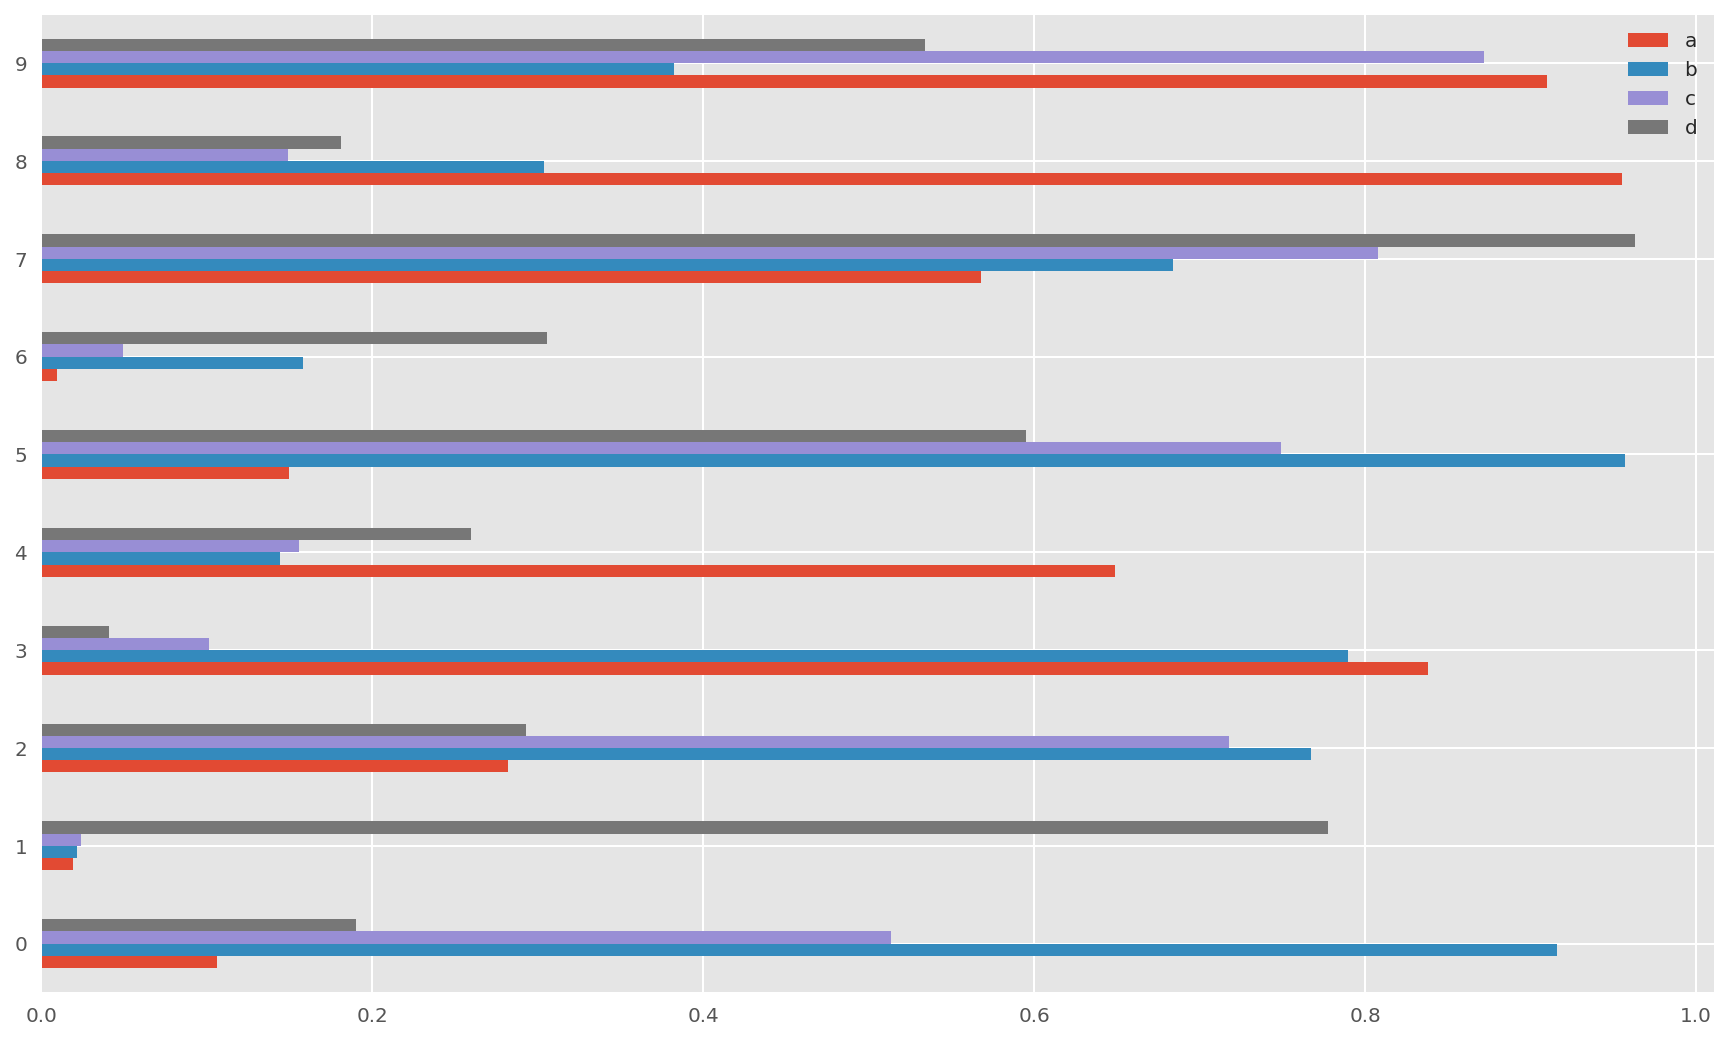

,a,b,c,d
0,0.106339,0.915873,0.513382,0.190492
1,0.019277,0.021653,0.024358,0.777600
2,0.282219,0.767605,0.717601,0.292744
3,0.837834,0.789804,0.101488,0.040929
4,0.648706,0.144420,0.156077,0.259651
5,0.149937,0.957215,0.749131,0.594896
6,0.009831,0.158447,0.049270,0.305686
7,0.568024,0.684196,0.807905,0.963401
8,0.955194,0.303673,0.148954,0.181159
9,0.909956,0.382538,0.871694,0.533821


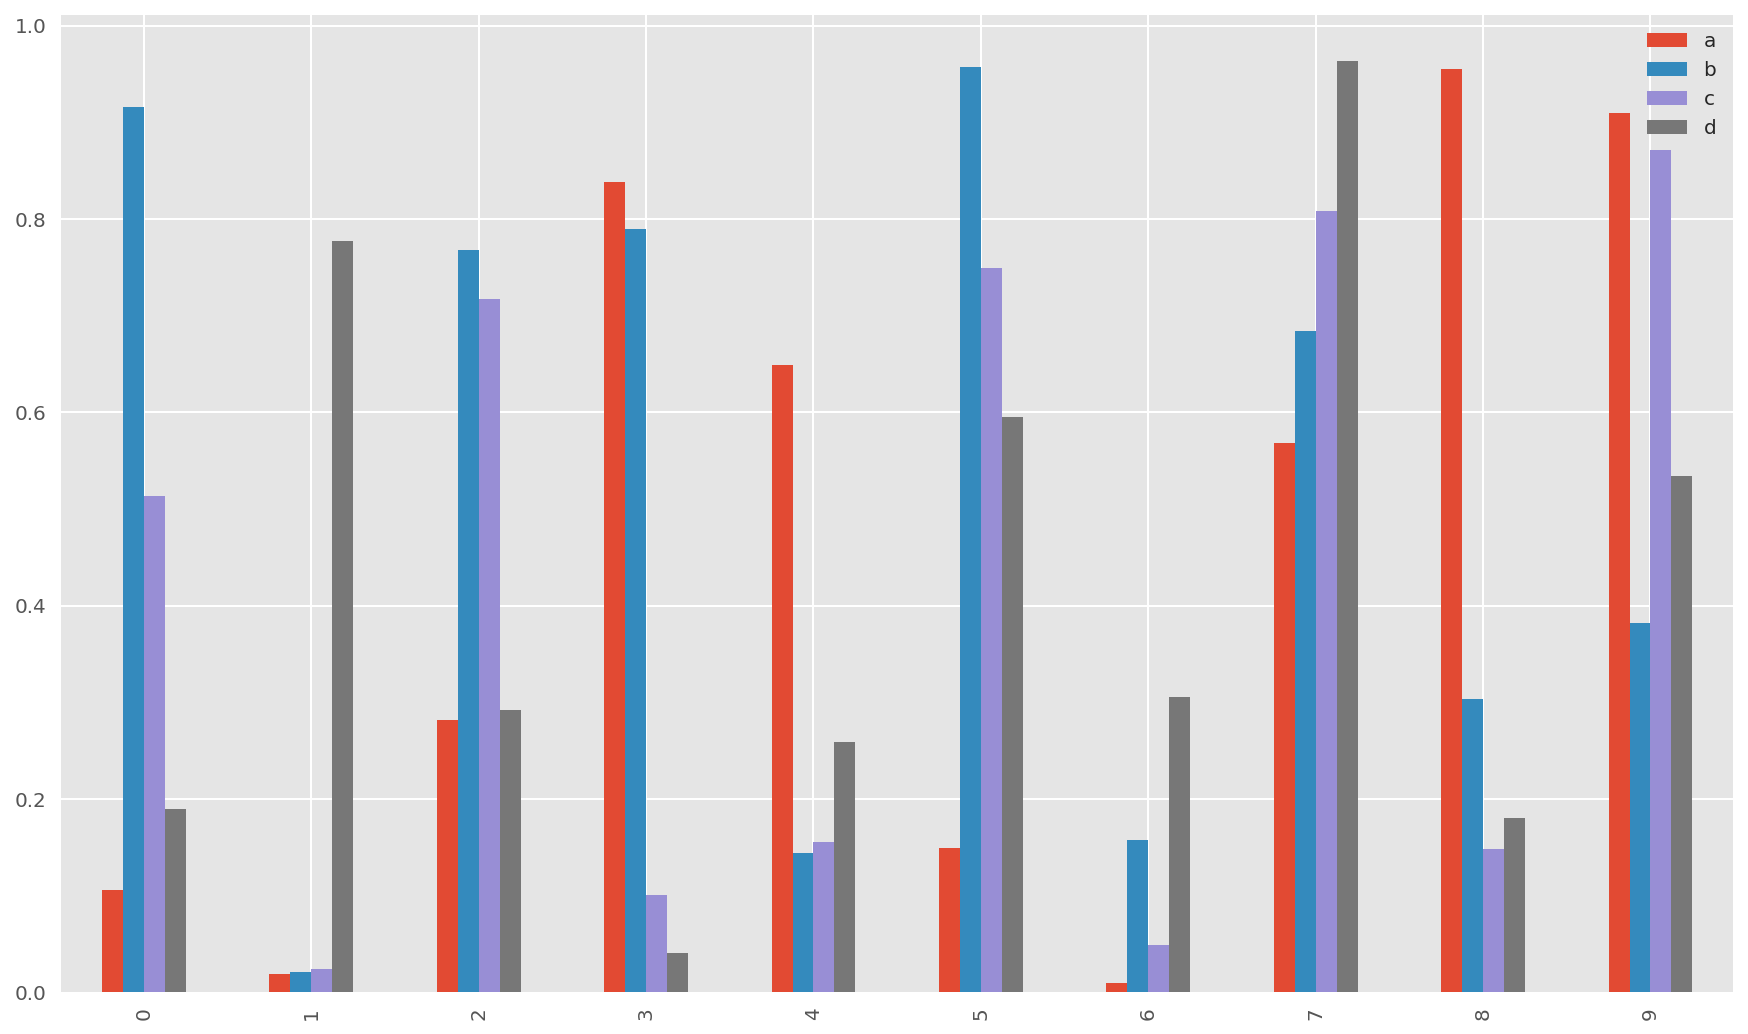

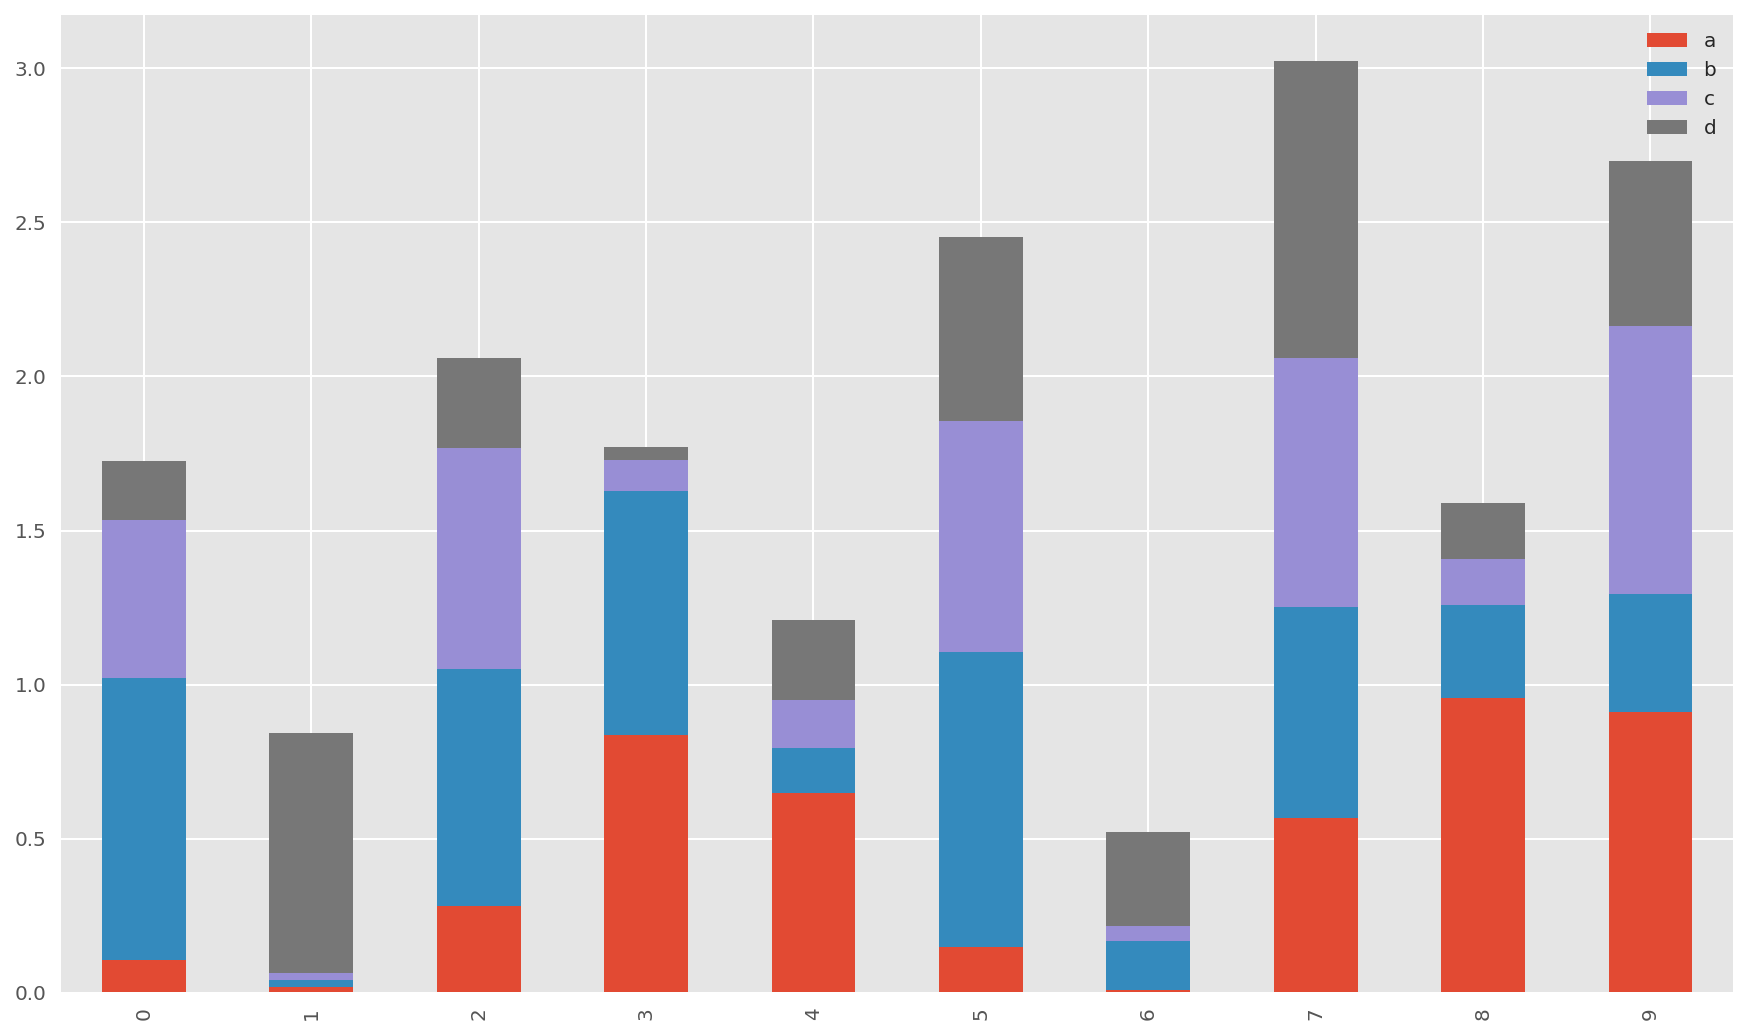

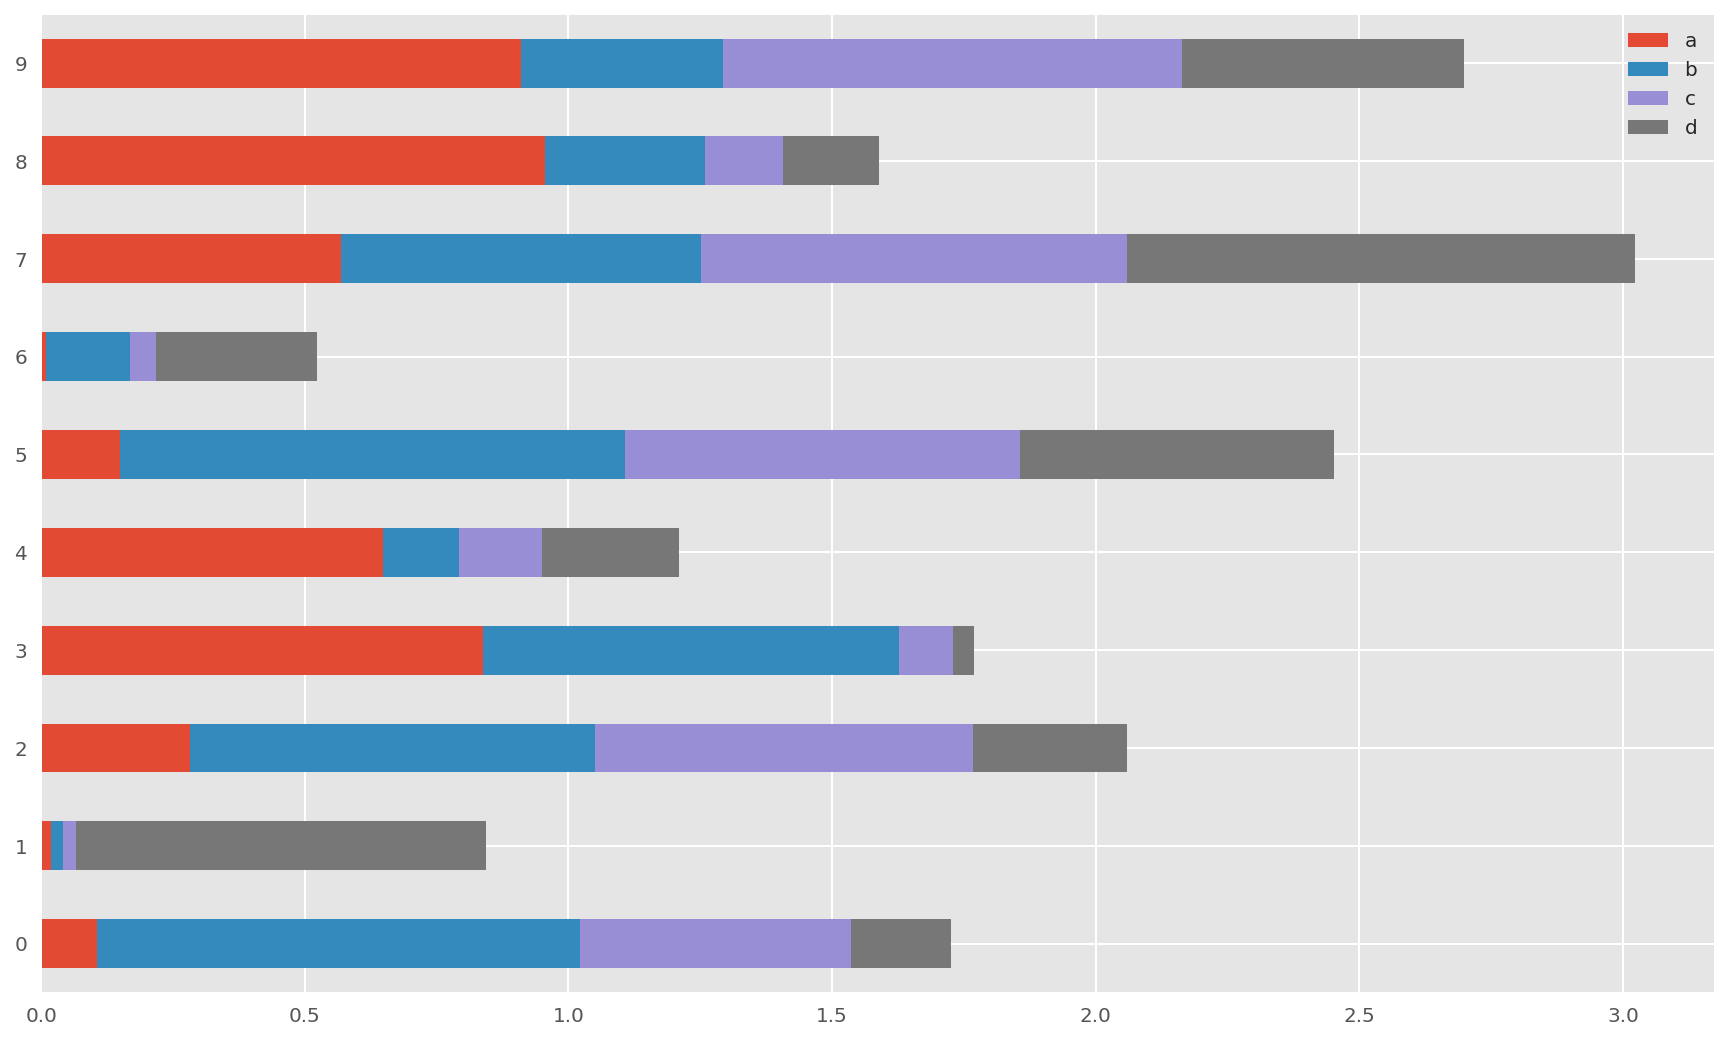

In [122]:
# bar plot, horizontal, vertical, stacked and unstacked bar plot
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot(kind='barh')
plt.show()


df2
df2.plot(kind='bar')
plt.show()

df2.plot(kind='bar', stacked=True);
plt.show()


df2.plot(kind='barh', stacked=True);
plt.show()

<function matplotlib.style.core.use>

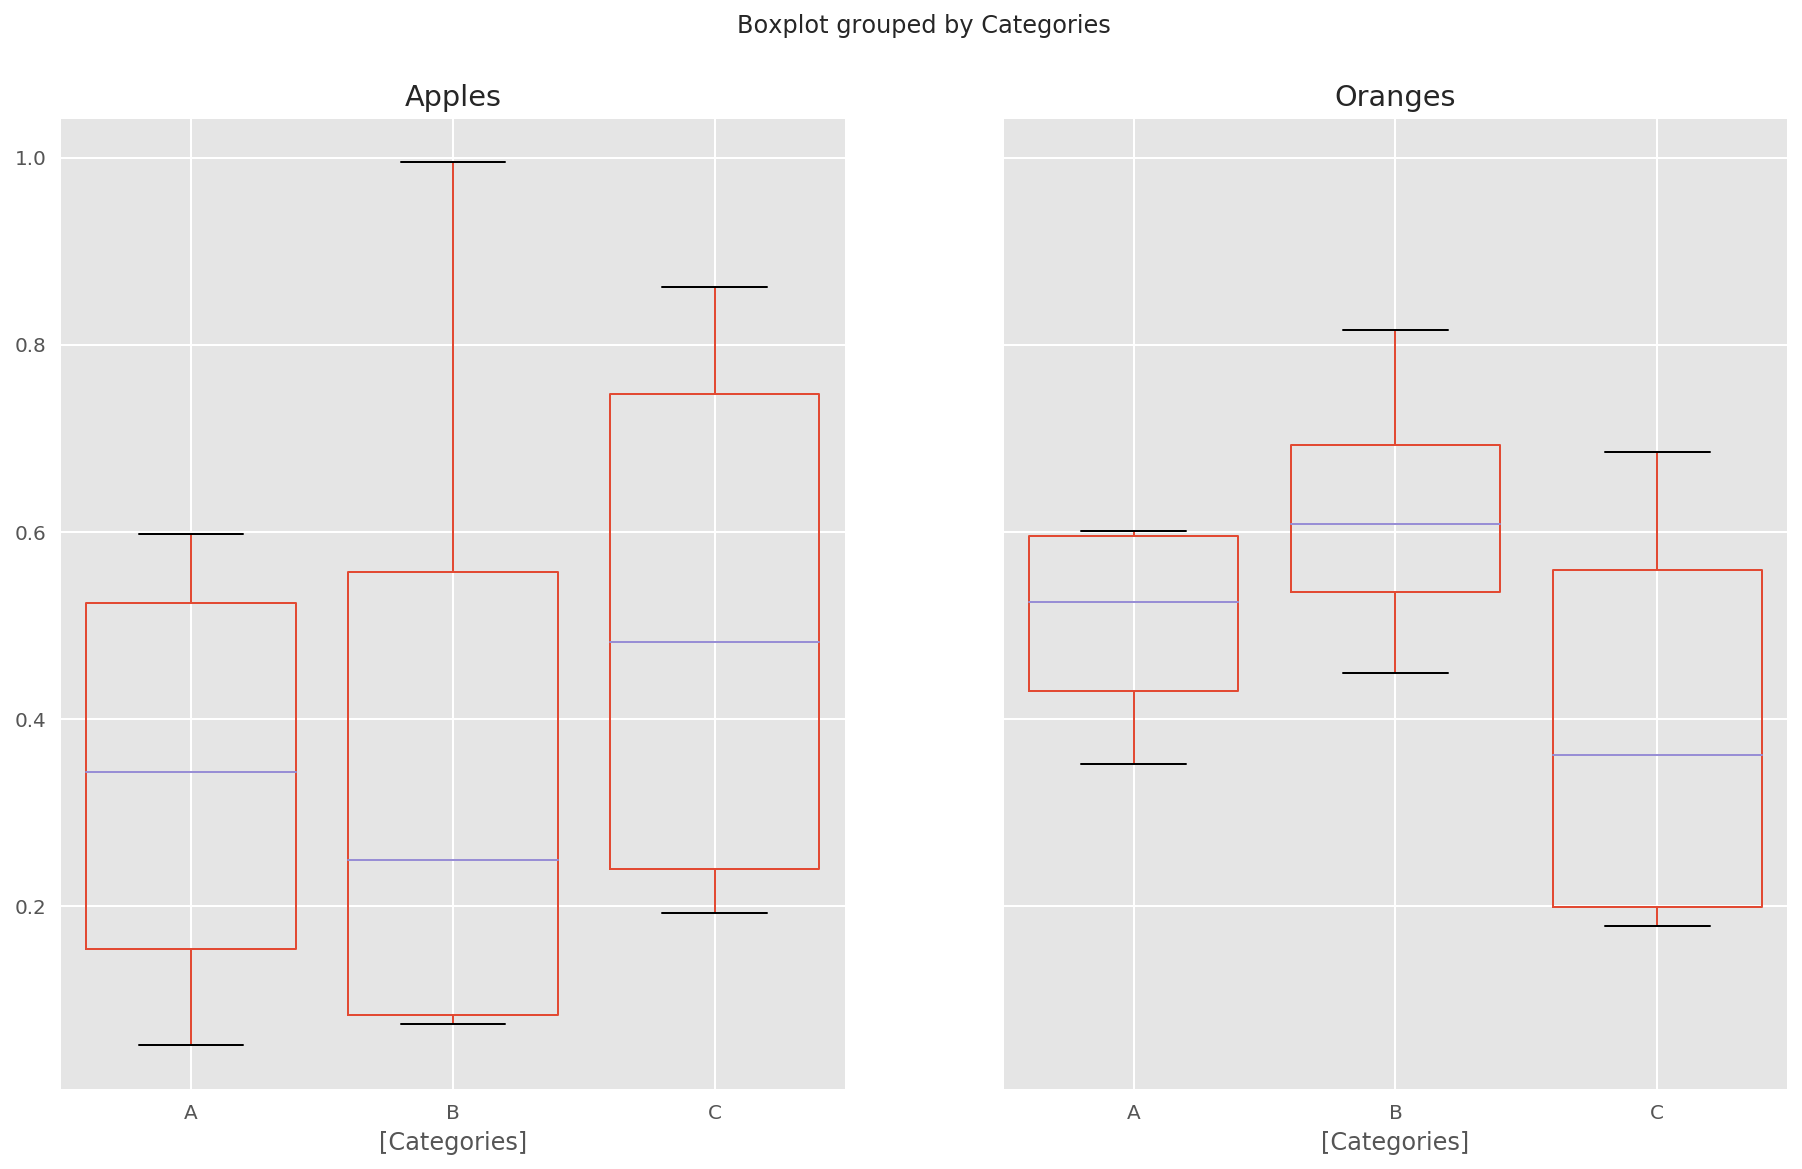

In [114]:
df = pd.DataFrame(np.random.rand(12,2), columns=['Apples', 'Oranges'] )
df['Categories'] = pd.Series(list('AAAABBBBCCCC'))
df
# pd.options.display.mpl_style = 'default'
matplotlib.pyplot.style.use 
_ = df.boxplot(by='Categories', showfliers=False, widths=(0.8,0.5,0.8))

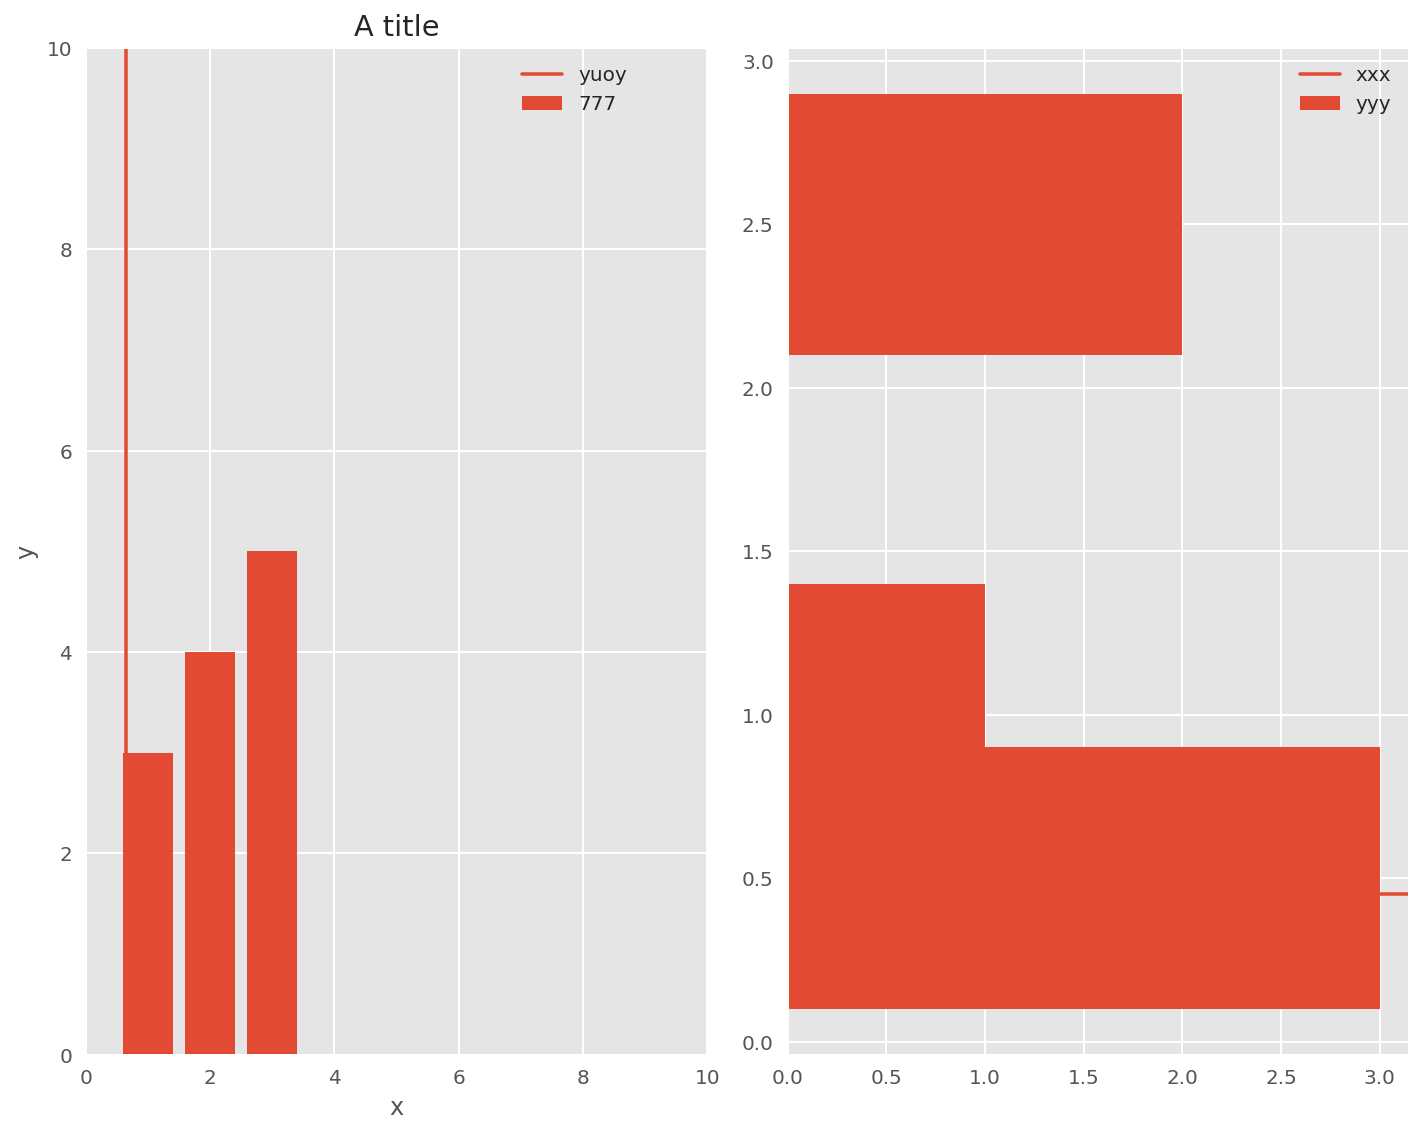

In [118]:
# matplotlib basics

# Import the necessary packages and modules
import matplotlib.pyplot as plt

# Create a Figure
fig = plt.figure(figsize=(10,8))

# Set up Axes
# rows, columns, number of the axes
_ = ax1 = fig.add_subplot(121)
_ = ax2 = fig.add_subplot(122)

# Plot the data
# ax.scatter(x,y)
_ = ax1.bar([1,2,3],[3,4,5])
_ = ax1.axvline(0.65)
_ = ax2.barh([0.5,1,2.5],[3,1,2])
_ = ax2.axhline(0.45)
_ = ax2.legend(labels=['xxx', 'yyy'])

_ = ax1.set(title="A title", xlabel="x", ylabel="y")
_ = ax1.set_xlim(0,10)
_ = ax1.set_ylim(0,10)
# ax1.set_title('abc')
_ = ax1.legend(labels=['yuoy', '777'], bbox_to_anchor=(0.9, 1.0))

plt.tight_layout()

#  Save Figure
plt.savefig("foo.png", dpi=200)

# Show the plot
plt.show()
plt.clf()

# ax.bar() 	Vertical rectangles
# ax.barh() 	Horizontal rectangles
# ax.axhline() 	Horizontal line across axes
# ax.vline() 	Vertical line across axes
# ax.fill() 	Filled polygons
# ax.fill_between() 	Fill between y-values and 0
# ax.stackplot() 	Stack plot
# ax.arrow() 	Arrow
# ax.quiver() 	2D field of arrows
# ax.streamplot() 	2D vector fields
# ax.hist() 	Histogram
# ax.boxplot() 	Boxplot
# ax.violinplot() 	Violinplot
# ax.pcolor() 	Pseudocolor plot
# ax.pcolormesh() 	Pseudocolor plot
# ax.contour() 	Contour plot
# ax.contourf() 	Filled contour plot
# ax.clabel() 	Labeled contour plot

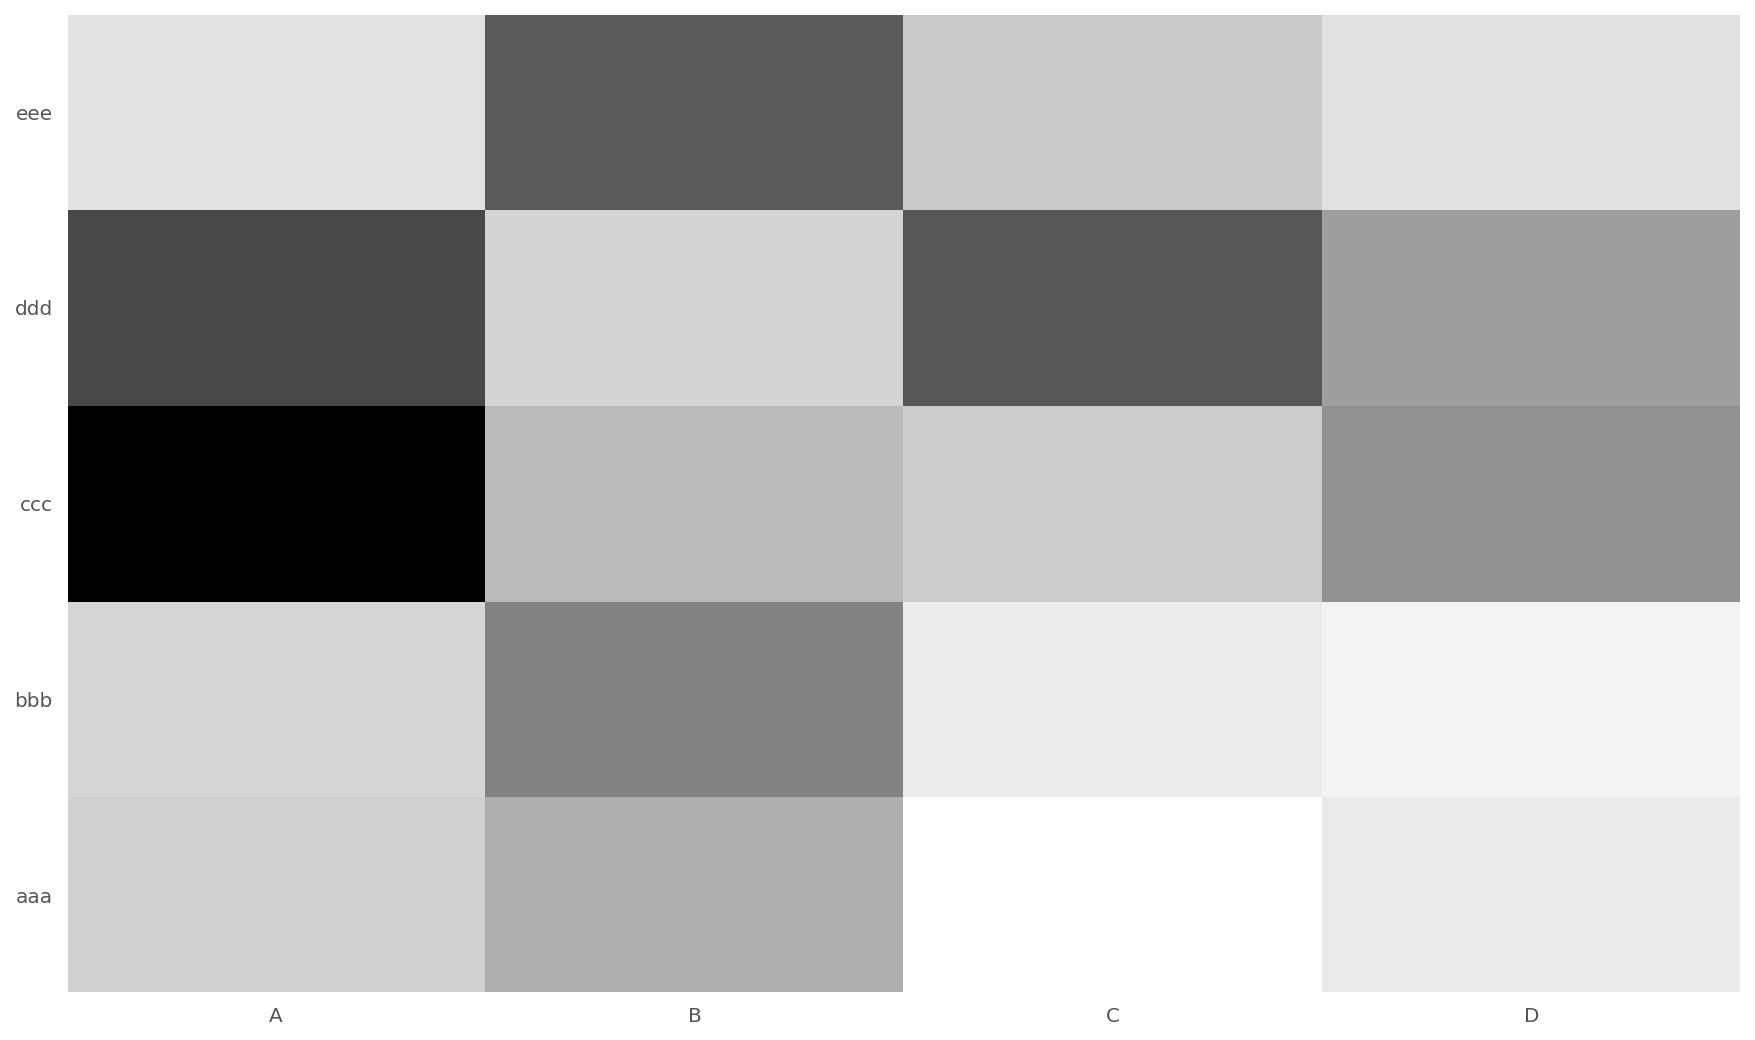

In [112]:
Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = pd.DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

_ = plt.pcolor(df)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

In [113]:
# sort a dictionary based on values
d = {"aa": 3, "bb": 4, "cc": 2, "dd": 1}
s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
s

sorted(d, key=d.get, reverse=True)

[('bb', 4), ('aa', 3), ('cc', 2), ('dd', 1)]

['bb', 'aa', 'cc', 'dd']

In [ ]:
a = '67lk78347834 (())&/&745  '
# substitute not matched to x, equivalent to keep numbers only
result = re.sub('[^0-9]','x', a)
print(result)
result = re.sub('[0-9]','x', a)
print(result)

In [11]:
# Create dataframe
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [13]:
# Create a groupby variable that groups preTestScores by regiment
groupby_regiment = df['preTestScore'].groupby(df['company'])
groupby_regiment

# Use list() to show what a grouping looks like
list(df['preTestScore'].groupby(df['company']))

[('1st', 0     4
  1    24
  4     3
  5     4
  8     2
  9     3
  Name: preTestScore, dtype: int64), ('2nd', 2     31
  3      2
  6     24
  7     31
  10     2
  11     3
  Name: preTestScore, dtype: int64)]

In [14]:
df['preTestScore'].groupby(df['company']).describe()

# Mean of each regiment's preTestScore
# Mean preTestScores grouped by regiment and company
groupby_regiment.mean()

company       
1st      count     6.000000
         mean      6.666667
         std       8.524475
         min       2.000000
         25%       3.000000
         50%       3.500000
         75%       4.000000
         max      24.000000
2nd      count     6.000000
         mean     15.500000
         std      14.652645
         min       2.000000
         25%       2.250000
         50%      13.500000
         75%      29.250000
         max      31.000000
Name: preTestScore, dtype: float64

company
1st     6.666667
2nd    15.500000
Name: preTestScore, dtype: float64

In [15]:
# Mean preTestScores grouped by regiment and company without heirarchical indexing
df['preTestScore'].groupby([df['regiment'], df['company']]).mean().unstack()

company,1st,2nd
regiment,,
Dragoons,3.5,27.5
Nighthawks,14.0,16.5
Scouts,2.5,2.5


In [16]:
# Group the entire dataframe by regiment and company
df.groupby(['regiment', 'company']).mean().unstack()

preTestScore       postTestScore      
company             1st   2nd           1st   2nd
regiment                                         
Dragoons            3.5  27.5          47.5  75.5
Nighthawks         14.0  16.5          59.5  59.5
Scouts              2.5   2.5          66.0  66.0

In [19]:
# Number of observations in each regiment and company
df.groupby(['regiment', 'company']).size().unstack()

company,1st,2nd
regiment,,
Dragoons,2,2
Nighthawks,2,2
Scouts,2,2


Summing up, apply works on a row / column basis of a DataFrame, applymap works element-wise on a DataFrame, and map works element-wise on a Series.

# use set colors for imshow

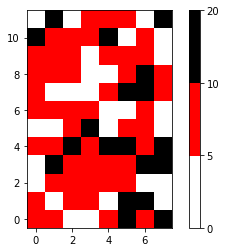

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

np.random.seed(101)
zvals = np.random.rand(12, 8) * 10
zvals = zvals + 2.5

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'red', 'black'])
bounds=[0,5,10, 20]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
img = plt.imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

# make a color bar
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 5, 10, 20])

plt.savefig('redwhite.png')
plt.show()

In [3]:
zvals

array([[ 5.16398628,  5.70667587,  0.28474226,  1.71521656,  6.85276982,
         8.33896863,  3.0696622 ,  8.9361308 ],
       [ 7.21543862,  1.89938954,  5.54227591,  3.52131954,  1.81892403,
         7.85601762,  9.65483222,  2.32353662],
       [ 0.83561434,  6.03548422,  7.28992757,  2.76238828,  6.85306329,
         5.17867474,  0.48484537,  1.37869238],
       [ 1.86967426,  9.94317901,  5.20665397,  5.78789535,  7.34819058,
         5.41961772,  9.13153558,  8.07920151],
       [ 4.02997831,  3.57224343,  9.52876715,  3.43631578,  8.65099816,
         8.30277712,  5.38161449,  9.22469373],
       [ 0.9714648 ,  1.02847493,  7.01507296,  8.90479869,  1.59560301,
         2.75572545,  6.7249153 ,  1.64303124],
       [ 7.01371137,  4.87635222,  6.80677768,  5.21548192,  0.43396694,
         2.23936604,  5.75205087,  1.2043366 ],
       [ 5.00116714,  1.38009568,  0.52808401,  1.78276923,  4.42368132,
         8.77587325,  9.49264129,  4.78167417],
       [ 4.61119342,  6.37289031

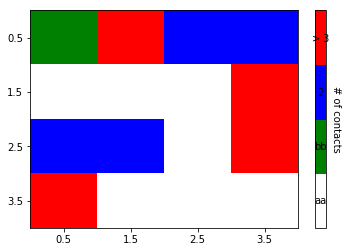

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

#discrete color scheme
cMap = ListedColormap(['white', 'green', 'blue','red'])

#data
np.random.seed(42)
data = np.random.rand(4, 4)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=cMap)

#legend
cbar = plt.colorbar(heatmap)

cbar.ax.get_yaxis().set_ticks([])
# for j, lab in enumerate(['$0$','$1$','$2$','$>3$']):
for j, lab in enumerate(['aa','bb','$2$','$>3$']):
    cbar.ax.text(.5, (2 * j + 1) / 8.0, lab, ha='center', va='center')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('# of contacts', rotation=270)


# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()

# #lebels
# column_labels = list('ABCD')
# row_labels = list('WXYZ')
# ax.set_xticklabels(column_labels, minor=False)
# ax.set_yticklabels(row_labels, minor=False)

plt.show()

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


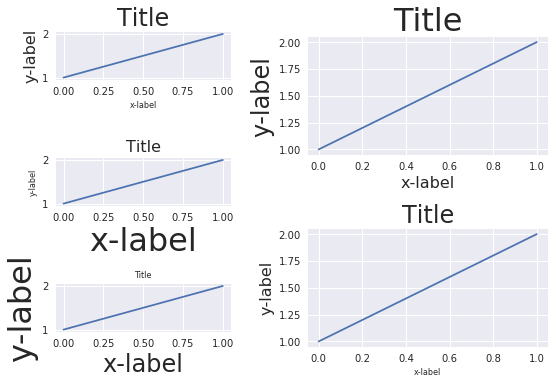

In [8]:
import matplotlib.pyplot as plt
import itertools
import warnings


fontsizes = itertools.cycle([8, 16, 24, 32])


def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=next(fontsizes))
    ax.set_ylabel('y-label', fontsize=next(fontsizes))
    ax.set_title('Title', fontsize=next(fontsizes))



# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# example_plot(ax1)
# example_plot(ax2)
# example_plot(ax3)
# example_plot(ax4)
# plt.tight_layout()



# fig, axes = plt.subplots(nrows=3, ncols=3)
# for row in axes:
#     for ax in row:
#         example_plot(ax)
# plt.tight_layout()


# fig = plt.figure()
# ax1 = plt.subplot(221)
# ax2 = plt.subplot(223)
# ax3 = plt.subplot(122)

# example_plot(ax1)
# example_plot(ax2)
# example_plot(ax3)

# plt.tight_layout()


# fig = plt.figure()

# ax1 = plt.subplot2grid((3, 3), (0, 0))
# ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
# ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
# ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

# example_plot(ax1)
# example_plot(ax2)
# example_plot(ax3)
# example_plot(ax4)

# plt.tight_layout()

# plt.show()


fig = plt.figure()

import matplotlib.gridspec as gridspec

gs1 = gridspec.GridSpec(3, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    # This raises warnings since tight layout cannot
    # handle gridspec automatically. We are going to
    # do that manually so we can filter the warning.
    gs1.tight_layout(fig, rect=[None, None, 0.45, None])

gs2 = gridspec.GridSpec(2, 1)
ax4 = fig.add_subplot(gs2[0])
ax5 = fig.add_subplot(gs2[1])

example_plot(ax4)
example_plot(ax5)

with warnings.catch_warnings():
    # This raises warnings since tight layout cannot
    # handle gridspec automatically. We are going to
    # do that manually so we can filter the warning.
    warnings.simplefilter("ignore", UserWarning)
    gs2.tight_layout(fig, rect=[0.45, None, None, None])

# # now match the top and bottom of two gridspecs.
# top = min(gs1.top, gs2.top)
# bottom = max(gs1.bottom, gs2.bottom)

# gs1.update(top=top, bottom=bottom)
# gs2.update(top=top, bottom=bottom)

plt.show()

In [88]:
gs2.tight_layout?

In [4]:
np.arange(2,20,3)

array([ 2,  5,  8, 11, 14, 17])

# group and aggregate examples

In [41]:
df = pd.DataFrame({'name':['Tom','Tom','Tom','Bill','Smith'],
                   'school':['capitol','capitol','sperling','inman','uhill'],
                   'age':[7,21,8,9,10],
                   'height':[1,11,3,5,7],
                   'weight':[5,31,3,6,8],
                   'hobby':['football', 'soccer', 'badminton', 'dance', 'tumbling']})

index_col = ['name', 'school']
print (df)
df_out = df.groupby(index_col)\
           .agg({'age':'mean', 'height':sum, 'weight':max, 'hobby':','.join})#[['age','height','weight']]
print (df_out)

   age  height      hobby   name    school  weight
0    7       1   football    Tom   capitol       5
1   21      11     soccer    Tom   capitol      31
2    8       3  badminton    Tom  sperling       3
3    9       5      dance   Bill     inman       6
4   10       7   tumbling  Smith     uhill       8
                age  height  weight            hobby
name  school                                        
Bill  inman       9       5       6            dance
Smith uhill      10       7       8         tumbling
Tom   capitol    14      12      31  football,soccer
      sperling    8       3       3        badminton


In [120]:
import pandas as pd
import collections

In [46]:
# import pandas as pd
# df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=True")
# df["date"] = pd.to_datetime(df['date'])
# df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [47]:
df.to_csv('example_data.txt', index=False)

In [51]:
f = 'example_data.txt'
df = pd.read_csv(f)
df.head(2)
df["date"] = pd.to_datetime(df['date'])
df.dtypes
df.head(2)

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47


In [49]:
# df = df.set_index('date')
# df.head(2)

,account number,name,sku,quantity,unit price,ext price
date,,,,,,
2014-01-01 07:21:51,740150,Barton LLC,B1-20000,39,86.69,3380.91
2014-01-01 10:00:47,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16


In [52]:
df.set_index('date').resample('Q')["ext price"].sum() # Q quarter, M month etc

date
2014-03-31    535494.66
2014-06-30    514081.99
2014-09-30    513883.87
2014-12-31    455323.80
Freq: Q-DEC, Name: ext price, dtype: float64

In [53]:
df.set_index('date').groupby('name')["ext price"].resample("M").sum().head(2)

name        date      
Barton LLC  2014-01-31     6177.57
            2014-02-28    12218.03
Name: ext price, dtype: float64

In [54]:
df.groupby(['name', pd.Grouper(key='date', freq='M')])['ext price'].sum().head(2)

name        date      
Barton LLC  2014-01-31     6177.57
            2014-02-28    12218.03
Name: ext price, dtype: float64

In [55]:
df.groupby(['name', pd.Grouper(key='date', freq='A-DEC')])['ext price'].sum().head(2)

name                             date      
Barton LLC                       2014-12-31    109438.50
Cronin, Oberbrunner and Spencer  2014-12-31     89734.55
Name: ext price, dtype: float64

In [70]:
df.groupby(['name', pd.Grouper(key='date', freq='W-MON')])['ext price'].sum().head(2)

name        date      
Barton LLC  2014-01-06    3380.91
            2014-01-20     224.86
Name: ext price, dtype: float64

In [57]:
df.head(2)

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47


In [56]:
df[["ext price", "quantity", "unit price"]].agg(['sum', 'mean'])

,ext price,quantity,unit price
sum,2.018784e+06,36463.000000,82511.290000
mean,1.345856e+03,24.308667,55.007527


In [74]:
df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean']})

,ext price,quantity,unit price
mean,1.345856e+03,24.308667,55.007527
sum,2.018784e+06,36463.000000,NaN


In [75]:
get_max = lambda x: x.value_counts(dropna=False).index[0]

In [84]:
df['sku'].value_counts(dropna=False).index[0]

'S2-77896'

In [76]:
df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})

,ext price,quantity,unit price,sku
<lambda>,NaN,NaN,NaN,S2-77896
mean,1.345856e+03,24.308667,55.007527,NaN
sum,2.018784e+06,36463.000000,NaN,NaN


In [77]:
get_max.__name__ = "most frequent"

In [78]:
df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})

,ext price,quantity,unit price,sku
mean,1.345856e+03,24.308667,55.007527,NaN
most frequent,NaN,NaN,NaN,S2-77896
sum,2.018784e+06,36463.000000,NaN,NaN


In [98]:
f = collections.OrderedDict([('quantity', ['sum', 'mean']), ('ext price', ['sum', 'mean']),  ('sku', [get_max])])

In [99]:
f

OrderedDict([('quantity', ['sum', 'mean']),
             ('ext price', ['sum', 'mean']),
             ('sku', [<function __main__.<lambda>>])])

In [100]:
df.agg(f)

,quantity,ext price,sku
mean,24.308667,1.345856e+03,NaN
most frequent,NaN,NaN,S2-77896
sum,36463.000000,2.018784e+06,NaN


In [106]:
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [114]:
df1 = df.groupby(['name', 'account number']).agg({'sku':','.join}).unstack()
df1.columns = df1.columns.droplevel(0)
df1.head(2)

account number,141962,146832,163416,218895,239344,257198,307599,383080,412290,424914,527099,604255,642753,672390,688981,714466,729833,737550,740150,786968
name,,,,,,,,,,,,,,,,,,,,
Barton LLC,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"B1-20000,B1-50809,B1-53102,S2-16558,B1-86481,S...",None
"Cronin, Oberbrunner and Spencer",None,None,None,None,None,"B1-05914,S2-16558,S1-30248,S1-82801,B1-38851,B...",None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [115]:
df.agg({'sku': ','.join}).head(2)

,sku
0,"B,1,-,2,0,0,0,0"
1,"S,2,-,7,7,8,9,6"


In [153]:
idxs

array([[ 0,  1,  2],
       [ 2,  3,  4],
       [ 4,  5,  6],
       [ 6,  7,  8],
       [ 8,  9, 10]])

In [164]:
np.array(np.arange(idxs.max()+1, nelm))

array([11])

In [172]:
import math
a = np.array([[0,1], [10,11], [20,21], [30,31], [40,41], [50,51]])
a = a.flatten()
print(a)

print(a.shape)
windowsize = 3
stride = 2
nelm = a.shape[0]
windownum = math.ceil((a.shape[0] - windowsize + 1)/stride)
idxs = np.arange(windowsize)[None,:] + stride*np.arange(windownum)[:, None]
# ignored last window with insufficient element
if idxs.max() > nelm and idxs[-1].min()< nelm:
    print('YYYYYYYY')
    idxs[-1] = np.array(np.arange(idxs[-1].min(), nelm))
if idxs.max() <= nelm:
    print('zzz')
    lstidx = np.full((1, windowsize), a.shape[0]-1, dtype=int)
    print(lstidx)
    idxs = np.vstack((idxs, np.array(np.arange(idxs.max()+1, nelm))))
b = a[idxs]
print(b)
np.sum(b, axis=1)

[ 0  1 10 11 20 21 30 31 40 41 50 51]
(12,)
zzz
[[11 11 11]]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [254]:
import random
set(random.sample(range(20 + 1), 5))

{3, 5, 12, 16, 20}

In [262]:
# x = np.arange(6).reshape(2,3)
x = np.array([[1,3], [4,8], [10,20]])
np.ascontiguousarray(x, dtype=np.float32)
x.flags['C_CONTIGUOUS']


array([[  1.,   3.],
       [  4.,   8.],
       [ 10.,  20.]], dtype=float32)

True

In [295]:
intervals = [[1, 6], [7, 17], [10, 18], [20,28],[30,40]]
sorted_by_lower_bound = sorted(intervals, key=lambda lst: lst[0])
merged = []

def merge_intervals(intervals):
    for higher in sorted_by_lower_bound:
        print('xx',higher)

        if not merged:
            merged.append(higher)
        else:
            lower = merged[-1]
            # test for intersection between lower and higher:
            # we know via sorting that lower[0] <= higher[0]
            if higher[0] <= lower[1]+1:            
                upper_bound = max(lower[1], higher[1])
                merged[-1] = [lower[0], upper_bound]  # replace by merged interval
            else:
                merged.append(higher)
    return merged

merged_list = merge_intervals(intervals)
print(merged_list)

xx [1, 6]
xx [7, 17]
xx [10, 18]
xx [20, 28]
xx [30, 40]
[[1, 18], [20, 28], [30, 40]]


In [313]:
import numpy as np
v = np.array([(2, 0, 0, 0, 0, 1), (1, 0, 3, 2, 1, 2), (3, 1, 3, 0, 3, 1),
     (1, 2, 1, 1, 0, 3), (3, 0, 3, 2, 3, 1), (1, 3, 1, 1, 3, 3),
     (0, 2, 3, 3, 1, 1), (0, 1, 1, 1, 3, 0), (0, 3, 3, 3, 1, 0)])

In [314]:
v

array([[2, 0, 0, 0, 0, 1],
       [1, 0, 3, 2, 1, 2],
       [3, 1, 3, 0, 3, 1],
       [1, 2, 1, 1, 0, 3],
       [3, 0, 3, 2, 3, 1],
       [1, 3, 1, 1, 3, 3],
       [0, 2, 3, 3, 1, 1],
       [0, 1, 1, 1, 3, 0],
       [0, 3, 3, 3, 1, 0]])

In [326]:
[set(i) for i in v.ravel().tolist()]

TypeError: 'int' object is not iterable

In [318]:
np.array([tuple(set(i)) for i in v.ravel().tolist()])#.reshape(3,3)

TypeError: 'int' object is not iterable

In [327]:
# [np.unique(i.tolist()) for i in v.ravel()]

In [341]:
d = {
'I':'1', 'R':'2', 'E':'3', 'A':'4', 'S':'5', 'G':'6', 'T':'7', 'B':'8', 'O':'0',
'l':'1', 'z':'2', 'e':'3', 'a':'4', 's':'5', 'b':'6', 't':'7', 'g':'9', 'o':'0',
}

def cypher(string):
    return ''.join(d.get(l, l) for l in string)

string = "IIr>EAeab"
cypher(string)

'11r>34346'

In [342]:
[l for l in string]


['I', 'I', 'r', '>', 'E', 'A', 'e', 'a', 'b']

In [343]:
[d.get(l, l) for l in string]

['1', '1', 'r', '>', '3', '4', '3', '4', '6']

In [332]:
d.get('R', 'R')

'2'

In [20]:
s = pd.Series([1, 2, 3, 4], index=pd.Index(['a', 'b', 'c', 'd'],
                                            name = 'idx'))
t = s.reset_index()

In [24]:
type(t)

pandas.core.frame.DataFrame

In [22]:

t['idx'][0]

'a'

In [33]:
s = pd.Series([1, 2, 3, 4], name = 'idx')
s      

0    1
1    2
2    3
3    4
Name: idx, dtype: int64

In [34]:
s[1]

2

In [31]:
                                      
t = s.reset_index()

In [32]:
t

,index,idx
0,0,1
1,1,2
2,2,3
3,3,4


In [39]:
cmd = "'curl', 'https://api.twilio.com/2010-04-01/Accounts/ACf0fc445a33885560fd884cc8a245c7a1/Messages.json', '-X', 'POST', '--data-urlencode', 'To=+16048180169' \
--data-urlencode 'From=+16042391598' \
--data-urlencode 'Body=testing twilio' \
-u ACf0fc445a33885560fd884cc8a245c7a1:bba19a693f1a1bca2bd9f6ddb3031d31"

In [40]:
import subprocess
ps = subprocess.Popen([cmd], stdout=subprocess.PIPE)
output = ps.communicate()[0]
print(output)
for line in output.splitlines():
    if 'rtptransmit' in line:
        print(line)

FileNotFoundError: [Errno 2] No such file or directory: "curl 'https://api.twilio.com/2010-04-01/Accounts/ACf0fc445a33885560fd884cc8a245c7a1/Messages.json' -X POST --data-urlencode 'To=+16048180169' --data-urlencode 'From=+16042391598' --data-urlencode 'Body=testing twilio' -u ACf0fc445a33885560fd884cc8a245c7a1:bba19a693f1a1bca2bd9f6ddb3031d31"